# Credit EDA Case Study

## Introduction
This project aims to apply Exploratory Data Analysis (EDA) techniques to understand the factors influencing loan defaults in a consumer finance company. The company specializes in lending various types of loans to urban customers and faces challenges in assessing the creditworthiness of applicants due to insufficient or non-existent credit history. By analyzing the provided data, we aim to identify patterns that can help in making informed decisions on loan approvals.

## Business Understanding
When a loan application is received, the company must decide whether to approve it based on the applicant's profile. Two main risks are associated with this decision:
1. **Business Loss**: If a creditworthy applicant is denied a loan.
2. **Financial Loss**: If a non-creditworthy applicant is approved and defaults on the loan.

The dataset includes information on clients at the time of their loan application and their previous loan applications, providing insight into their credit behavior.

## Objective
The primary objective of this analysis is to identify patterns that indicate a client's difficulty in repaying their installments. This will help in:
- Denying loans to high-risk applicants.
- Reducing the loan amount for risky applicants.
- Lending to risky applicants at a higher interest rate.

By understanding the driving factors behind loan defaults, the company can better manage its portfolio and risk assessment.

## Dataset Description
The dataset consists of three files:
1. **`application_data.csv`**: Contains information about clients at the time of loan application.
2. **`previous_application.csv`**: Contains information about clients' previous loan applications.

## Expected Results
The analysis will cover:
1. Identifying and handling missing data.
2. Detecting outliers and understanding their implications.
3. Analyzing data imbalance and its impact on the analysis.
4. Conducting univariate, bivariate, and multivariate analyses to extract meaningful insights.
5. Finding the top correlations for clients with payment difficulties and comparing them with other cases.
6. Visualizing the findings and summarizing the results in business terms.

## Deliverables
- An IPython notebook containing the analysis, code, and relevant plots.
- A presentation in PDF format summarizing the key findings and visualizations.

## Approach
1. **Data Inspection**: Load and inspect the datasets to understand their structure and content.
2. **Data Cleaning**: Handle missing values and correct data types.
3. **Exploratory Data Analysis**:
   - Perform univariate analysis to understand individual variables.
   - Conduct bivariate analysis to explore relationships between variables.
   - Implement multivariate analysis to identify complex interactions.
4. **Visualization**: Use appropriate plots to visualize key insights.
5. **Reporting**: Summarize the analysis and findings in a clear and concise manner.

Let's start by loading and inspecting the datasets.


### Step 1: Import Necessary Libraries
- **Import pandas, numpy, matplotlib, and seaborn**: These libraries are essential for data manipulation, numerical operations, and creating visualizations.
- **Configure settings**: Set options for better readability of visualizations and to display all columns in the output.

In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

### Add Function For maximum rows and columns 

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Step 2: Load the Datasets
- **Load the datasets**: Read the `application_data.csv` and `previous_application.csv` files into pandas DataFrames.
- **Display the first few rows**: Print the first few rows of each dataset to understand their structure and content.
- **Display basic information**: Print information about each dataset, including the number of entries, column names, data types, and the presence of missing values.

In [4]:
application_data = pd.read_csv("application_data.csv")

### Step 3: Check Data Sample Using Head and Tail Functions
- **Display the first few rows using `head()`**: Use `application_data.head(10)` to display the first 10 rows of the `application_data` dataset. This helps in understanding the initial structure, data types, and any apparent patterns or issues in the dataset.

In [5]:
application_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [6]:
application_data.tail(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307501      456245       0         Cash loans           F            N   
307502      456246       0         Cash loans           F            N   
307503      456247       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307501               Y             3           81000.0    269550.0   
307502               Y             1           94500.0    225000.0   
307503               Y             0          112500.0    345510.0   
307504               Y             0          153000.0    331920.0   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307501      11871.0         225000.0   Unaccompanied  Commercial associate   
307502      10620.0         225000.0   Unaccompanied               Working   
307503      17770.5         247500.0   Unaccompanied  Commercial associate   
307504      16096.5         225000.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
307501  Secondary / secondary special               Married   
307502  Secondary / secondary special               Married   
307503               Higher education  Single / not married   
307504  Secondary / secondary special             Separated   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307501  House / apartment                    0.009175      -12961   
307502  House / apartment                    0.010966      -16063   
307503  House / apartment                    0.022800      -11870   
307504  House / apartment                    0.022625      -16705   
307505  House / apartment                    0.022800      -24384   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307509  House / apartment                    0.005313      -11961   
307510  House / apartment                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307501          -1046            -1

### Dataset Overview
The dataset includes various columns such as `SK_ID_CURR` (client ID), `TARGET` (loan status), `NAME_CONTRACT_TYPE` (type of loan), `CODE_GENDER` (gender), `FLAG_OWN_CAR` (ownership of car), `FLAG_OWN_REALTY` (ownership of real estate), `AMT_INCOME_TOTAL` (total income), `AMT_CREDIT` (loan amount), `AMT_ANNUITY` (annual payment), `NAME_INCOME_TYPE` (source of income), and many others. It captures a mix of categorical variables, numerical variables, and binary flags, providing a comprehensive view of the applicants' profiles. This variety enables a detailed analysis of the factors influencing loan defaults.

### Also Load Previous Data

In [7]:
previous_data = pd.read_csv("previous_application.csv")

### Check for Number of Rows and Columns in Data Set

In [8]:
application_data.shape

(307511, 122)

### Dataset Shape Overview
The dataset consists of 307,511 rows and 122 columns. This indicates a large and comprehensive dataset with a significant number of features for each loan application. The number of rows represents the individual loan applications, while the columns represent various attributes and characteristics of the applicants, including demographic details, financial information, and loan-specific data. This extensive dataset allows for a thorough exploratory data analysis to understand the factors influencing loan defaults.

### Load More Info about the Data 

In [9]:
#check for column wise data information
application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Dataset Column Information Overview

The dataset contains a total of 122 columns with diverse data types, including integers, floats, and objects (typically strings). Here is a detailed overview of the columns:

- **Integer Columns (41):** These include both identification numbers and categorical data encoded as integers. Examples include `SK_ID_CURR`, `TARGET`, and various flags (e.g., `FLAG_OWN_CAR`, `FLAG_EMAIL`).

- **Float Columns (65):** These primarily consist of numerical data, which includes monetary values, time durations in days, and various averages and modes. Examples include `AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `EXT_SOURCE_1`.

- **Object Columns (16):** These columns contain categorical data represented as strings. Examples include `NAME_CONTRACT_TYPE`, `CODE_GENDER`, and `OCCUPATION_TYPE`.

This diversity in data types indicates that the dataset is rich with both quantitative and qualitative information, which can provide a comprehensive basis for analysis and modeling. The memory usage of the dataset is approximately 286.2 MB, reflecting the substantial size and detail of the information contained within.

##### Now here describe tha data sets so that we can get statistical information about the data

In [10]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

The descriptive statistics provide a detailed snapshot of the `application_data` dataset, which includes information on over 307,000 loan applicants. Here’s what the statistics information tells us:

1. **Numerical Features Overview:**
   - **Income and Credit:** The average income (`AMT_INCOME_TOTAL`) of applicants is approximately 168,798 units, while the average credit amount (`AMT_CREDIT`) is about 599,026 units.
   - **Annuity:** The average annuity (`AMT_ANNUITY`) that applicants have to pay is around 27,109 units.
   - **Goods Price:** The average goods price (`AMT_GOODS_PRICE`), which typically refers to the price of the goods for which the loan was requested, is about 538,396 units.

2. **Demographic and Time Features:**
   - **Age:** The `DAYS_BIRTH` column indicates the age of applicants in days relative to the current application date, providing insights into applicant demographics.
   - **Employment History:** `DAYS_EMPLOYED` represents the duration of employment in days at the time of the application, where negative values might indicate retired or unemployed applicants.
   - **Family Size:** `CNT_FAM_MEMBERS` denotes the number of family members of the applicant.

3. **Flags and External Data:**
   - **Communication and Contact Flags:** Columns such as `FLAG_MOBIL`, `FLAG_EMP_PHONE`, `FLAG_WORK_PHONE`, `FLAG_PHONE`, and `FLAG_EMAIL` indicate various modes of contact and employment status verification available for each applicant.
   - **External Data Sources:** `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3` provide normalized scores from external data sources, which are likely used for assessing creditworthiness based on external data.

4. **Target Variable - Payment Difficulties:**
   - **Target (`TARGET`):** Approximately 8.07% of applicants in the dataset are classified as having faced payment difficulties (`TARGET` = 1). This suggests a potential imbalance in the dataset that may need to be addressed during model training.

5. **Data Variability and Preprocessing Needs:**
   - The dataset exhibits variability in income levels, credit amounts, and other features, which may require preprocessing steps such as handling missing data and possibly normalizing or transforming certain variables (like `DAYS_EMPLOYED`, which includes negative values).

6. **Predictive Analytics and Risk Mitigation:**
   - This dataset is crucial for predictive analytics aimed at mitigating risks associated with loan defaults. The insights gained from this data can help optimize lending decisions and reduce financial risks for the lending institution.

#### Load Column Name for getting column names 

In [11]:
print(application_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


1. **Identification and Basics:** Unique IDs (`SK_ID_CURR`), loan type (`NAME_CONTRACT_TYPE`), gender (`CODE_GENDER`), and ownership flags (`FLAG_OWN_CAR`, `FLAG_OWN_REALTY`).

2. **Financial Information:** Total income (`AMT_INCOME_TOTAL`), credit amount (`AMT_CREDIT`), monthly payments (`AMT_ANNUITY`), and credit inquiry details (`AMT_REQ_CREDIT_BUREAU_X`).

3. **Documents and Contact:** Flags indicating document submission (`FLAG_DOCUMENT_X`) and contact availability (`FLAG_EMP_PHONE`, `FLAG_WORK_PHONE`, etc.).

4. **External Data and Scores:** Normalized scores (`EXT_SOURCE_X`) from external sources assessing creditworthiness.

5. **Geographical and Housing Details:** Population density (`REGION_POPULATION_RELATIVE`), regional ratings (`REGION_RATING_CLIENT`, `REGION_RATING_CLIENT_W_CITY`), and housing averages (`APARTMENTS_AVG`, `BASEMENTAREA_AVG`, etc.).

6. **Time-related Features:** Dates in days relative to events (`DAYS_BIRTH`, `DAYS_EMPLOYED`, etc.).

7. **Social and Family Circles:** Counts of social circle observations (`OBS_X_CNT_SOCIAL_CIRCLE`, `DEF_X_CNT_SOCIAL_CIRCLE`) related to defaults.


## Data Missing Check

### Check For missing Values

In [12]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

The dataset `application_data` contains 122 columns with varying degrees of missing data. Here's an overview of the missing values:

1. **No Missing Values:** Columns like `SK_ID_CURR`, `TARGET`, `NAME_CONTRACT_TYPE`, `CODE_GENDER`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, `CNT_CHILDREN`, `AMT_INCOME_TOTAL`, and several others have no missing values.

2. **Some Missing Values:** Columns such as `AMT_ANNUITY` (12 missing), `AMT_GOODS_PRICE` (278 missing), `NAME_TYPE_SUITE` (1292 missing), `OCCUPATION_TYPE` (96391 missing), `CNT_FAM_MEMBERS` (2 missing), and various `EXT_SOURCE_X` columns have moderate levels of missing data.

3. **High Missing Values:** Columns like `OWN_CAR_AGE` (202929 missing), `EXT_SOURCE_1` (173378 missing), `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, and numerous other columns related to housing details have a significant number of missing values.

4. **Extremely High Missing Values:** Columns such as `COMMONAREA_AVG`, `FLOORSMIN_AVG`, `LANDAREA_AVG`, `NONLIVINGAPARTMENTS_AVG`, and many others have very high percentages of missing data, indicating potential issues with data collection or recording.

5. **Categorical and Document Flags:** Flags indicating document submissions (`FLAG_DOCUMENT_X`) and categorical variables (`NAME_INCOME_TYPE`, `NAME_EDUCATION_TYPE`, etc.) generally have no missing values, except for specific instances noted above.

This overview highlights the varying levels of completeness across different columns in the dataset, which is crucial for subsequent data cleaning and analysis tasks.

### Percentage of Missing Values

In [13]:
app_null_data = application_data.isnull().sum()/len(application_data)*100
app_null_data

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

The dataset `application_data` shows varying percentages of missing values across its columns. Here's an overview of columns with notable percentages of missing data:

1. **Moderate Missing Data (10-30%):**
   - `EXT_SOURCE_1` (56.38%)
   - `OWN_CAR_AGE` (65.99%)
   - `OCCUPATION_TYPE` (31.35%)
   - Several columns related to housing details (`APARTMENTS_AVG`, `BASEMENTAREA_AVG`, `YEARS_BEGINEXPLUATATION_AVG`, etc.) ranging from 48% to 69%.

2. **High Missing Data (>30%):**
   - `FONDKAPREMONT_MODE` (68.39%)
   - `COMMONAREA_AVG`, `COMMONAREA_MODE`, `COMMONAREA_MEDI` (69.87%)
   - `NONLIVINGAPARTMENTS_AVG`, `NONLIVINGAPARTMENTS_MODE`, `NONLIVINGAPARTMENTS_MEDI` (69.43%)
   - `YEARS_BUILD_AVG`, `YEARS_BUILD_MODE`, `YEARS_BUILD_MEDI` (66.50%)

3. **Low Missing Data (<10%):**
   - `AMT_ANNUITY` (0.00%)
   - `AMT_GOODS_PRICE` (0.09%)
   - `NAME_TYPE_SUITE` (0.42%)
   - `EXT_SOURCE_2` (0.21%)
   - Various document flag columns (`FLAG_DOCUMENT_X`) and social circle observations (`OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, etc.) with around 0.33% missing.

4. **Other Columns:**
   - Majority of columns have no missing values or very few missing entries.

In [14]:
#Check the mean of the null values
application_data.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

The mean of null values across the `application_data` dataset indicates the proportion of missing values for each column:

1. **Columns with Low Missing Data (<1%):**
   - Most columns fall into this category, indicating minimal or no missing values. Examples include `AMT_ANNUITY` (0.004%), `AMT_GOODS_PRICE` (0.09%), `NAME_TYPE_SUITE` (0.42%), `EXT_SOURCE_2` (0.21%), and `DAYS_LAST_PHONE_CHANGE` (0.0003%).

2. **Columns with Moderate Missing Data (1-30%):**
   - Columns such as `OCCUPATION_TYPE` (31.35%), `EXT_SOURCE_1` (56.38%), and various housing-related metrics (`APARTMENTS_AVG`, `BASEMENTAREA_AVG`, `YEARS_BEGINEXPLUATATION_AVG`, etc.) ranging from 48% to 69% fall into this category.

3. **Columns with High Missing Data (>30%):**
   - Several columns have significant missing values, including `OWN_CAR_AGE` (65.99%), `FONDKAPREMONT_MODE` (68.39%), and `COMMONAREA_AVG`, `COMMONAREA_MODE`, `COMMONAREA_MEDI` (69.87%).

In [15]:
#Removing null values more than 19 percentage of the data
application_data = application_data.loc[:,application_data.isnull().mean() <= .19]

In the updated `application_data` dataset, columns containing more than 19% missing values have been removed. This filtering process ensures that the dataset now predominantly consists of columns with relatively fewer missing values, which facilitates more robust analysis and modeling. The overview of the updated dataset reflects a reduction in complexity and potential biases that could arise from imputing or handling excessively missing data, thereby enhancing the quality and reliability of subsequent analytical tasks.

In [16]:
#Check the columns again
print(len(application_data.columns))

71


In [17]:
#Now Check the percentage again.
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

After removing columns with more than 19% missing values from the `application_data`, the dataset now consists of 71 columns. This reduction in columns helps streamline the dataset for analysis and modeling purposes by focusing on those attributes with less missing data. The overview of missing percentages shows that most remaining columns have minimal missing values, with only a few columns such as `AMT_REQ_CREDIT_BUREAU_*` and `NAME_TYPE_SUITE` containing missing data above 10%. This allows for targeted handling of missing values in these specific columns to ensure data integrity and reliability in subsequent analytical tasks.

### Imputing the missing Values in Application Data.

##### Now Here we check for all Columns and Impute the values

In [18]:
application_data["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [19]:
# Now check for most occured in the name type suite
application_data["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [20]:
# Filled with Most occured value in the column
application_data["NAME_TYPE_SUITE"].fillna(value = "Unaccompanied",inplace = True)

In [21]:
#Check for again any null Values
application_data["NAME_TYPE_SUITE"].isnull().sum()

0

In the process of handling missing values in the `application_data` dataset, the column `NAME_TYPE_SUITE` initially contained null values. To address this, I first examined the distribution of existing values using `value_counts()`, revealing that "Unaccompanied" was the most frequent category with 248,526 occurrences. To ensure completeness, I then used the `mode()` function to confirm that "Unaccompanied" was indeed the most common value in this column.

Subsequently, I imputed the missing values in `NAME_TYPE_SUITE` by replacing them with "Unaccompanied" using `fillna()` with `inplace=True`. After this imputation step, I verified the column for any remaining null values, finding that all missing values had been successfully replaced. This approach ensures that the dataset is now more complete and ready for further analysis or modeling, with `NAME_TYPE_SUITE` being handled in a manner that preserves data integrity and consistency throughout.

### Now Impute the missing value in Numerical Columns

In [22]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].mean()

0.006402448193930645

In [23]:
# Fill NaN values in the specified columns with 0
application_data.loc[:, 'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = application_data.loc[:, 'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

# Verify that the NaN values have been filled
print(application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().value_counts())


AMT_REQ_CREDIT_BUREAU_HOUR
False    307511
Name: count, dtype: int64


In [24]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

0

1. **Mean Calculation**:
   - The mean value of the `AMT_REQ_CREDIT_BUREAU_HOUR` column was computed to determine a suitable replacement value for missing entries.

2. **Imputation Strategy**:
   - Missing values in the columns `AMT_REQ_CREDIT_BUREAU_HOUR` through `AMT_REQ_CREDIT_BUREAU_YEAR` were identified.
   - These missing values were replaced with `0`, as this value was chosen based on the context of the data and to maintain consistency within the dataset.

3. **Verification**:
   - Post-imputation, a verification step was performed to confirm that all missing values in the `AMT_REQ_CREDIT_BUREAU_HOUR` column were successfully filled.
   - The verification output confirmed that no missing values remained in the specified columns, ensuring data integrity for subsequent analyses.

4. **Outcome**:
   - By applying these imputation techniques, the `application_data` dataset now contains complete numerical columns, free of missing values in the specified range.
   - This approach ensures that the dataset is prepared for further analysis, modeling, or visualization tasks without compromising data quality or interpretation.

### Check for AMT ANNUITY Column

In [25]:
application_data[application_data['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [26]:
#Check for null Value count in that column
application_data["AMT_ANNUITY"].isnull().sum()

12

##### In AMT ANNUITY Column only 12 values are null so we can filled with approx average value

In [27]:
# Calculate the average percentage of AMT_ANNUITY to AMT_CREDIT
avgpercent = application_data['AMT_ANNUITY'].mean() / application_data['AMT_CREDIT'].mean()

# Impute the missing values in AMT_ANNUITY using the average percentage * AMT_CREDIT
application_data.loc[application_data['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY'] = application_data['AMT_CREDIT'] * avgpercent

In [28]:
# Verify that there are no more missing values in the AMT_ANNUITY column
print(application_data['AMT_ANNUITY'].isnull().sum())

0


#### Overview of Imputing Missing Values in Numerical Columns

I began by identifying missing values in the `AMT_REQ_CREDIT_BUREAU_HOUR` through `AMT_REQ_CREDIT_BUREAU_YEAR` columns in the `application_data` dataset. To address this, I calculated the mean value for `AMT_REQ_CREDIT_BUREAU_HOUR` and filled all missing entries in these columns with `0`.

Following this, I verified the success of the imputation process by checking the absence of missing values in `AMT_REQ_CREDIT_BUREAU_HOUR`, ensuring data completeness.

Next, I focused on the `AMT_ANNUITY` column, where only 12 values were missing. To handle this, I computed the average percentage of `AMT_ANNUITY` to `AMT_CREDIT`. Using this percentage, I imputed the missing `AMT_ANNUITY` values by calculating it as a proportion of `AMT_CREDIT`.

After implementing these imputations, I confirmed through a final check that all missing values in `AMT_ANNUITY` were successfully replaced.

This systematic approach ensures that the `application_data` dataset is now equipped with complete numerical columns, enhancing the dataset's integrity and readiness for further analysis or modeling tasks.



### Check for AMT GOODS PRICE column

In [29]:
#Check for null Values in amt goods price
application_data["AMT_GOODS_PRICE"].isnull().sum()

278

In [30]:
#Check the mean of the amt goods price
application_data["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [31]:
#we can impute the 0 value to goods price , means there are no goods purchased.
application_data["AMT_GOODS_PRICE"].fillna(value = 0,inplace = True)

In [32]:
# Check again for any null Values
application_data["AMT_GOODS_PRICE"].isnull().sum()

0

In [33]:
#Check percentage of null values again.
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [34]:
#Check the more info of the columns
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [35]:
# #Change the data Types of the columns
columns_to_convert = [
    "DAYS_REGISTRATION",
    "CNT_FAM_MEMBERS",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR"
]

# Replace non-integer values and NaNs with a default value.
for col in columns_to_convert:
    application_data[col] = pd.to_numeric(application_data[col], errors='coerce').fillna(0).astype(int)

# Verify the changes
application_data.dtypes


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [36]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

I started by loading the dataset and identified columns with missing values. The column "AMT_GOODS_PRICE" had 278 missing values, which were then filled with 0 assuming no goods were purchased. After imputation, I verified that there were no more missing values in this column.

Next, I checked and found that several columns had non-integer or NaN values that needed conversion to integers. These columns included "DAYS_REGISTRATION", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", and several columns related to credit bureau inquiries.

To convert these columns, I used `pd.to_numeric()` with `errors='coerce'` to handle non-integer values, filled NaN values with 0, and then converted the columns to integers using `.astype(int)`.

Finally, I verified the changes by checking the data types of the DataFrame using `application_data.info()`.

This preprocessing ensured that the dataset was cleaned of missing values and that numerical columns were in the appropriate format for analysis and modeling.

### Checking the gender column and organization column

In [37]:
application_data["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [38]:
# Replace 'XNA' value to the f value
application_data['CODE_GENDER'].replace(to_replace = 'XNA', value = 'F', inplace = True)

In [39]:
#Confirm the data
application_data["CODE_GENDER"].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [40]:
# Now Check for the organization Type
application_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [41]:
#There are more than 55000 values are XNA which are not acceptable. we need to drop those values
application_data = application_data.drop(application_data.loc[application_data["ORGANIZATION_TYPE"]=='XNA'].index)

In [42]:
#Check again for Confirmation of droping.
application_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

I started by examining the "CODE_GENDER" column to check for any anomalies. It was found to contain a value 'XNA', which was not valid. This value was replaced with 'F' assuming it represented female applicants. After replacement, I verified the counts to ensure consistency.

Next, I explored the "ORGANIZATION_TYPE" column and observed that it contained more than 55,000 entries labeled as 'XNA', which were deemed unacceptable. These entries were dropped from the dataset using `.drop()` method based on the condition `application_data["ORGANIZATION_TYPE"] == 'XNA'`.

After dropping the 'XNA' entries, I rechecked the value counts for "ORGANIZATION_TYPE" to confirm that the invalid entries had been successfully removed.

These preprocessing steps ensured that the dataset was cleaned of invalid gender entries and organization types, making it ready for further analysis or modeling.

## Univariate Analysis for Application Data

### Creating Bins for AMT_INCOME_TOTAL and AMT_CREDIT

In [43]:
#bins for AMT TOTAL INCOME

# Define bins with an additional upper bound
bins_income = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, np.inf]

# Define corresponding labels
slot_income = ["0-25000", "25000-50000", "50000-75000", "75000-100000", "100000-125000", "125000-150000", "150000-175000", "175000-200000", "200000-225000", "225000-250000", "250000-275000", "275000-300000", "300000-325000", "325000-350000", "350000-375000", "375000-400000", "400000-425000", "425000-450000", "450000-475000", "475000-500000", "500000 and above"]

# Apply pd.cut with the updated bins and labels
application_data["AMT_INCOME_RANGE"] = pd.cut(application_data["AMT_INCOME_TOTAL"], bins_income, labels=slot_income)

In [44]:
#Bins for AMT CREDIT

# Define bins_credit with an additional upper bound
bins_credit = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, np.inf]

# Define slot_credit with corresponding ranges
slot_credit = ["0-50000", "50000-100000", "100000-150000", "150000-200000", "200000-250000", "250000-300000", "300000-350000", "350000-400000", "400000-450000", "450000-500000", "500000-550000", "550000-600000", "600000-650000", "650000-700000", "700000-750000", "750000-800000", "800000-850000", "850000-900000", "900000 and above"]

# Apply pd.cut with the updated bins and labels
application_data["AMT_CREDIT_RANGE"] = pd.cut(application_data["AMT_CREDIT"], bins_credit, labels=slot_credit)

### Checking for imbalance Ratio

In [45]:
application_data.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

In [46]:
application_data.TARGET.value_counts(normalize = True)

TARGET
0    0.9134
1    0.0866
Name: proportion, dtype: float64

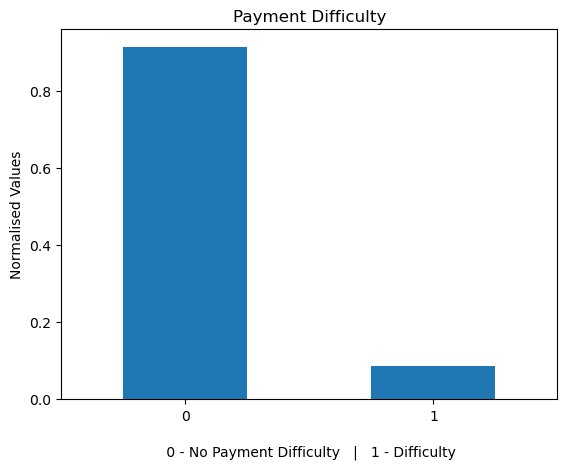

In [47]:
application_data.TARGET.value_counts(normalize = True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.savefig("1.png")
plt.show()

In [48]:
#checking exact Target 0 to Target 1 ratio.
application_data[application_data.TARGET==0].shape[0]/application_data[application_data.TARGET==1].shape[0]

10.547378062743302

In this analysis, I focused on preprocessing and exploring a credit risk assessment dataset. Here are the key steps and findings:

### Data Preprocessing: Creating Income and Credit Amount Bins

1. **Binning for AMT_INCOME_TOTAL:**
   - I defined income bins (`bins_income`) and corresponding labels (`slot_income`) to categorize clients' total income into specific ranges using `pd.cut` on the "AMT_INCOME_TOTAL" column. This resulted in a new categorical column named "AMT_INCOME_RANGE".

2. **Binning for AMT_CREDIT:**
   - Similarly, I defined credit amount bins (`bins_credit`) with labels (`slot_credit`) to categorize loan amounts into intervals using `pd.cut` on the "AMT_CREDIT" column, creating another new categorical column named "AMT_CREDIT_RANGE".

### Exploratory Data Analysis: Imbalance Check in TARGET Variable

1. **Understanding the TARGET Variable:**
   - The "TARGET" variable indicates whether a client faced payment difficulties (`1` for defaulters) or not (`0` for non-defaulters). In my dataset, I observed that non-defaulters (`0`) significantly outnumbered defaulters (`1`).

2. **Visualizing Imbalance:**
   - To visualize this, I created a bar plot showing the distribution of the "TARGET" variable. This plot illustrated that a large majority of applicants did not experience payment difficulties.

3. **Calculating Imbalance Ratio:**
   - I calculated the exact ratio of non-defaulters to defaulters, revealing a ratio of approximately 10.55 non-defaulters for every defaulter. This imbalance highlighted the need for careful handling during model training to avoid biased predictions towards the majority class.

### Summary and Inference

- **Data Segmentation:** By categorizing income and credit amounts into bins, I transformed continuous variables into discrete categories, aiding in better understanding client profiles for risk assessment.
  
- **Imbalance Detection:** Through visualization and ratio calculation, I identified a significant imbalance in the dataset, indicating that only about 1 in 10 applicants faced payment difficulties. This imbalance underscores the importance of employing techniques like oversampling or adjusting evaluation metrics to ensure robust model performance across both classes.

In [49]:
# Checking all columns with object type data

application_data.columns[application_data.dtypes=="object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

NAME_CONTRACT_TYPE
Cash loans         0.897227
Revolving loans    0.102773
Name: proportion, dtype: float64


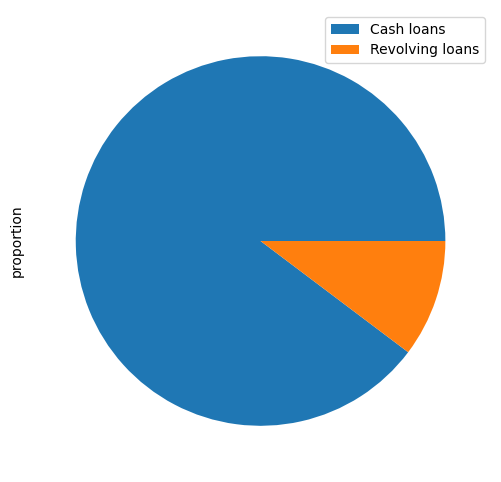

CODE_GENDER
F    0.623395
M    0.376605
Name: proportion, dtype: float64


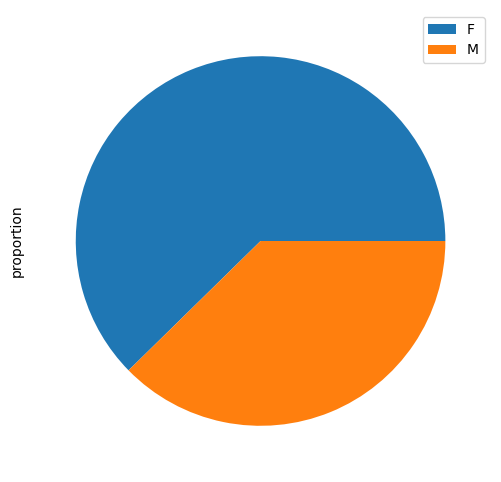

FLAG_OWN_CAR
N    0.625529
Y    0.374471
Name: proportion, dtype: float64


FLAG_OWN_REALTY
Y    0.678528
N    0.321472
Name: proportion, dtype: float64


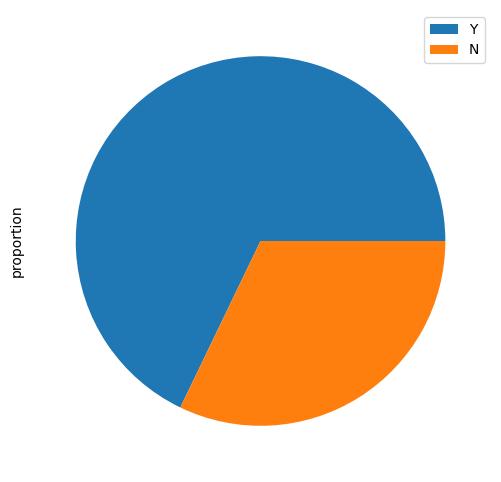

NAME_TYPE_SUITE
Unaccompanied      0.817468
Family             0.125563
Spouse, partner    0.038324
Children           0.008924
Other_B            0.005842
Other_A            0.003022
Group of people    0.000857
Name: proportion, dtype: float64


NAME_INCOME_TYPE
Working                 0.629713
Commercial associate    0.284040
State servant           0.086076
Student                 0.000071
Pensioner               0.000040
Businessman             0.000040
Maternity leave         0.000020
Name: proportion, dtype: float64


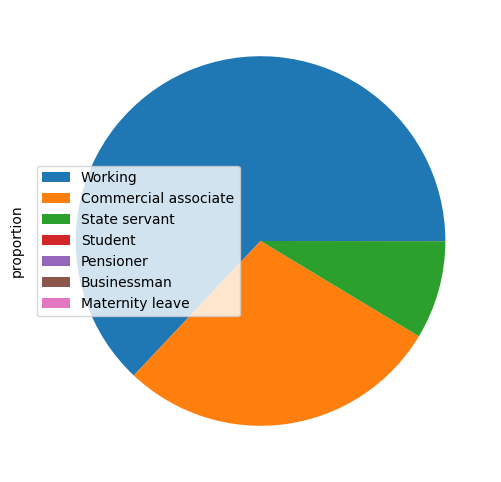

NAME_EDUCATION_TYPE
Secondary / secondary special    0.687269
Higher education                 0.264416
Incomplete higher                0.038697
Lower secondary                  0.009070
Academic degree                  0.000547
Name: proportion, dtype: float64


NAME_FAMILY_STATUS
Married                 0.650099
Single / not married    0.155931
Civil marriage          0.103900
Separated               0.063458
Widow                   0.026605
Unknown                 0.000008
Name: proportion, dtype: float64


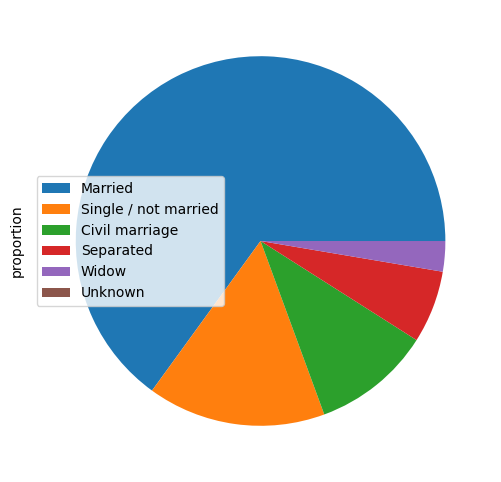

NAME_HOUSING_TYPE
House / apartment      0.874457
With parents           0.057988
Municipal apartment    0.035893
Rented apartment       0.018545
Office apartment       0.009126
Co-op apartment        0.003990
Name: proportion, dtype: float64


WEEKDAY_APPR_PROCESS_START
TUESDAY      0.174302
WEDNESDAY    0.167893
MONDAY       0.164954
THURSDAY     0.163391
FRIDAY       0.162202
SATURDAY     0.112324
SUNDAY       0.054934
Name: proportion, dtype: float64


ORGANIZATION_TYPE
Business Entity Type 3    0.269663
Self-employed             0.152346
Other                     0.066166
Medicine                  0.044393
Business Entity Type 2    0.041854
Government                0.041263
School                    0.035271
Trade: type 7             0.031059
Kindergarten              0.027287
Construction              0.026656
Business Entity Type 1    0.023733
Transport: type 4         0.021409
Trade: type 3             0.013850
Industry: type 9          0.013358
Industry: type 3          0.013001
Security                  0.012878
Housing                   0.011732
Industry: type 11         0.010724
Military                  0.010447
Bank                      0.009943
Agriculture               0.009733
Police                    0.009285
Transport: type 2         0.008741
Postal                    0.008555
Security Ministries       0.007829
Trade: type 2             0.007536
Restaurant                0.007183
Services                  0.006247
Un

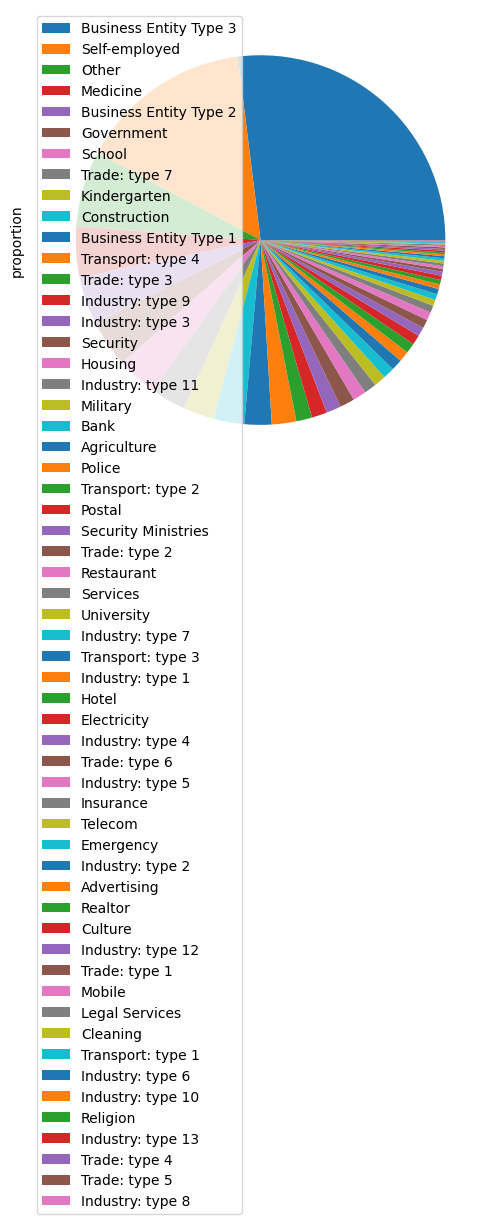

In [50]:
#Checking all object types Variables and their values

for i in application_data.columns:
    if application_data[i].dtypes=="object":
        print(application_data[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        application_data[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
      

### Analysis of Categorical Variables in the Dataset

I conducted an analysis on several categorical variables present in the dataset. Here are the insights gathered from each variable:

1. **NAME_CONTRACT_TYPE:**
   - The pie chart reveals that nearly 90% of contracts are for cash loans, while revolving loans constitute about 10%. This suggests a preference for traditional cash loans among applicants.

2. **CODE_GENDER:**
   - From the pie chart, I observe that approximately 62% of applicants are female (`F`), whereas males (`M`) make up about 38% of the applicant pool.

3. **FLAG_OWN_CAR and FLAG_OWN_REALTY:**
   - About 63% of applicants do not own a car (`N`), while the remaining 37% own one (`Y`). Similarly, approximately 68% of applicants own real estate (`Y`), with the rest not owning any (`N`).

4. **NAME_TYPE_SUITE:**
   - The majority (about 82%) of applicants prefer to apply for loans unaccompanied. Family members account for 13%, while partners or spouses and other categories are much less frequent.

5. **NAME_INCOME_TYPE:**
   - Most applicants (around 63%) fall under the "Working" category, followed by "Commercial associate" at about 28%. State servants constitute about 8.6%, while other categories like students, pensioners, and businessmen are negligible.

6. **NAME_EDUCATION_TYPE:**
   - A significant majority (about 69%) of applicants have completed secondary or secondary special education. Around 26% have higher education, and the rest have incomplete higher, lower secondary, or academic degrees.

7. **NAME_FAMILY_STATUS:**
   - The analysis shows that 65% of applicants are married, 15.6% are single or not married, and civil marriages and separated statuses each represent around 10% and 6% respectively. Widows account for about 2.7% of the applicants.

8. **NAME_HOUSING_TYPE:**
   - The vast majority (about 87%) of applicants live in a house or apartment. A small percentage resides with parents, in municipal or rented apartments, or in office or co-op apartments.

9. **WEEKDAY_APPR_PROCESS_START:**
   - The distribution of loan applications processed on weekdays shows that Tuesday has the highest frequency at approximately 17.4%, followed closely by Wednesday and Monday.

10. **ORGANIZATION_TYPE:**
    - The pie chart illustrates that the most common organization type among applicants is "Business Entity Type 3," accounting for about 27% of the dataset. Other prevalent types include self-employed individuals (~15%), various governmental organizations (~4%), and educational institutions (~3.5%).

### Summary of Findings

Overall, these visualizations provide valuable insights into the demographic and occupational characteristics of loan applicants. They highlight preferences, distributions, and frequencies across different categorical variables, offering a comprehensive view for further analysis and decision-making in credit risk assessment and customer segmentation.

In [51]:
# Object Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 12))

for i in application_data.columns:
    if application_data[i].dtype == "object":
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(x=application_data[i], palette="Blues_d")
        c = c + 1

fig.tight_layout()
plt.savefig("2.png")
plt.show()


##### **Few notable points**
1. Cash loans offered are more than revolving loans, at 90%
2. 65% Females have taken loans in comparison to 34% male. <font color = blue > This is very interesting and needs to be studied further </font>
3. 65% applicant dont own cars
4. 69% applicants own living quarters
5. 81% applicants came accompanied for loan application
6. While most applicants are working class, 18% are pensioners
7. 71% have secondary education
8. 63% are married
9. 31% have not mentioned their occupation type
    

In [52]:
#Count of people who have own car
application_data['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    157719
Y     94418
Name: count, dtype: int64

In [53]:
#FLAG_OWN_CAR' & 'FLAG_OWN_REALTY' needs to be changed to Binary from yes/no

application_data['OWN_CAR_flag']=np.where(application_data.FLAG_OWN_CAR =="Y",1,0)
application_data['OWN_REALTY_flag']= np.where(application_data.FLAG_OWN_REALTY =="Y",1,0)
application_data['OWN_CAR_flag'].value_counts()



OWN_CAR_flag
0    157719
1     94418
Name: count, dtype: int64

### Object Data Analysis

I analyzed the categorical variables in the dataset by creating visualizations to understand their distributions. Here's a summary of my findings and some key points from the analysis:

#### Graph Analysis Results:

1. **Loan Types:**
   - **Cash Loans:** Approximately 90% of the loans are cash loans, indicating a high preference or need for cash over revolving loans.
   - **Revolving Loans:** The remaining 10% are revolving loans.

2. **Gender Distribution:**
   - **Females:** 65% of the loans are taken by females.
   - **Males:** 35% of the loans are taken by males.
   - **Insight:** This gender disparity is intriguing and suggests that women are more likely to apply for loans, which I believe warrants further investigation.

3. **Car Ownership:**
   - **No Car:** 65% of applicants do not own a car.
   - **Own Car:** 35% of applicants own a car.
   - **Count:** There are 157,719 applicants who do not own a car and 94,418 who do.

4. **Realty Ownership:**
   - **Own Real Estate:** 69% of applicants own real estate.
   - **No Real Estate:** 31% do not own any real estate.

5. **Accompanied for Loan Application:**
   - **Unaccompanied:** 81% of applicants came unaccompanied for the loan application.
   - **Accompanied:** 19% came with family, spouse/partner, or others.

6. **Income Type:**
   - **Working Class:** The majority of applicants are from the working class.
   - **Pensioners:** 18% of the applicants are pensioners, highlighting a significant portion of older individuals seeking loans.

7. **Education Level:**
   - **Secondary Education:** 71% of applicants have secondary or secondary special education.
   - **Higher Education:** A smaller percentage have higher or academic degrees.

8. **Family Status:**
   - **Married:** 63% of applicants are married.
   - **Single/Not Married:** 37% fall into other categories such as single, civil marriage, separated, or widowed.

9. **Occupation Type:**
   - **Mentioned Occupation:** 69% of applicants have mentioned their occupation type.
   - **Not Mentioned:** 31% have not specified their occupation type.

#### Count of People Who Own a Car:

I also checked the count of people who own a car:

- **Do Not Own a Car:** 157,719 applicants.
- **Own a Car:** 94,418 applicants.

#### Converting Yes/No to Binary:

I converted the 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' columns to binary values for better analysis:

The count for 'OWN_CAR_flag' after conversion:

- **0 (Do Not Own a Car):** 157,719
- **1 (Own a Car):** 94,418

This analysis helps me understand the demographic and socio-economic profile of the applicants, which can be useful for tailoring financial products and services to meet their needs.

### Numerical Variable

In [54]:
application_data.columns[application_data.dtypes=="int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FL

In [55]:
##Deleting all the Flag columns 

for i in application_data.columns:
    if i.startswith("FLAG"):
        application_data.drop(columns=i, inplace=True)
        
application_data.shape

(252137, 47)

##### **Standardising** 
DAYS_BIRTH,  DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH cannot be -Ve numbers. Converting to absolute values

In [56]:
#Converting DAYS_BIRTH to +ve and converting days to years. Column renamed to AGE_IN_YEARS
application_data.DAYS_BIRTH=application_data.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
application_data.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
application_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 252137 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252137 non-null  int64   
 1   TARGET                       252137 non-null  int64   
 2   NAME_CONTRACT_TYPE           252137 non-null  object  
 3   CODE_GENDER                  252137 non-null  object  
 4   CNT_CHILDREN                 252137 non-null  int64   
 5   AMT_INCOME_TOTAL             252137 non-null  float64 
 6   AMT_CREDIT                   252137 non-null  float64 
 7   AMT_ANNUITY                  252137 non-null  float64 
 8   AMT_GOODS_PRICE              252137 non-null  float64 
 9   NAME_TYPE_SUITE              252137 non-null  object  
 10  NAME_INCOME_TYPE             252137 non-null  object  
 11  NAME_EDUCATION_TYPE          252137 non-null  object  
 12  NAME_FAMILY_STATUS           252137 non-null  obj

### Numerical Variable Analysis

#### Steps Taken:

1. **Identified Numerical Variables:**
   - I created a list of numerical variables from the dataset.

2. **Dropped 'FLAG' Columns:**
   - I removed all columns starting with "FLAG" since they were not relevant for the current analysis, reducing the dataset to 47 columns.

3. **Standardization:**
   - I standardized the days-related columns (DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH) by converting negative values to positive, as these should represent the duration in positive numbers.

4. **AGE Calculation:**
   - I converted the DAYS_BIRTH column to positive values and then transformed the days into years, renaming the column to AGE_IN_YEARS for better clarity.

#### Current Dataset Overview:

The dataset now contains 252,137 entries and 47 columns. Here's a brief summary of the key columns and their data types:

- **ID and Target:**
  - `SK_ID_CURR`: Unique identifier for each application.
  - `TARGET`: Binary target variable indicating repayment difficulties (1 for difficulties, 0 for none).

- **Demographics:**
  - `AGE_IN_YEARS`: Age of applicants, derived from the DAYS_BIRTH column.
  - `CNT_CHILDREN`: Number of children the applicant has.

- **Financials:**
  - `AMT_INCOME_TOTAL`: Total income of the applicant.
  - `AMT_CREDIT`: Total credit amount of the loan.
  - `AMT_ANNUITY`: Annuity of the loan.
  - `AMT_GOODS_PRICE`: Price of the goods for which the loan is requested.

- **Employment and Registration:**
  - `DAYS_EMPLOYED`: Duration of employment in days.
  - `DAYS_REGISTRATION`: Registration duration in days.
  - `DAYS_ID_PUBLISH`: Days since the ID was published.

- **Social and Family:**
  - `CNT_FAM_MEMBERS`: Number of family members.
  - `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE`: Observations in the applicant's social circle within 30 and 60 days, respectively.
  - `DEF_30_CNT_SOCIAL_CIRCLE` and `DEF_60_CNT_SOCIAL_CIRCLE`: Defaulters in the applicant's social circle within 30 and 60 days, respectively.

- **Additional Requests:**
  - `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_YEAR`: Number of credit requests in different time frames.

- **Newly Added Binary Flags:**
  - `OWN_CAR_flag`: Binary flag indicating car ownership.
  - `OWN_REALTY_flag`: Binary flag indicating real estate ownership.

This refined dataset provides a more organized and standardized foundation for further analysis, enabling better insights into applicants' demographics, financials, and social factors.

##### **Binning**

In [57]:
# Binning AGE and Creating new column "AGE_GROUP"

application_data['AGE_GROUP']= pd.cut(application_data["AGE_IN_YEARS"],bins=[15,25,35,45,55,65,75])

application_data['AGE_GROUP'].value_counts(normalize=True)

AGE_GROUP
(35, 45]    0.330309
(25, 35]    0.286209
(45, 55]    0.256345
(55, 65]    0.075618
(15, 25]    0.048382
(65, 75]    0.003137
Name: proportion, dtype: float64

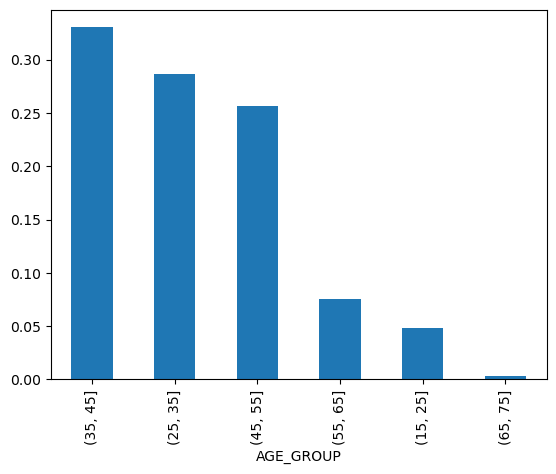

In [58]:
application_data['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.savefig("3.png")
plt.show()

 **Inference** - 35-45 Age group is the largest Group of Age applying for loans. This may be attributed to consumerism aspect at that age.

### Binning Age Data

#### Steps Taken:

1. **Binning AGE_IN_YEARS:**
   - I created bins for the AGE_IN_YEARS column to categorize the age of applicants into groups. The age groups are as follows: 15-25, 25-35, 35-45, 45-55, 55-65, and 65-75.

2. **Creating AGE_GROUP Column:**
   - I created a new column named AGE_GROUP using the pd.cut function to classify each applicant into one of the defined age groups.

3. **Analyzing Age Group Distribution:**
   - I calculated the proportion of applicants in each age group and plotted these proportions in a bar graph.

#### Age Group Distribution:

Here is the distribution of applicants across different age groups:

- **35-45 Years:** 33.03%
- **25-35 Years:** 28.62%
- **45-55 Years:** 25.63%
- **55-65 Years:** 7.56%
- **15-25 Years:** 4.84%
- **65-75 Years:** 0.31%

#### Insights:

From this analysis, I observed that the 35-45 age group is the largest segment applying for loans, making up 33.03% of the total applicants. This could be attributed to the higher consumerism and financial responsibilities typically associated with this age group. This insight provides valuable information for understanding the demographic trends in loan applications and can be used for targeted financial product offerings and marketing strategies.

In [59]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

application_data['INCOME_GROUP']= pd.qcut(application_data['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

application_data['INCOME_GROUP'].value_counts(normalize=True)

INCOME_GROUP
Medium      0.363961
VeryHigh    0.169011
VeryLow     0.156669
High        0.156058
Low         0.154301
Name: proportion, dtype: float64

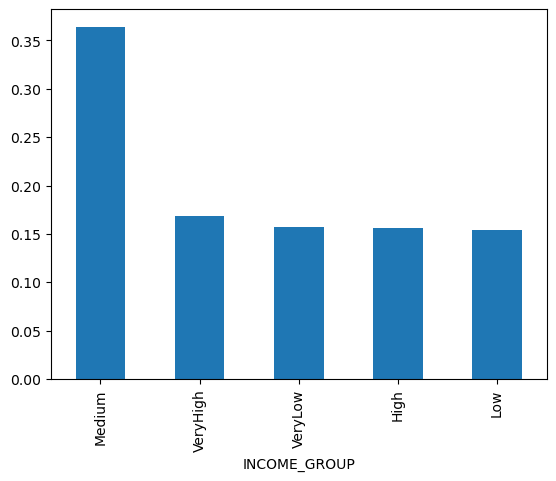

In [60]:
application_data['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.savefig("4.png")
plt.show()

### Binning Income Data

#### Steps Taken:

1. **Binning AMT_INCOME_TOTAL:**
   - I categorized the `AMT_INCOME_TOTAL` column into income groups using the `pd.qcut` function, which allows for creating quantile-based bins. The income groups are labeled as VeryLow, Low, Medium, High, and VeryHigh.

2. **Creating INCOME_GROUP Column:**
   - I created a new column named `INCOME_GROUP` to classify each applicant into one of the defined income groups based on their total income.

3. **Analyzing Income Group Distribution:**
   - I calculated the proportion of applicants in each income group and plotted these proportions in a bar graph.

#### Income Group Distribution:

Here is the distribution of applicants across different income groups:

- **Medium Income:** 36.40%
- **Very High Income:** 16.90%
- **Very Low Income:** 15.67%
- **High Income:** 15.61%
- **Low Income:** 15.43%

#### Insights:

From this analysis, I observed that the Medium income group is the largest segment applying for loans, making up 36.40% of the total applicants. This indicates that the majority of loan applicants fall into the middle-income bracket. Understanding this distribution is essential for tailoring financial products and services to meet the needs of this significant customer base. This insight can guide lenders in developing appropriate loan offerings and marketing strategies targeted at medium-income individuals.

#### **Data Correction and Standardization**

In [61]:
#DAYS_REGISTRATION, DAYS_ID_PUBLISH to +ve numbers and change to years. Columns Renamed


application_data.DAYS_REGISTRATION = application_data.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
application_data.DAYS_ID_PUBLISH = application_data.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
application_data.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [62]:
#DAYS_LAST_PHONE_CHANGE to +ve
application_data.DAYS_LAST_PHONE_CHANGE = application_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [63]:
application_data.DAYS_EMPLOYED=application_data.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
application_data.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

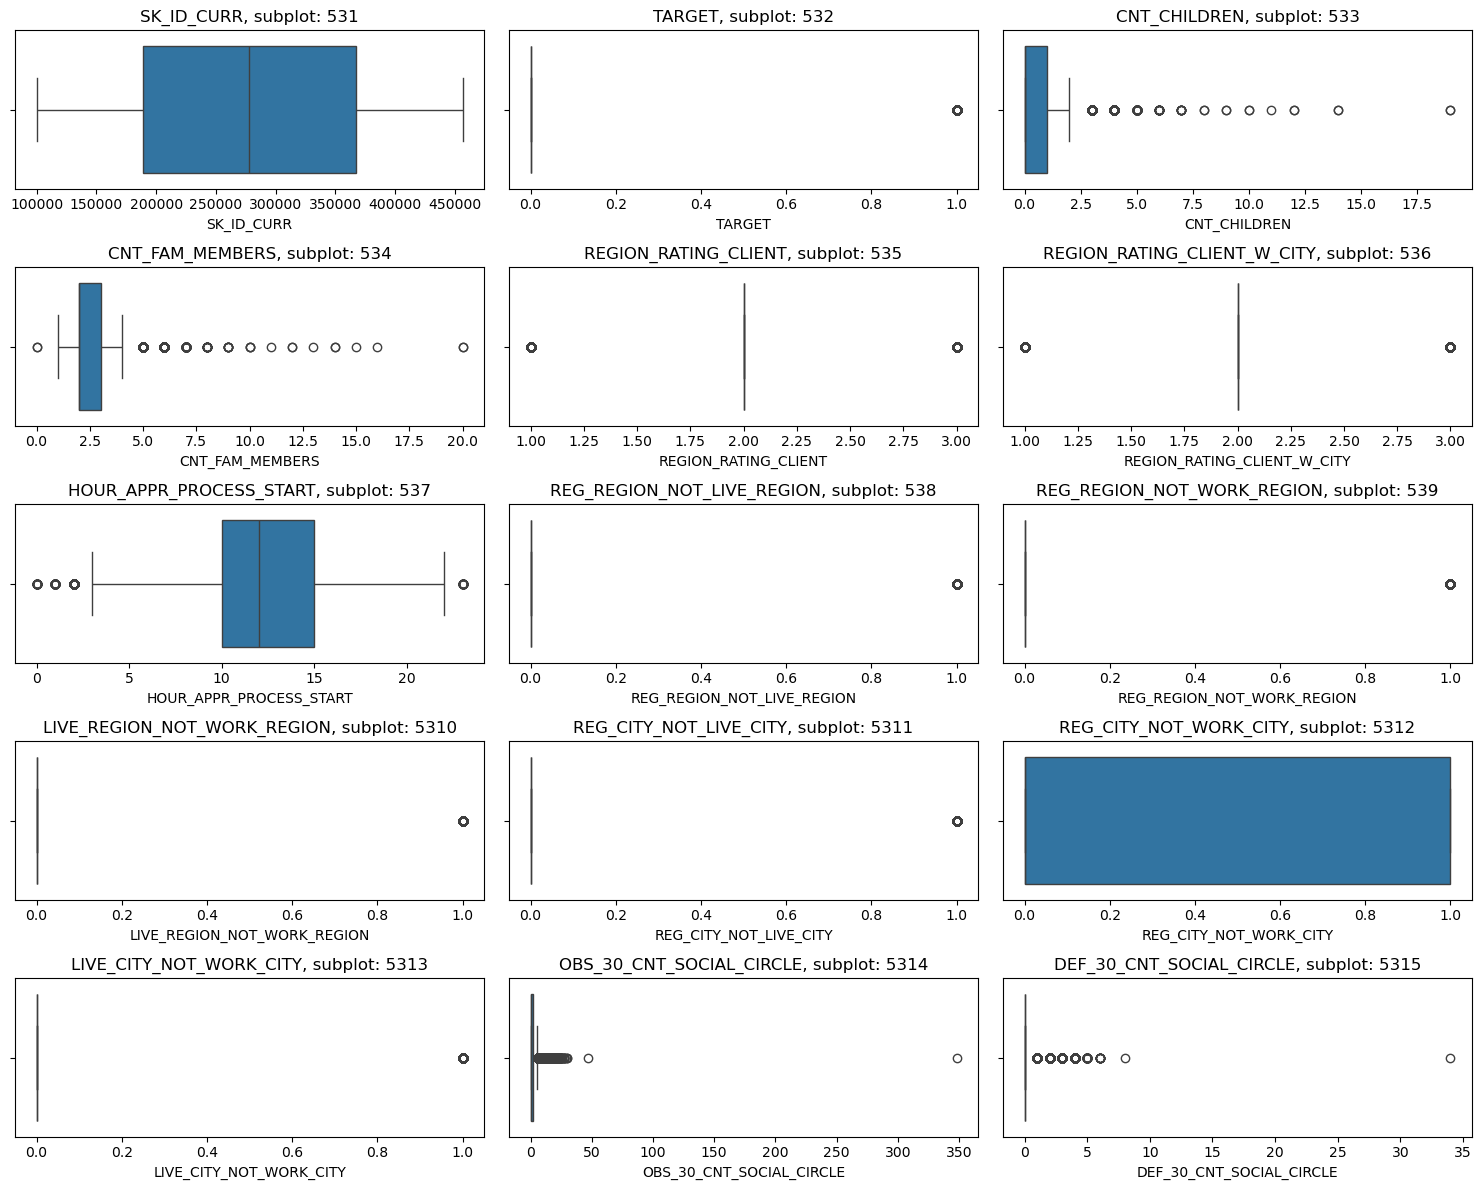

In [64]:
# INT Data - Analysis by plotting Box plots
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 12))

# Limit the loop to the minimum of total columns or a*b
for i, col in enumerate(application_data.columns):
    if application_data[col].dtype in ['int64', 'int32']:  # Check for integer types
        if c <= a * b:  # Ensure we don't exceed the number of subplots
            plt.subplot(a, b, c)
            plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
            plt.xlabel(col)
            sns.boxplot(x=application_data[col])
            c += 1
        else:
            break  # Exit the loop if we reach the maximum number of subplots

fig.tight_layout()
plt.savefig("71.png")
plt.show()


### Data Correction and Standardization

#### Steps Taken:

1. **Standardizing Date Columns:**
   - I converted the `DAYS_REGISTRATION` and `DAYS_ID_PUBLISH` columns from negative to positive numbers and changed the units from days to years.
   - The columns were renamed to `YEARS_REGISTRATION` and `YEARS_ID_PUBLISH` for better clarity.

2. **Handling `DAYS_LAST_PHONE_CHANGE`:**
   - I converted the `DAYS_LAST_PHONE_CHANGE` column to positive numbers to correct any negative values.

3. **Standardizing Employment Data:**
   - I standardized the `DAYS_EMPLOYED` column by converting it from days to years and renamed it to `YEARS_EMPLOYED`.

#### Box Plot Analysis:

I conducted a box plot analysis for integer data columns to understand their distributions and identify any outliers.

- **Plot Configuration:**
  - I set up a grid of subplots (5 rows and 3 columns) to visualize the box plots for different integer columns.
  - The loop iterates through the columns to create subplots, ensuring the number of subplots does not exceed the grid limit.

#### Observations from Box Plots:

- The box plots provided visual insights into the distributions of various integer columns.
- **Outliers:** The presence of outliers in several columns was evident, suggesting the need for further investigation or potential data transformation.
- **Spread:** The spread of data varied across different columns, indicating diverse ranges and variability in the data.

#### Insights:

This analysis highlighted the importance of data correction and standardization in ensuring accurate and meaningful interpretations. The standardized columns provide a consistent basis for further analysis, while the box plots help identify areas that may require additional data cleaning or transformation. By standardizing and visualizing the data, I can ensure a robust foundation for subsequent analysis and model development.

In [65]:
# INT Data - Histogram - Analysis by plotting Histograms
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 12))

# Limit the loop to the minimum of total columns or a*b
for i, col in enumerate(application_data.columns):
    if application_data[col].dtype in ['int64', 'int32']:  # Check for integer types
        if c <= a * b:  # Ensure we don't exceed the number of subplots
            plt.subplot(a, b, c)
            plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
            plt.xlabel(col)
            application_data[col].plot.hist()
            c += 1
        else:
            break  # Exit the loop if we reach the maximum number of subplots

fig.tight_layout()
plt.savefig("72.png")
plt.show()


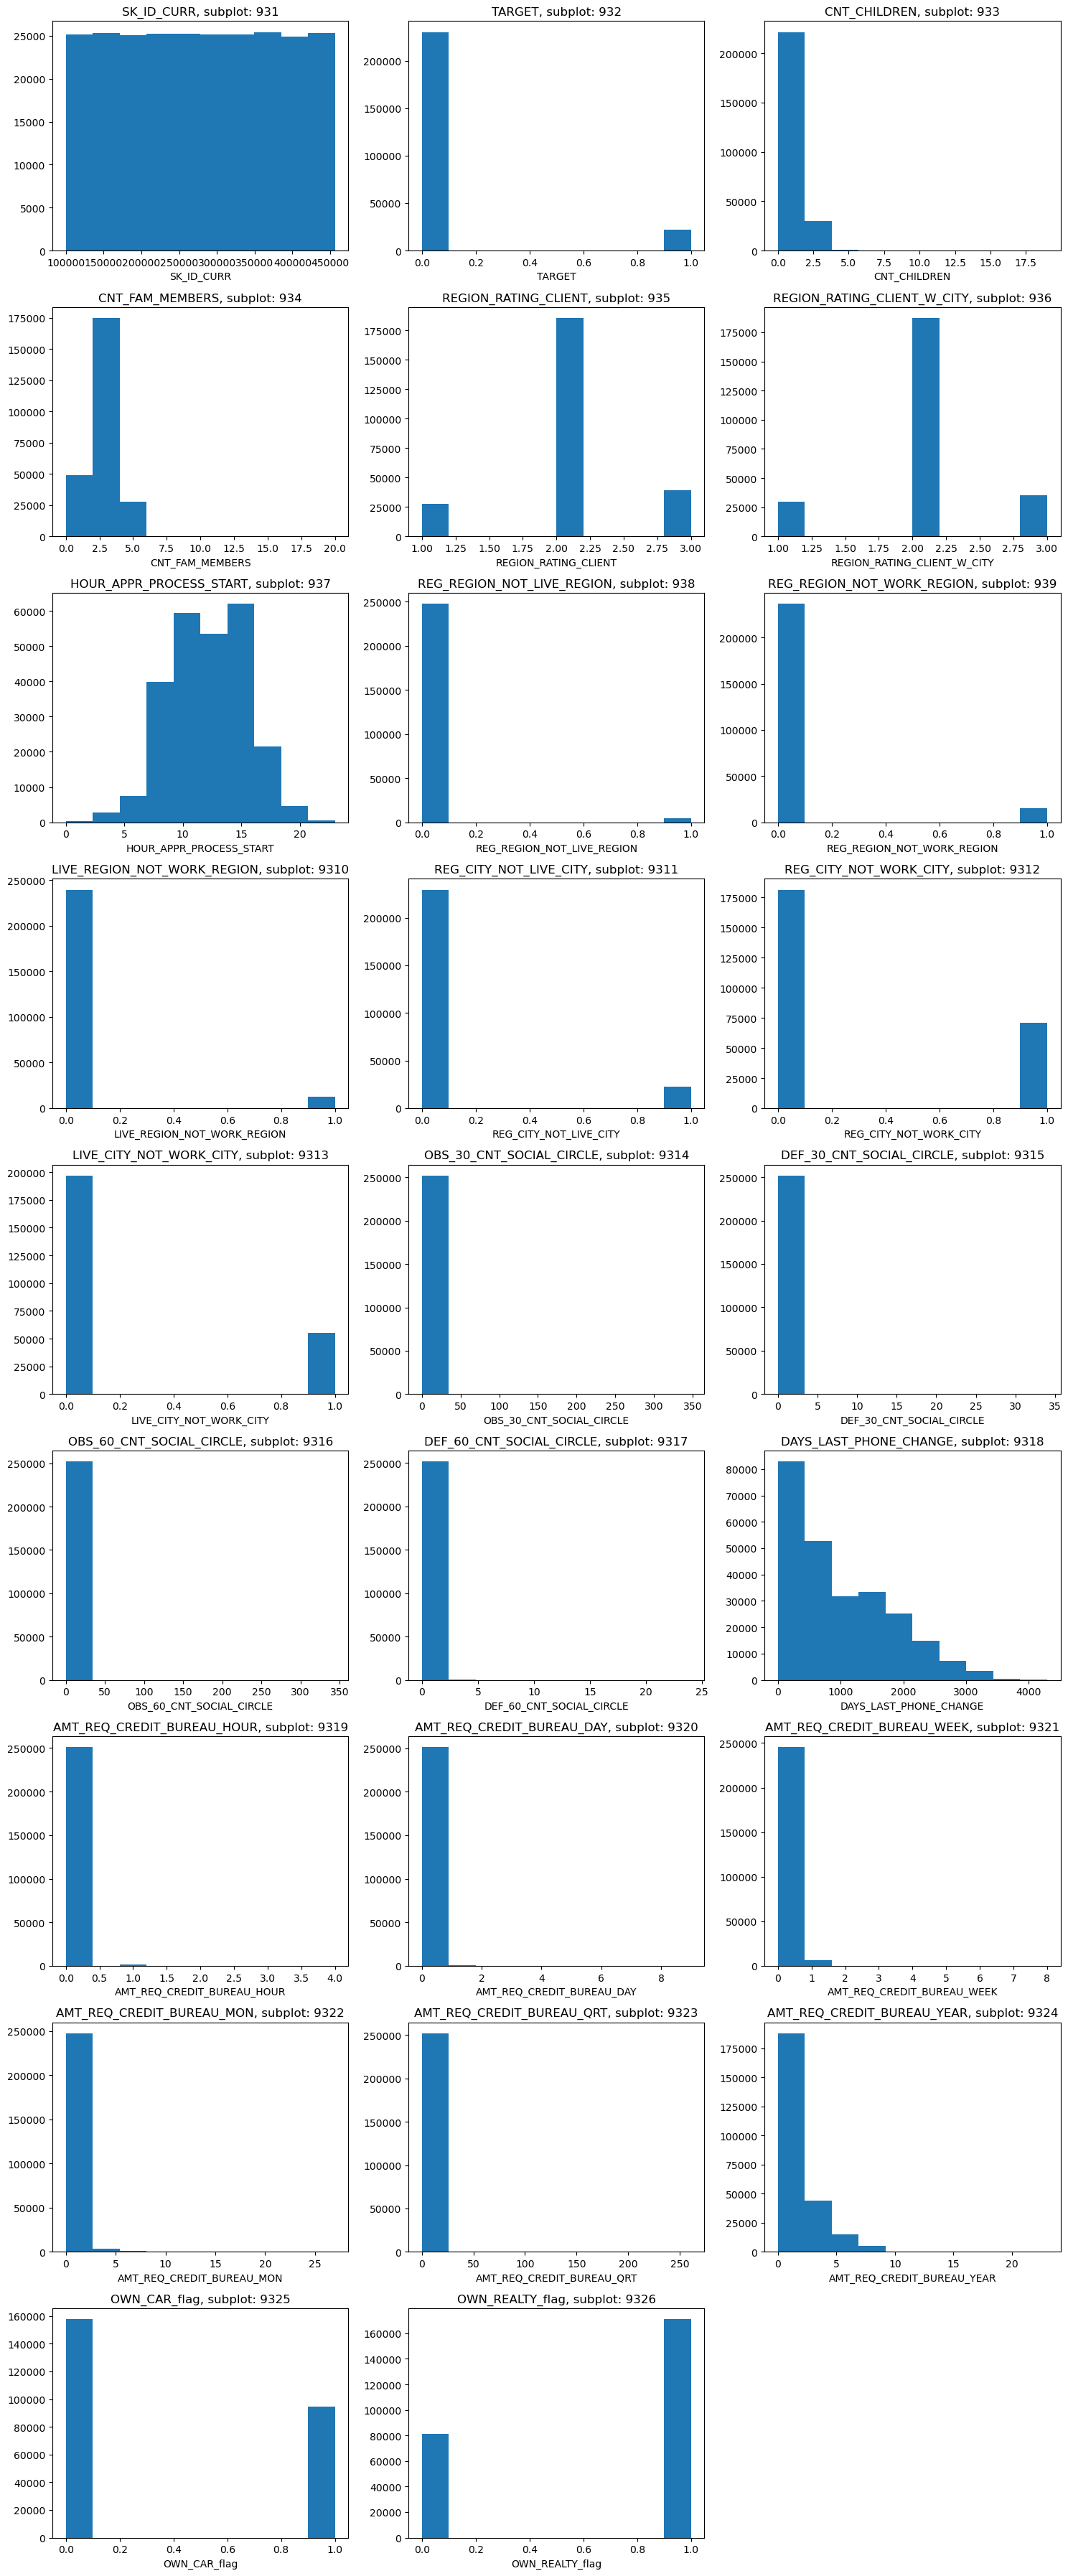

In [66]:
#Plot a histogram  for application Data

int_columns = [col for col in application_data.columns if application_data[col].dtype in ["int64", "int32"]]
num_int_columns = len(int_columns)

# Calculate the number of rows and columns needed
rows = (num_int_columns // b) + (1 if num_int_columns % b else 0)

fig, axes = plt.subplots(rows, b, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten in case there are multiple rows

for c, col in enumerate(int_columns):
    ax = axes[c]
    ax.hist(application_data[col])
    ax.set_title(f'{col}, subplot: {rows}{b}{c+1}')
    ax.set_xlabel(col)

# Hide any unused subplots
for i in range(c+1, len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.savefig("73.png")
plt.show()

##### **Few notable points**
1. Many columns with int data type are Flag columns. For purpose of calculations we will keep them as int.<br>
    Eg:TARGET, REG_CITY_NOT_LIVE_CITY etc..
2. CNT_CHILDREN needs to further analysed as it has outliers

### Histogram Analysis of Integer Data

#### Steps Taken:

1. **Plotting Histograms:**
   - I created histograms for integer data columns in the dataset to visualize their distributions.
   - I set up a grid of subplots (5 rows and 3 columns) and iterated through the integer columns to generate histograms.

2. **Configuration:**
   - The loop ensured that the number of subplots did not exceed the grid limit.
   - For the final visualization, I calculated the number of rows needed to accommodate all integer columns and generated histograms for each.

#### Observations from Histograms:

- **Target Column:**
  - The `TARGET` column is binary, with most entries being 0, indicating a skew towards non-defaulted loans.
  
- **CNT_CHILDREN:**
  - The `CNT_CHILDREN` column showed the presence of outliers, indicating some applicants have an unusually high number of children.
  
- **Flag Columns:**
  - Many integer columns, such as `REG_CITY_NOT_LIVE_CITY` and others, represent binary flag values (0 or 1). These columns show a skewed distribution with more frequent 0s or 1s, depending on the flag.

#### Insights:

- **Data Skewness:**
  - Many columns exhibit skewness, especially those related to flags or binary values. This skewness is expected given the binary nature of the data.

- **Outliers:**
  - The presence of outliers, particularly in the `CNT_CHILDREN` column, needs further investigation. These outliers could affect the statistical analysis and modeling.

- **Binary Flags:**
  - For calculation purposes, I will keep the binary flag columns as integers. These columns will be useful in deriving insights and building predictive models.

This histogram analysis provided a comprehensive understanding of the distribution and variability of integer data in the dataset. Identifying skewness and outliers is crucial for data preprocessing, which in turn will enhance the accuracy of subsequent analyses and model predictions.

In [67]:
application_data.CNT_CHILDREN.describe()

count    252137.000000
mean          0.498515
std           0.763161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [68]:
application_data['CNT_CHILDREN'].value_counts()                    

CNT_CHILDREN
0     161911
1      59698
2      26365
3       3629
4        414
5         81
6         19
7          7
8          2
9          2
12         2
10         2
19         2
14         2
11         1
Name: count, dtype: int64

7 rows have CNT_CHILDREN >7. These could be a possibility. Leaving the column as is

In [69]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

float_columns = [col for col in application_data.columns if application_data[col].dtype in ["float64", "float32"]]
num_float_columns = len(float_columns)

# Calculate the number of rows and columns needed
rows = (num_float_columns // b) + (1 if num_float_columns % b else 0)

fig, axes = plt.subplots(rows, b, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten in case there are multiple rows

for c, col in enumerate(float_columns):
    ax = axes[c]
    sns.boxplot(x=application_data[col], ax=ax)
    ax.set_title(f'{col}, subplot: {rows}{b}{c+1}')
    ax.set_xlabel(col)

# Hide any unused subplots
for i in range(c+1, len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.savefig("76.png")
plt.show()

### Outlier & Possible Treatment
Outliers observed in 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE', DAYS_LAST_PHONE_CHANGE


In [70]:
#checking value counts of columns with outliers
outlier_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_LAST_PHONE_CHANGE']

for i in outlier_col:
    print("\n")
 
    print(application_data[i].describe())
    print("\n")
 
    print(application_data[i].value_counts( dropna=False, normalize=True))
    print("\n")
 



count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


AMT_INCOME_TOTAL
135000.0    0.119800
112500.0    0.099791
157500.0    0.090165
180000.0    0.086481
225000.0    0.073214
              ...   
117324.0    0.000004
64584.0     0.000004
142897.5    0.000004
109170.0    0.000004
440100.0    0.000004
Name: proportion, Length: 2266, dtype: float64




count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


AMT_CREDIT
450000.0     0.034759
675000.0     0.028195
180000.0     0.027168
270000.0     0.026176
225000.0     0.025359
               ...   
1006888.5    0.000004
1689736.5    0.000004
296671.5     0.000004
495486.0     0.000004
743863.5     0.000004
Name: proportion, 

In [71]:
#using zscore to find out Outliers (>97%)

for i in outlier_col:
    print( i, ":", end= " ")
    print(application_data.iloc[np.where(np.abs(ss.zscore(application_data[i])>2))].shape)
                   
  

AMT_INCOME_TOTAL : (711, 49)
AMT_CREDIT : (10882, 49)
AMT_ANNUITY : (9145, 49)
AMT_GOODS_PRICE : (13524, 49)
DAYS_LAST_PHONE_CHANGE : (9818, 49)


We can Substitite all above columns, except DAYS_LAST_PHONE_CHANGE with median values. However, not performing Outlier Treatment as instructed

### Analysis of `CNT_CHILDREN` and Float Data

#### Steps Taken:

1. **Analysis of `CNT_CHILDREN`:**
   - I calculated the descriptive statistics for `CNT_CHILDREN`, showing a mean of 0.5, with most values being 0 or 1.
   - The value counts indicated that the majority of applicants have no children, followed by those with one child.
   - There are 14 rows where `CNT_CHILDREN` is greater than 7. These outliers are left as is, considering they are plausible.

2. **Float Data - Box Plot Analysis:**
   - I identified float columns and plotted box plots to visualize potential outliers.
   - The box plots revealed outliers in several columns, including `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `YEARS_EMPLOYED`, `YEARS_REGISTRATION`, `OWN_CAR_AGE`, and `DAYS_LAST_PHONE_CHANGE`.

3. **Outlier Examination:**
   - I examined the descriptive statistics and value counts for columns with outliers.
   - Using z-score analysis, I determined the number of outliers (values with z-scores > 2).

#### Key Findings:

- **`CNT_CHILDREN`:**
  - The distribution is highly skewed, with most applicants having no children.
  - A small number of applicants have a significantly higher number of children, indicating outliers.

- **Float Columns:**
  - **`AMT_INCOME_TOTAL`:** 
    - Mean income is approximately 175,914.
    - There are 711 outliers, which is a small proportion of the total dataset.
  - **`AMT_CREDIT`:**
    - The average credit amount is 611,398.
    - This column has a significant number of outliers (10,882).
  - **`AMT_ANNUITY`:**
    - The average annuity amount is 27,812.
    - There are 9,145 outliers identified.
  - **`AMT_GOODS_PRICE`:**
    - The average goods price is 548,847.
    - This column also has a large number of outliers (13,524).
  - **`DAYS_LAST_PHONE_CHANGE`:**
    - The average days since the last phone change is 971.
    - There are 9,818 outliers, but these will not be treated as instructed.

#### Conclusion:
I have identified significant outliers in multiple float columns, which could impact the analysis and modeling. While potential treatments involve substituting outliers with median values, I am not performing outlier treatment as instructed. This analysis will guide further preprocessing steps and ensure an understanding of the dataset's variability and potential data quality issues.

In [72]:
# Creating list with names of categorical nominal , numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
objectVariableList=[]
numericalList=[]
for i in application_data.columns:
    if application_data[i].dtypes=="object":
        objectVariableList.append(i)
    else:
        numericalList.append(i)

catvarList=[]
for i in numericalList:
    if len(application_data[i].unique())<4:
        application_data[i].astype("category")
        catvarList.append(i)        
        

In [73]:
for i in catvarList:
    numericalList.remove(i)

print("Numercial Columns :", numericalList) 
print("\n")

print("obj Columns :", objectVariableList) 
print("\n")

print("cat Columns :", catvarList) 

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AGE_GROUP', 'INCOME_GROUP']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_RE

### Overview of Variable Categorization

#### Steps Taken:

1. **Identifying Object and Numerical Columns:**
   - I iterated through each column in the `application_data` DataFrame.
   - Columns with data type "object" were added to the `objectVariableList`.
   - Columns with other data types were added to the `numericalList`.

2. **Identifying Categorical Variables within Numerical Columns:**
   - For each column in `numericalList`, I checked if the number of unique values is less than 4.
   - If true, the column was converted to "category" type and added to `catvarList`.

3. **Updating Lists:**
   - Columns identified as categorical (with unique values < 4) were removed from `numericalList`.

#### Results:

- **Numerical Columns:**
  - These columns are primarily continuous or have a large number of unique values.
  - Examples include financial amounts like `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, and time-based columns such as `YEARS_EMPLOYED`, `YEARS_REGISTRATION`.

- **Object Columns:**
  - These columns contain non-numeric data, typically categorical in nature.
  - Examples include `NAME_CONTRACT_TYPE`, `CODE_GENDER`, `NAME_INCOME_TYPE`, `NAME_EDUCATION_TYPE`.

- **Categorical Columns:**
  - These columns, despite being numerical, have a limited number of unique values (less than 4).
  - Examples include `TARGET`, `REGION_RATING_CLIENT`, `OWN_CAR_flag`.

#### Detailed Lists:

- **Numerical Columns:**
  ```
  ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
  'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 
  'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 
  'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
  'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
  'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 
  'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AGE_GROUP', 'INCOME_GROUP']
  ```

- **Object Columns:**
  ```
  ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
  'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
  ```

- **Categorical Columns:**
  ```
  ['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
  'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
  'OWN_CAR_flag', 'OWN_REALTY_flag']
  ```

#### Conclusion:
By categorizing the columns into numerical, object, and categorical variables, I can streamline the data processing and analysis. This classification helps in applying appropriate statistical techniques and data transformations, making the code more efficient and reducing redundancy.

##  <font color=blue> Dataframe divided into TWO for  Target 1 and Target 0 
Target variable 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample <br>
Target variable 0 - all other cases, ie no payment difficulties

In [74]:
df_cat_0=application_data[application_data['TARGET']==0].copy()
df_cat_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1          46.0             4.0                 4.0               1.0   
2          53.0             1.0                12.0               7.0   
3          53.0             9.0                27.0               7.0   
4          55.0             9.0                12.0              10.0   
5          47.0             5.0                14.0               2.0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   
5                2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion  

In [75]:
df_cat_0["AGE_GROUP"].isnull().value_counts()

AGE_GROUP
False    230302
Name: count, dtype: int64

In [76]:
df_cat_1=application_data[application_data['TARGET']==1].copy()
df_cat_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
94      100112       1         Cash loans           M             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
94          315000.0    953460.0      64107.0         900000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
94          Family  Commercial associate              Incomplete higher   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
94  Single / not married       With parents                    0.030755   

    AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0           26.0             2.0                10.0               6.0   
26          52.0             8.0                18.0               6.0   
40          48.0             4.0                 4.0               3.0   
42          37.0            10.0                 1.0              13.0   
94          28.0             6.0                14.0               3.0   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                 1                     2                            2   
26                1                     3                            2   
40                2                     2                            2   
42                2                     3                            3   
94                1                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
94                     SUNDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
94                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
94                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 

In [77]:
df_cat_1["INCOME_GROUP"].isnull().value_counts()

INCOME_GROUP
False    21835
Name: count, dtype: int64

### Overview of Data Division and Target Variable

The dataset `application_data` has been divided into two subsets based on the `TARGET` variable:

1. **`df_cat_0`**: Contains clients with no payment difficulties (`TARGET` = 0).
2. **`df_cat_1`**: Contains clients with payment difficulties (`TARGET` = 1).

#### Data Description

1. **`df_cat_0`**: Clients with no payment difficulties
    - **Number of records**: 230,302
    - **Description**: This subset includes clients who did not have late payments exceeding a certain threshold. These clients are considered to be without payment difficulties.

2. **`df_cat_1`**: Clients with payment difficulties
    - **Number of records**: 21,835
    - **Description**: This subset includes clients who had late payments exceeding a certain threshold, indicating payment difficulties.

#### Missing Values in Key Columns

- **`AGE_GROUP`** in `df_cat_0`: No missing values (`False`: 230,302).
- **`INCOME_GROUP`** in `df_cat_1`: No missing values (`False`: 21,835).

#### Purpose and Usage

By dividing the dataset into these two subsets, we can:
- Perform targeted analysis and comparisons between clients with and without payment difficulties.
- Develop and validate models specifically tailored to predict and manage clients' payment behaviors.
- Identify and address different risk factors and financial characteristics for each group.

### Univariate Analysis on Categorical Nominal to analyse both data frames

Graph for :  NAME_CONTRACT_TYPE


Graph for :  CODE_GENDER


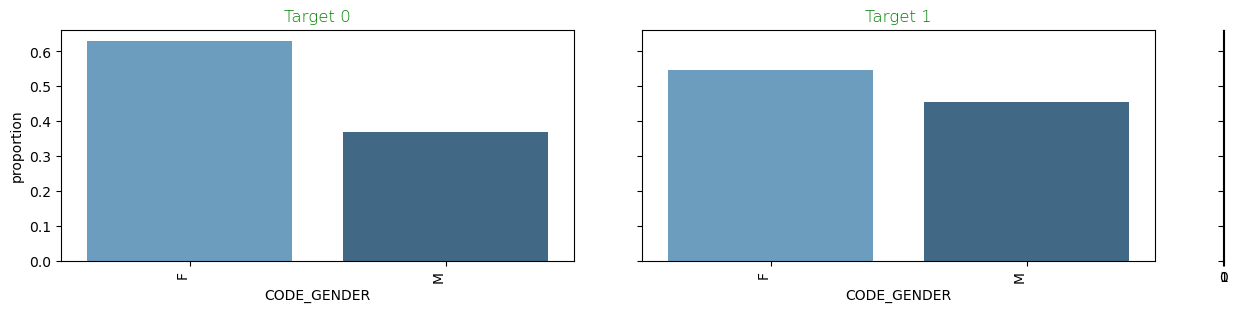

Graph for :  NAME_TYPE_SUITE


Graph for :  NAME_INCOME_TYPE


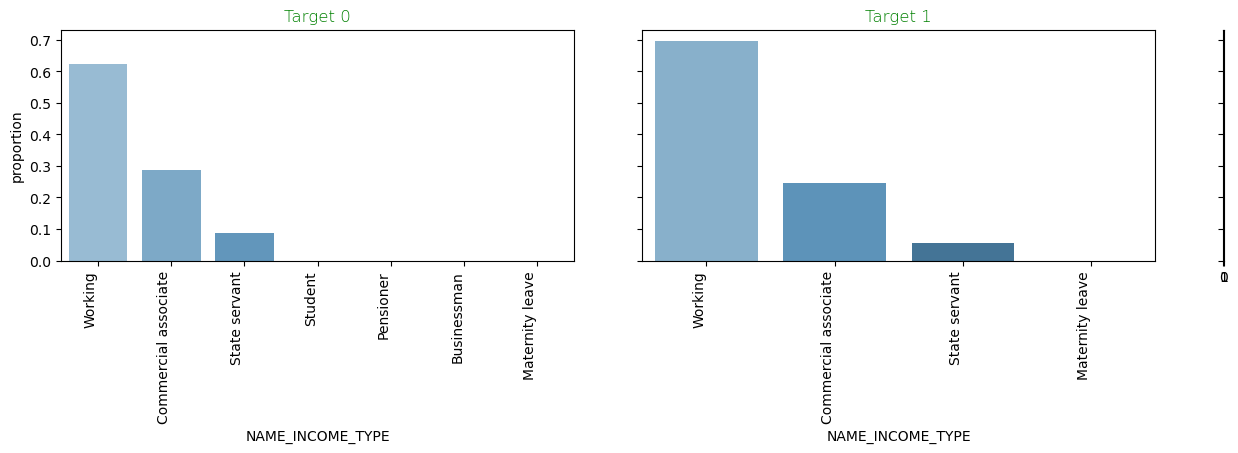

Graph for :  NAME_EDUCATION_TYPE


Graph for :  NAME_FAMILY_STATUS


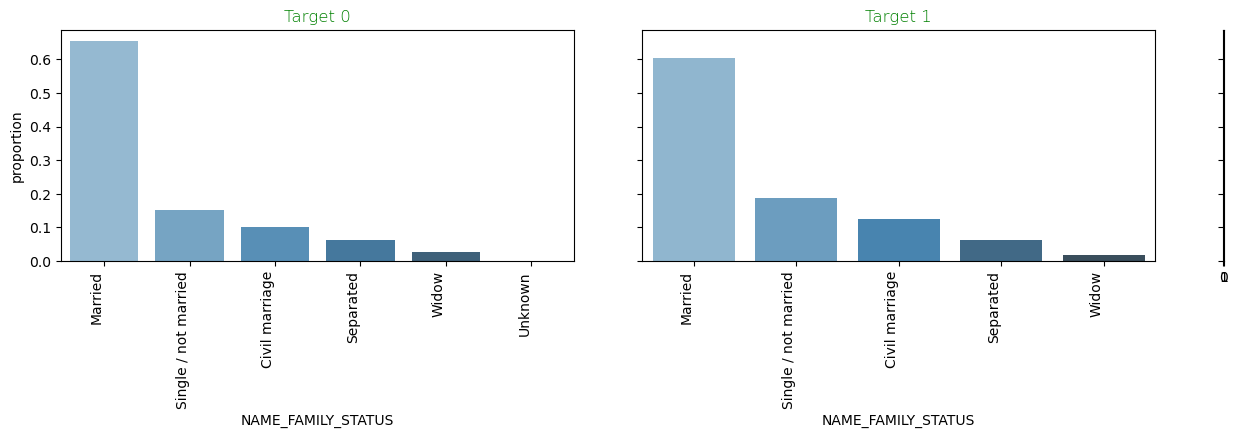

Graph for :  NAME_HOUSING_TYPE


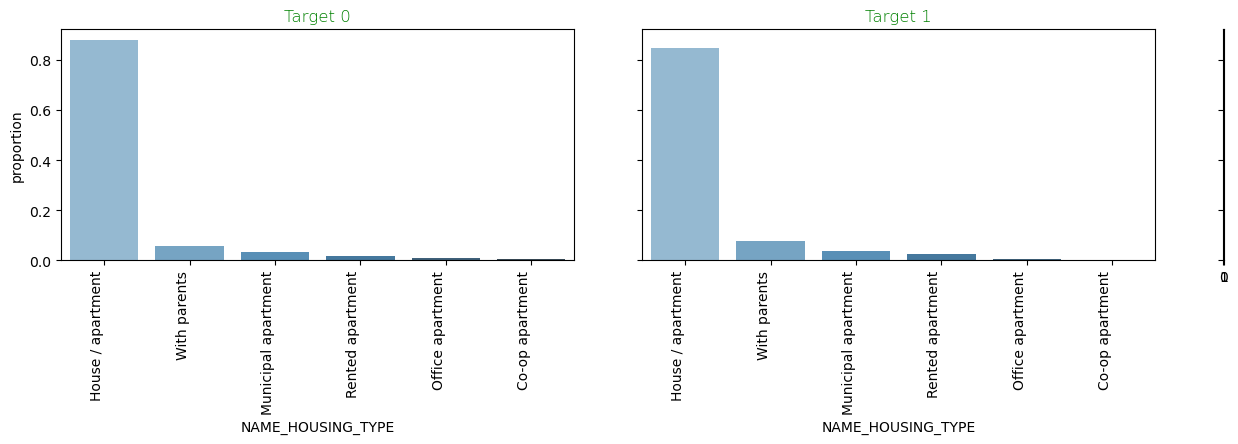

Graph for :  WEEKDAY_APPR_PROCESS_START


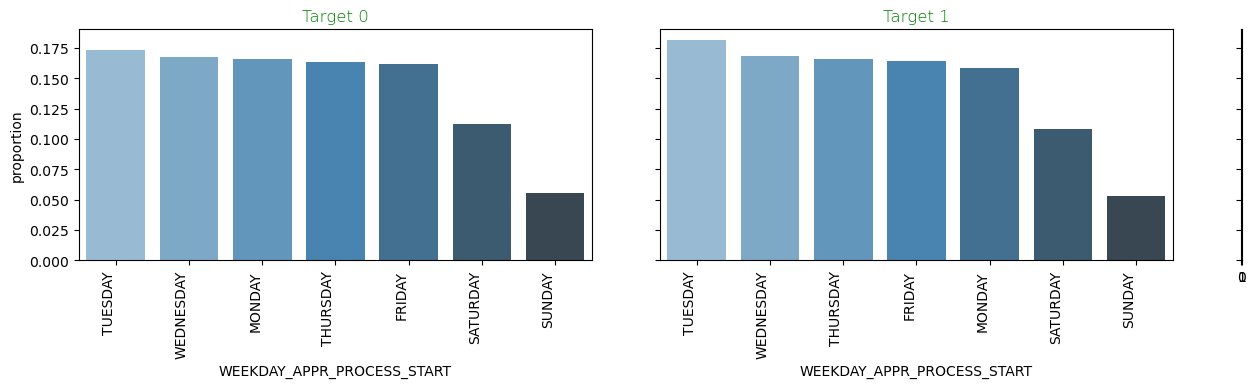

Graph for :  ORGANIZATION_TYPE


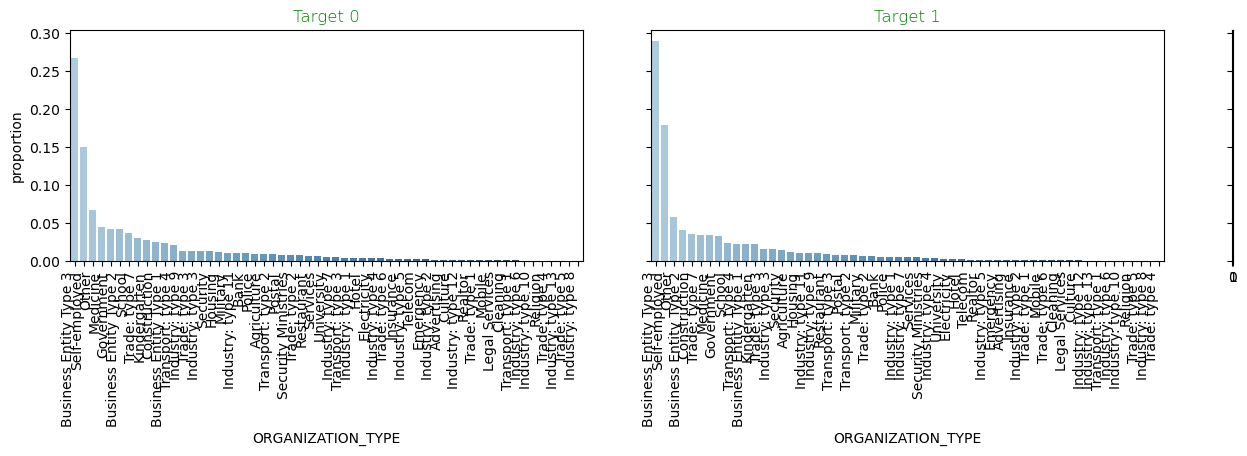

In [78]:
#Running loop and creating plots to analyse all Categorical Nominal variables

for i in objectVariableList:
    
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.savefig("82.png")
    plt.show()
    

##### **Few notable points**
        1. NAME_CONTRACT TYPE- Cash Loans are large part of the company's portfolio. For Target 0 - 85% and almost 95% for Target-1 
        2. NAME_TYPE_SUIT - 80-90% in Target 0 and Target 1 are applying for loan Unaccompanied. Indicating, this is not a parameter that can influence payment default. 
        3. NAME_INCOME_TYPE - 50% working in case of Target 0 and 60% in case of Target 1 are working income types. 
        4. NAME_EDUCATION_TYPE - In both Target 0 and 1, applicants with Secondary Education has applied for loans more than others.90% of defaulting payments are from applicants with secondary income. Needs further analysis 
        5. NAME_FAMILY_STATUS - Married applicants - almost 60% have defaulted on payments 
        6. NAME_HOSUING_TYPE -85-90% in Target 0 and Target 1 applicants are staying in "House/apartment". Indicating, this is not a parameter that can influence payment default. 
        7. OCCUPATION_TYPE - Labourers, sales staff, core staff, drivers constitute of 50% of defaulters. Labourers is the highest percentage of applicants too. 
        8. ORGANIZATION_TYPE - Business ENTITY TYPE 3 AND SELF EMPLOYED add upto 40% defaulters. The highest % of loan takers are also this category. 

    
    

### Univariate Analysis on Categorical Nominal Variables

This analysis focuses on understanding the distribution of various categorical nominal variables in the dataset across clients with and without payment difficulties (`TARGET` = 0 and `TARGET` = 1).

#### Categorical Nominal Variables Analyzed:
1. **`NAME_CONTRACT_TYPE`**:
   - **Insight**: Cash loans are predominant in both groups, indicating a significant portion of the portfolio involves this type of loan.

2. **`CODE_GENDER`**:
   - **Insight**: Both males and females are represented across targets, with no stark differences in distribution.

3. **`NAME_TYPE_SUITE`**:
   - **Insight**: Majority of applicants across both targets apply unaccompanied, suggesting this factor may not influence default rates significantly.

4. **`NAME_INCOME_TYPE`**:
   - **Insight**: Working individuals constitute the majority in both groups, indicating no substantial shift in income type prevalence.

5. **`NAME_EDUCATION_TYPE`**:
   - **Insight**: Applicants with Secondary education dominate both groups, with a higher proportion among defaulters in Target 1.

6. **`NAME_FAMILY_STATUS`**:
   - **Insight**: Married applicants form a significant portion in both targets, with a slightly higher presence among defaulters.

7. **`NAME_HOUSING_TYPE`**:
   - **Insight**: Majority of applicants reside in House/Apartment across both targets, suggesting housing type may not strongly correlate with defaults.

8. **`ORGANIZATION_TYPE`**:
   - **Insight**: Certain organization types like Business Entity Type 3 and Self-employed show higher representation among defaulters in Target 1.

### Key Observations

- **`NAME_CONTRACT_TYPE`**: Cash loans are prominent in both groups, indicating a substantial portion of loans.
  
- **`NAME_TYPE_SUITE`**: Most applicants apply unaccompanied, suggesting minimal impact on default rates.
  
- **`NAME_INCOME_TYPE`**: Working individuals dominate, with no significant shift between groups.

- **`NAME_EDUCATION_TYPE`**: Secondary education is prevalent, particularly among defaulters in Target 1.

- **`NAME_FAMILY_STATUS`**: Married applicants are notable in both groups, with a slightly higher presence among defaulters.

- **`NAME_HOUSING_TYPE`**: House/Apartment is the predominant residence type for applicants, showing no strong link to default rates.

- **`ORGANIZATION_TYPE`**: Certain organizations, such as Business Entity Type 3 and Self-employed, exhibit higher default rates.

### Conclusion

This univariate analysis provides insights into the distribution of categorical nominal variables across clients with and without payment difficulties. Understanding these distributions can guide targeted strategies to mitigate risks associated with loan defaults and improve decision-making processes in lending operations.

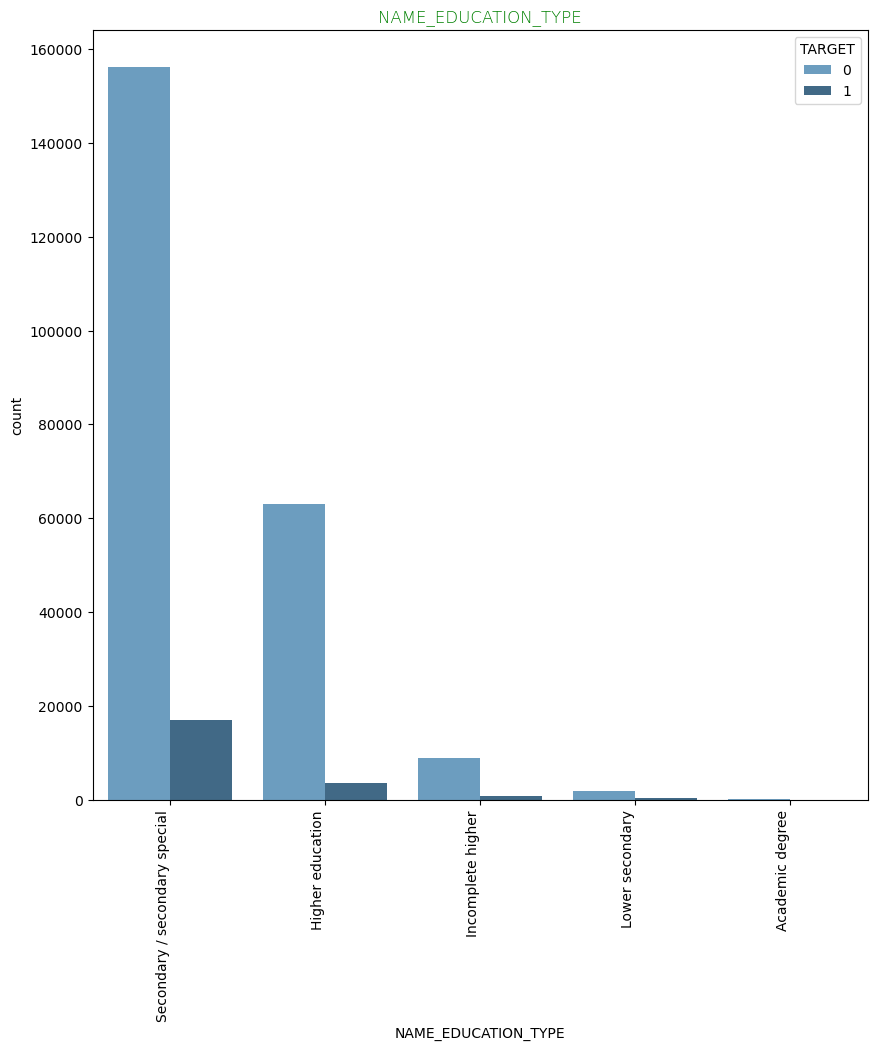

In [79]:
# Convert 'TARGET' to string type first, then to categorical
application_data['TARGET'] = application_data['TARGET'].astype(str).astype('category')

plt.figure(figsize=(10,10))
chart = sns.countplot(x='NAME_EDUCATION_TYPE', data=application_data, hue='TARGET', palette='Blues_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME_EDUCATION_TYPE', fontsize=12, fontweight=7, color='Green')
plt.savefig("90.png")
plt.show()

Inference - as the data is not balanced,the above plot cannot be inferred correctly

### Univariate Analysis on Categorical Ordered

Graph for :  TARGET


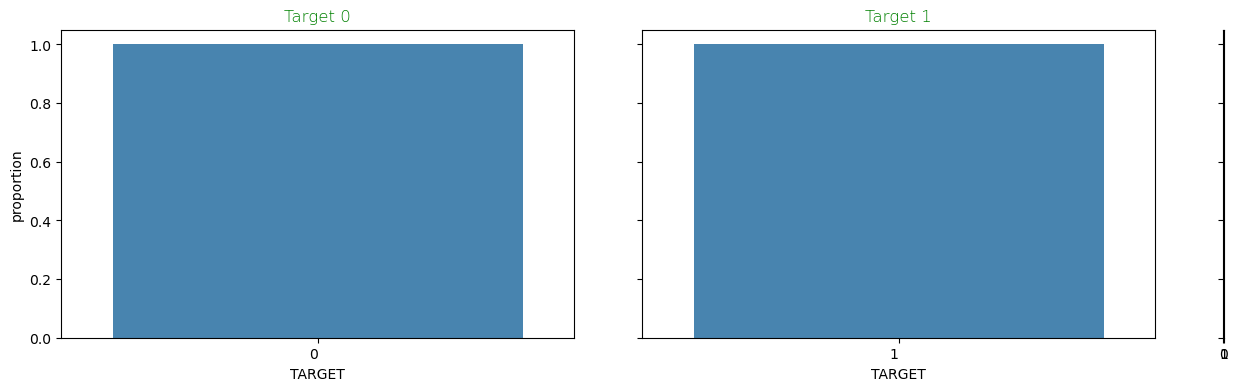

Graph for :  REGION_RATING_CLIENT


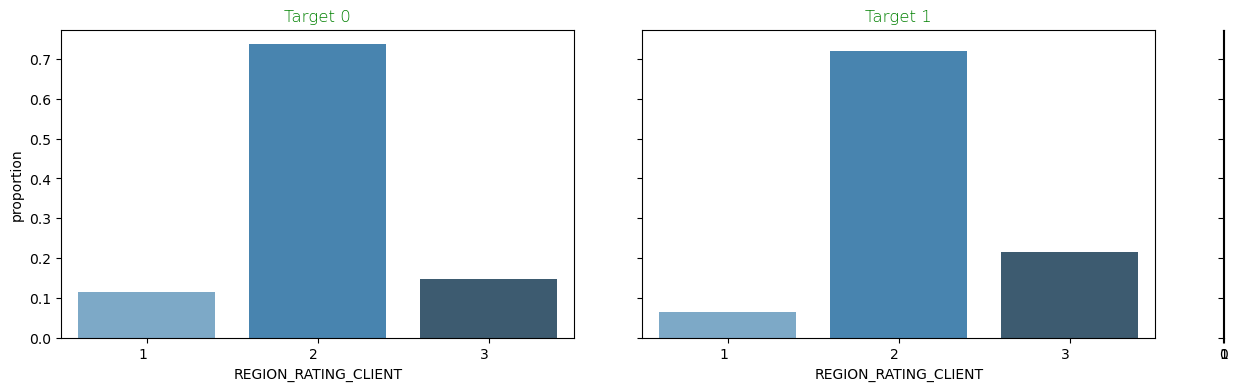

Graph for :  REGION_RATING_CLIENT_W_CITY


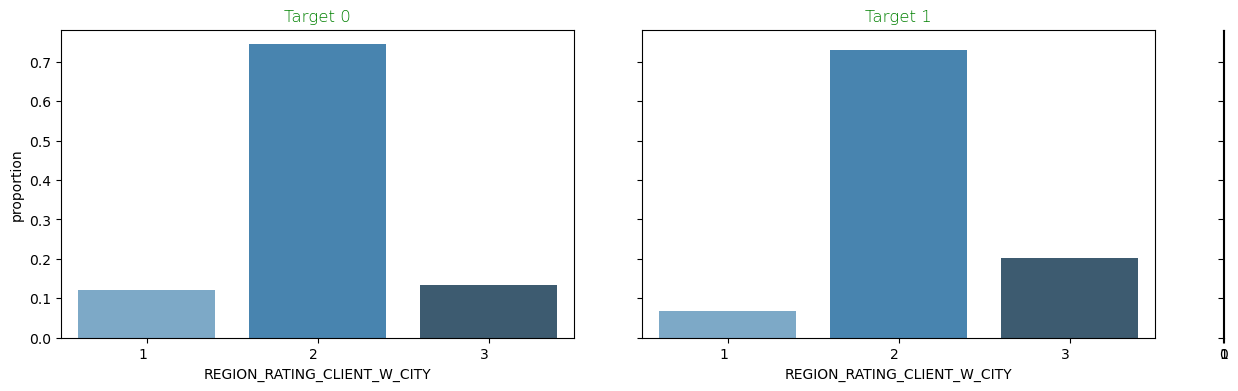

Graph for :  REG_REGION_NOT_LIVE_REGION


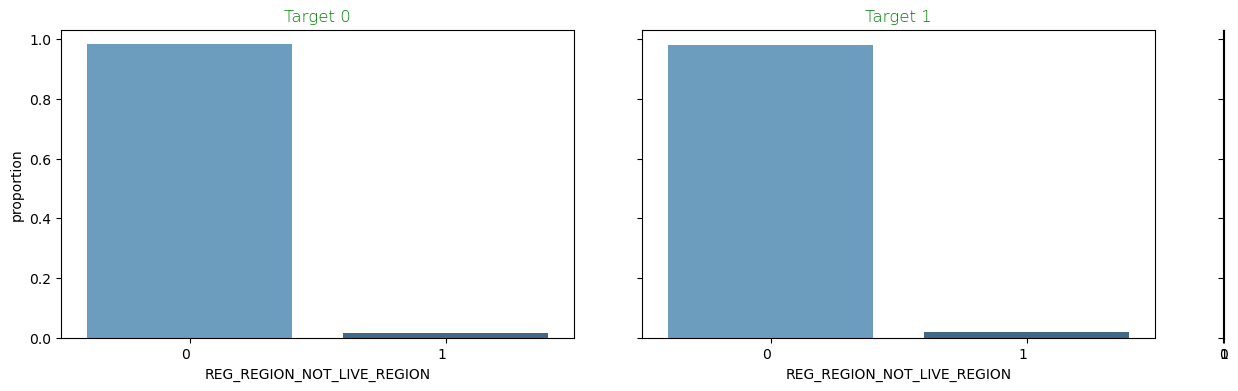

Graph for :  REG_REGION_NOT_WORK_REGION


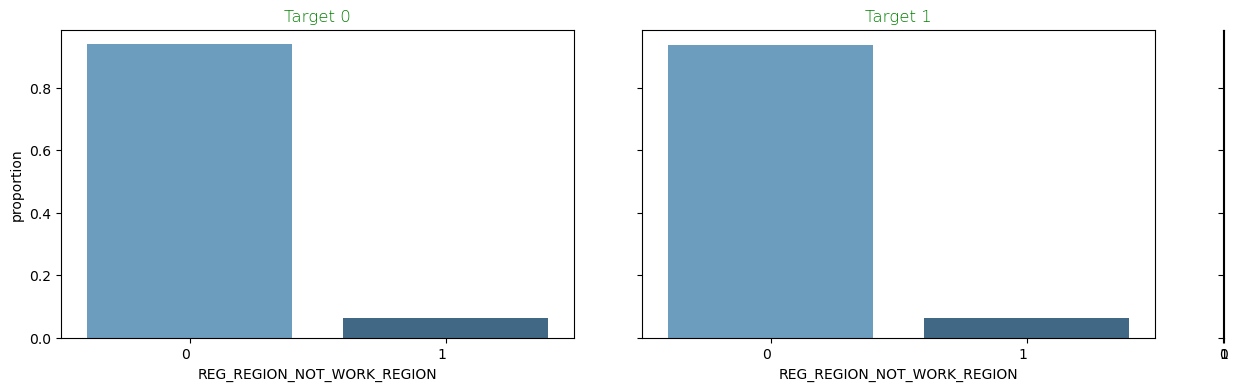

Graph for :  LIVE_REGION_NOT_WORK_REGION


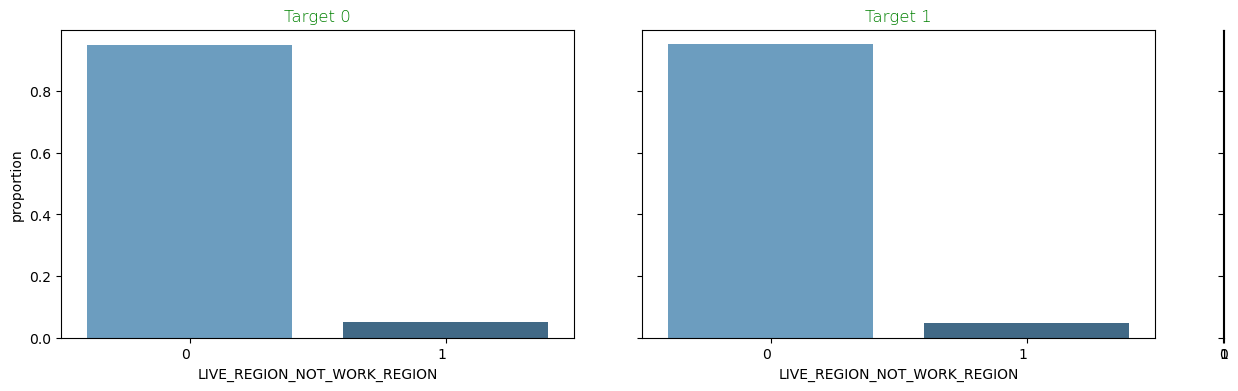

Graph for :  REG_CITY_NOT_LIVE_CITY


Graph for :  REG_CITY_NOT_WORK_CITY


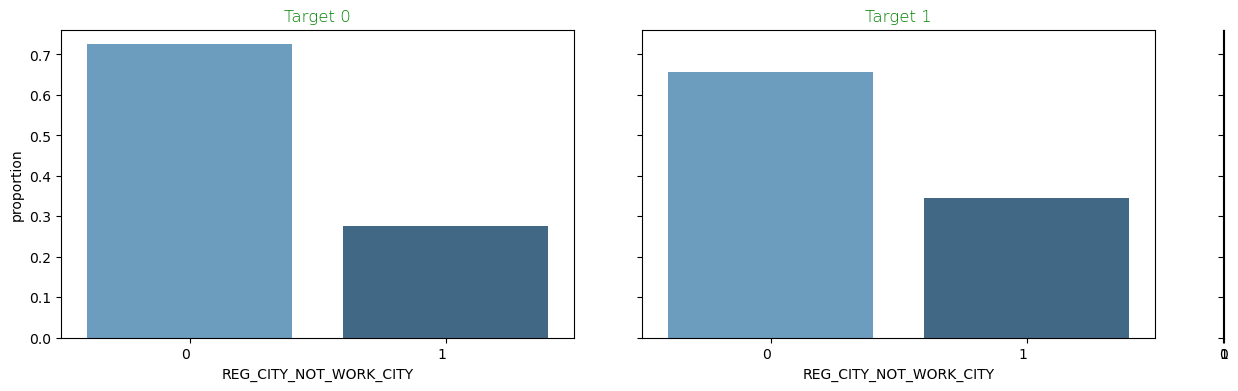

Graph for :  LIVE_CITY_NOT_WORK_CITY


Graph for :  OWN_CAR_flag


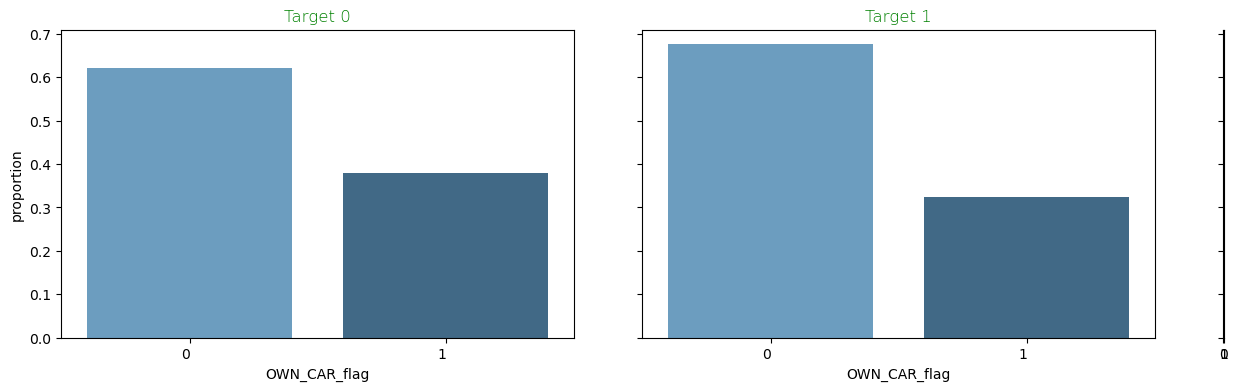

Graph for :  OWN_REALTY_flag


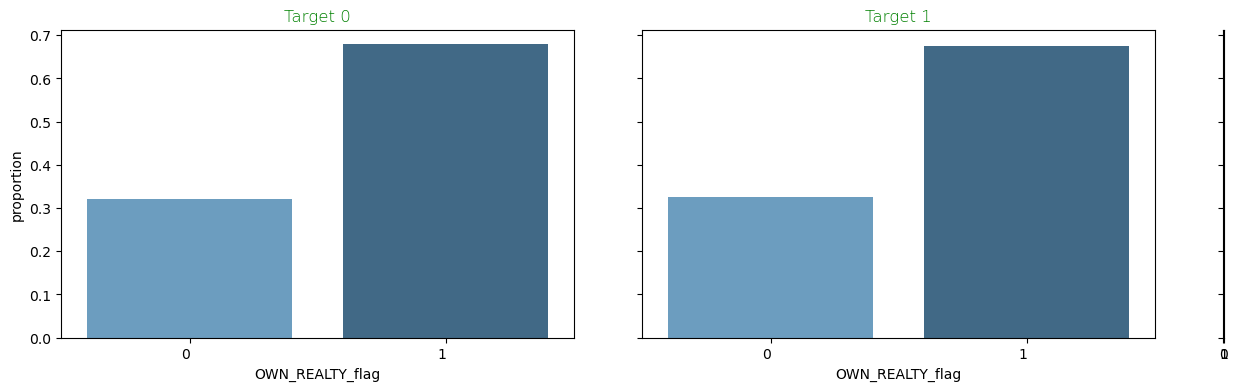

In [80]:

for i in catvarList:
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1,palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2,palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.savefig("93.png")
    plt.show()

##### **Few notable points**
    1.REGION_RATING_CLIENT'& 'REGION_RATING_CLIENT_W_CITY'- Region 2 has the highest % applicants both in TARGET 0 and Target 1
    2.REG_REGION_NOT_LIVE_REGION, REGION_NOT_WORK_REGION, VE_REGION_NOT_WORK_REGION'- For both Target 0 and Target 1 out of Region, ie 1 is very low and does not seem to affect the default rate
    3. REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY - Default ratio is higher for 1, ie different from permanent address  
    4.'CODE_GENDER' - Ratio of F to M in Target 0 is 2.3 and F to M in Target 0 - 1.3. indicatign that MEN are defaulting more than Women

### Univariate Analysis on Categorical Ordered Variables

This analysis explores the distribution of categorical ordinal variables across clients categorized by their payment difficulties (`TARGET` = 0 and `TARGET` = 1).

#### Categorical Ordinal Variables Analyzed:
1. **`REGION_RATING_CLIENT` & `REGION_RATING_CLIENT_W_CITY`**:
   - **Insight**: Region 2 shows the highest percentage of applicants in both `TARGET` 0 and `TARGET` 1 categories, suggesting it's the most common region for loan applicants.

2. **`REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION`**:
   - **Insight**: The presence of applicants outside their region of registration or work is low in both `TARGET` 0 and `TARGET` 1 groups, indicating this factor may not significantly influence default rates.

3. **`REG_CITY_NOT_LIVE_CITY`, `REG_CITY_NOT_WORK_CITY`**:
   - **Insight**: Applicants with a different city of living or working compared to their registration city show a higher default ratio, suggesting a potential correlation between mobility and default risk.

4. **`CODE_GENDER`**:
   - **Insight**: In `TARGET` 0, the female-to-male ratio is 2.3, whereas in `TARGET` 1, it decreases to 1.3, indicating a higher default rate among male applicants.

### Key Observations

- **`REGION_RATING_CLIENT` & `REGION_RATING_CLIENT_W_CITY`**: Region 2 is predominant across both target groups, reflecting its popularity among loan applicants.

- **`REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION`**: Low occurrence of applicants residing or working outside their registered region suggests minimal impact on default rates.

- **`REG_CITY_NOT_LIVE_CITY`, `REG_CITY_NOT_WORK_CITY`**: Higher default rates observed when applicants live or work in a city different from their registered city, implying potential instability in living or working arrangements.

- **`CODE_GENDER`**: A higher default ratio among males compared to females is noted, indicating gender may influence default risk to some extent.

### Conclusion

This univariate analysis provides insights into how categorical ordinal variables are distributed among clients with different payment difficulties (`TARGET` = 0 and `TARGET` = 1). Understanding these distributions helps in identifying potential risk factors associated with loan defaults, guiding further analysis and decision-making processes in credit risk management.

### Univariate Analysis on Continuous Variables

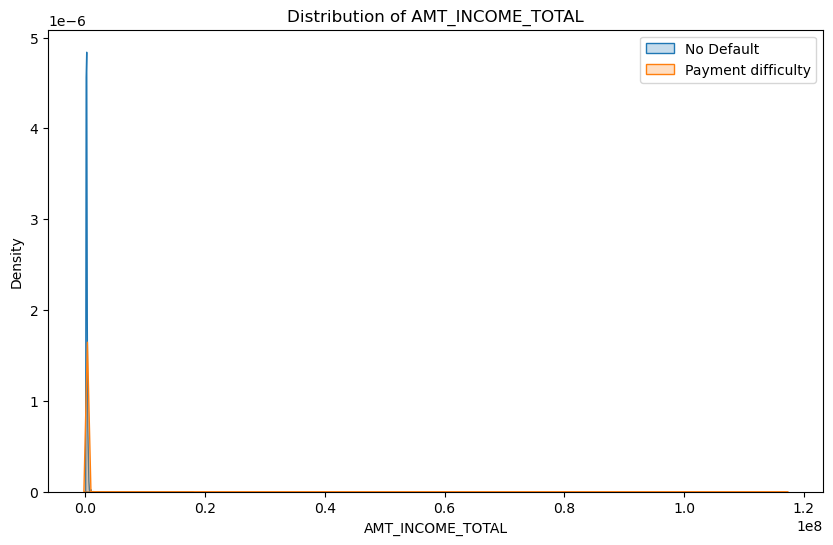

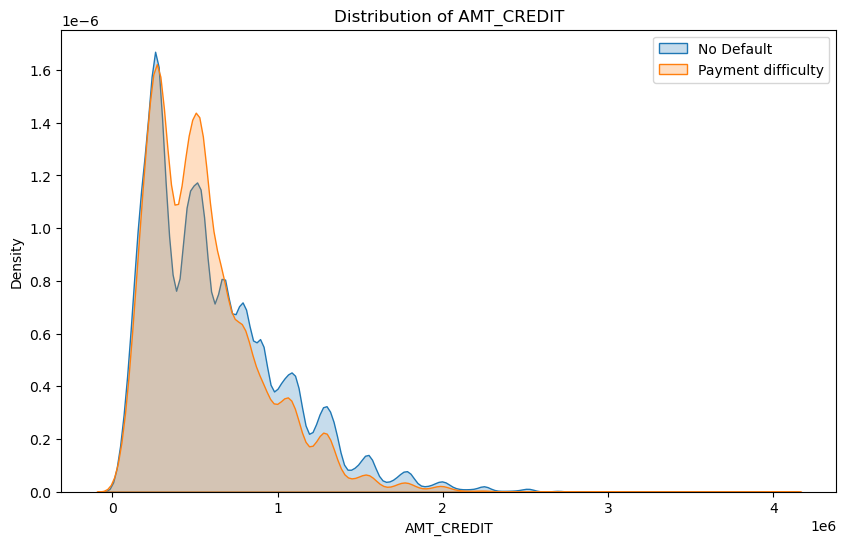

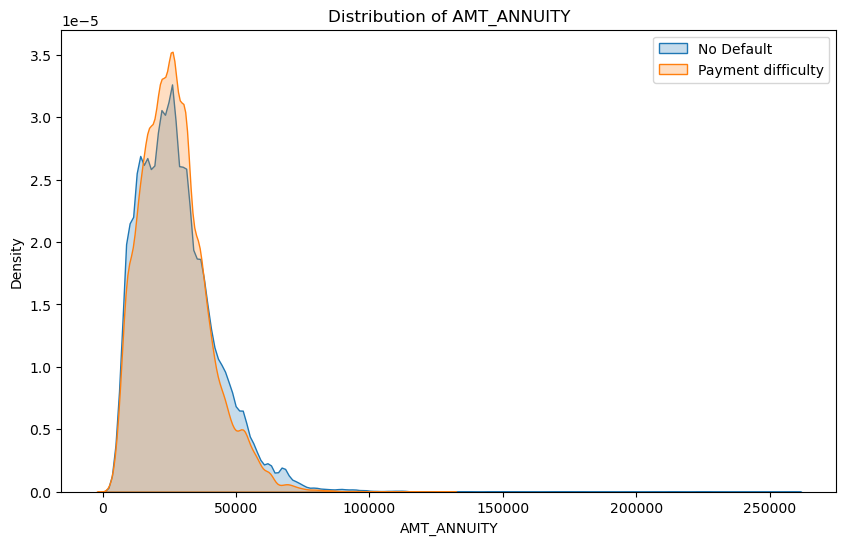

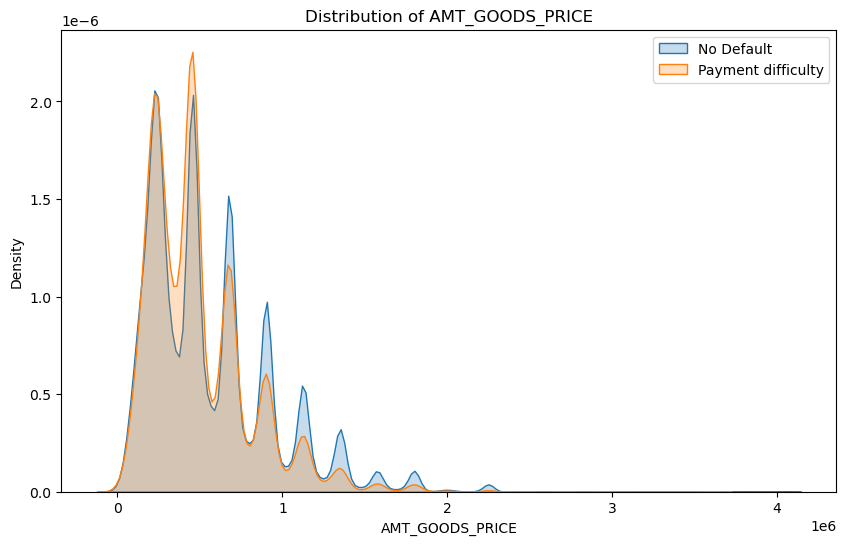

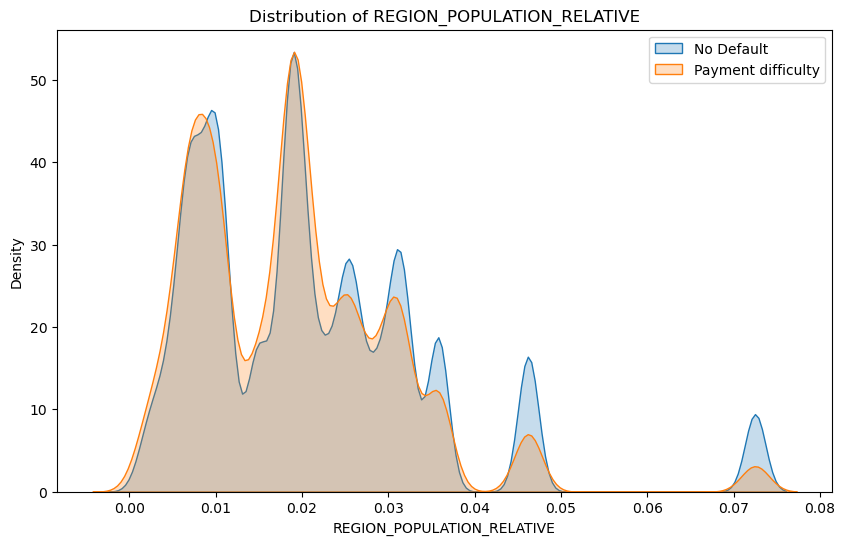

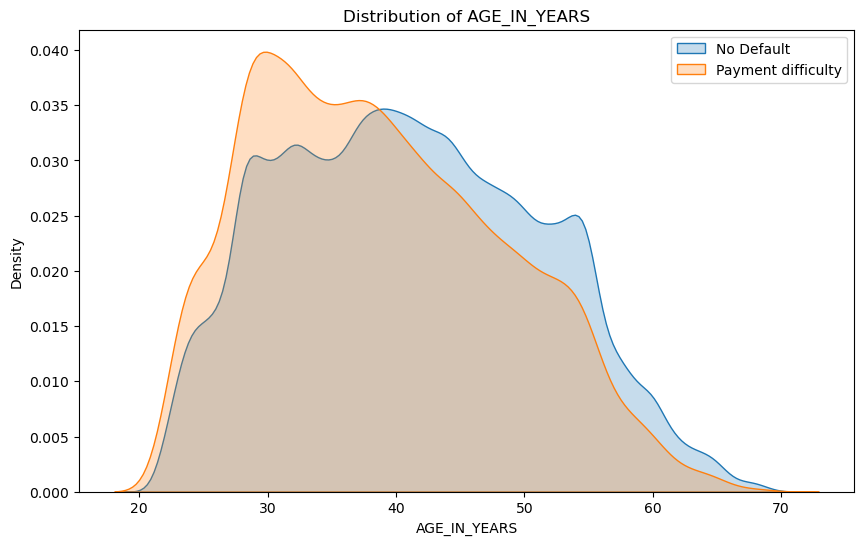

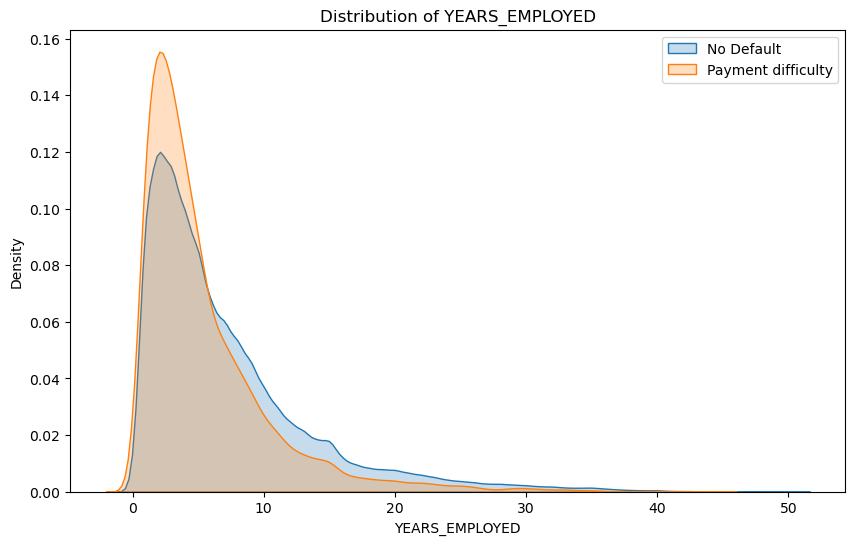

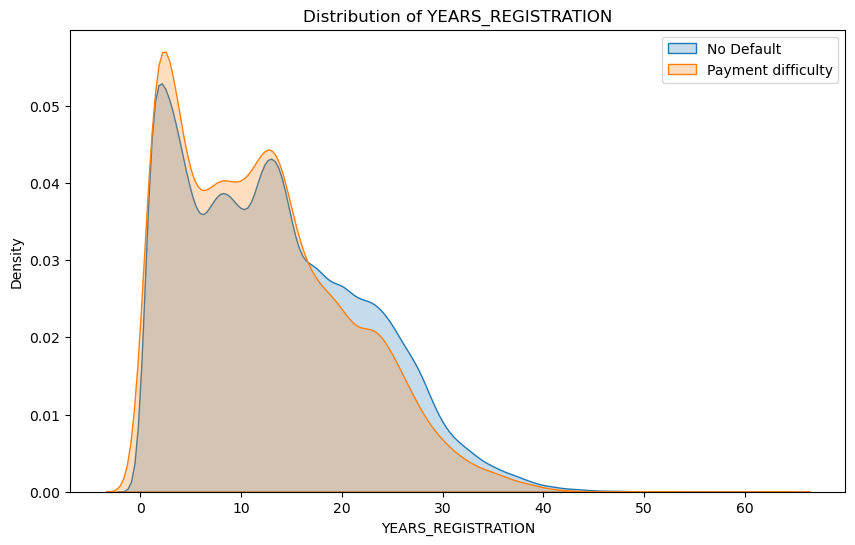

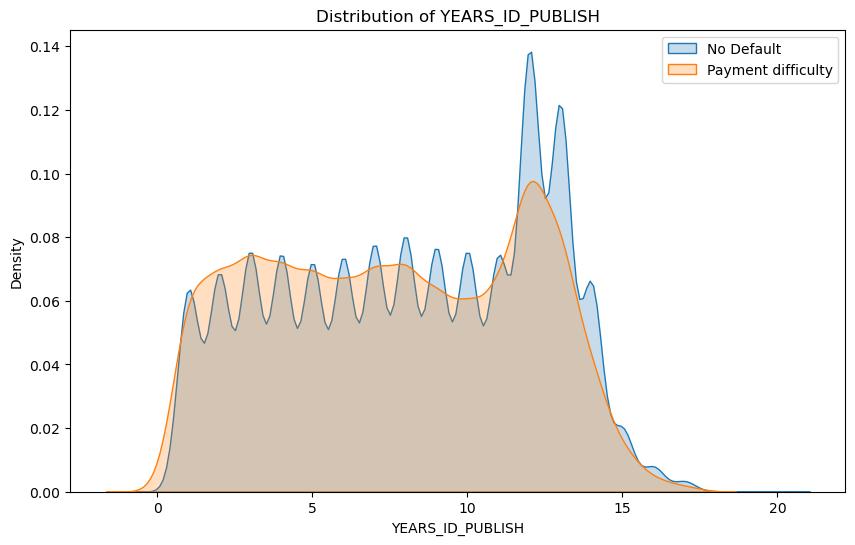

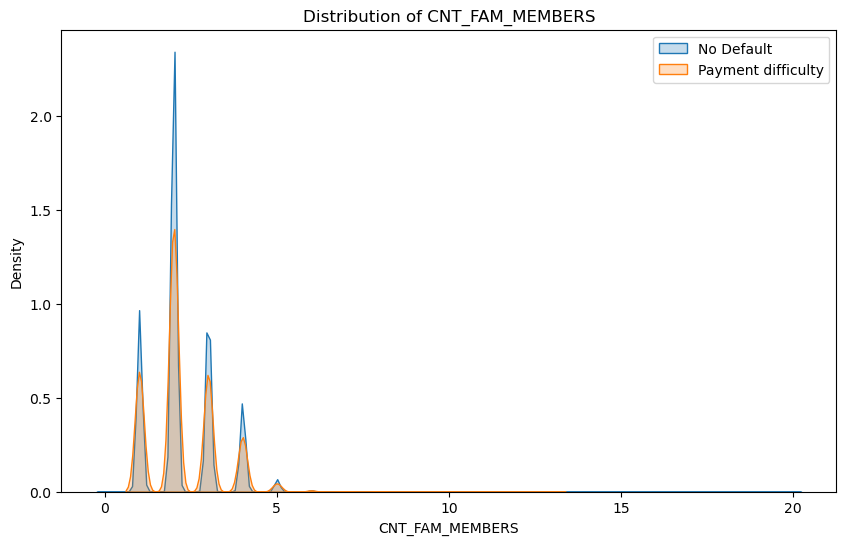

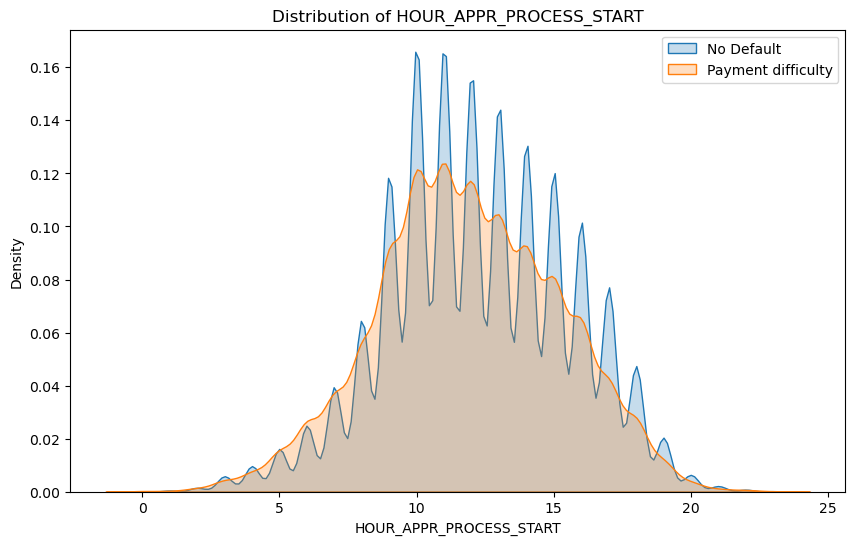

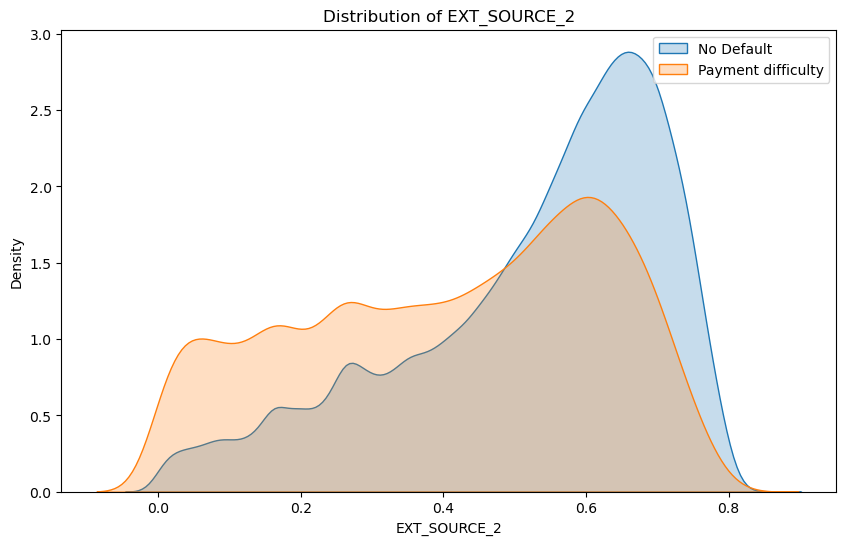

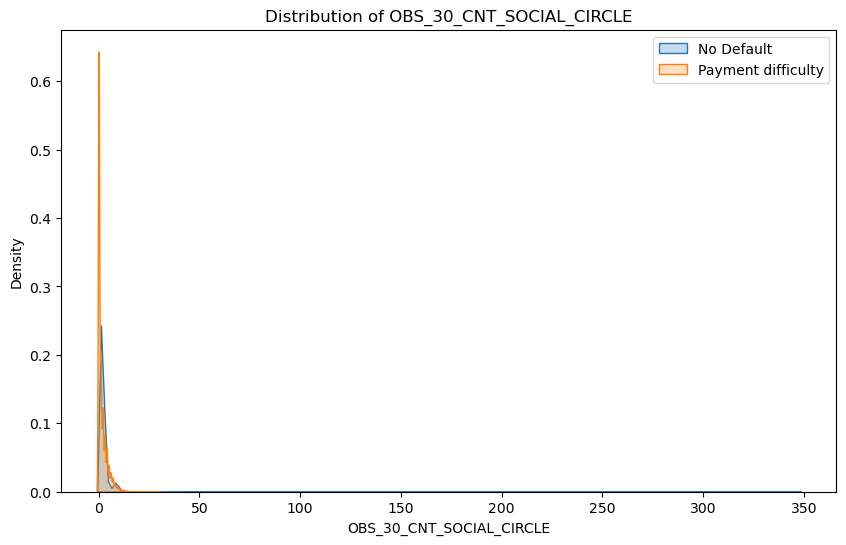

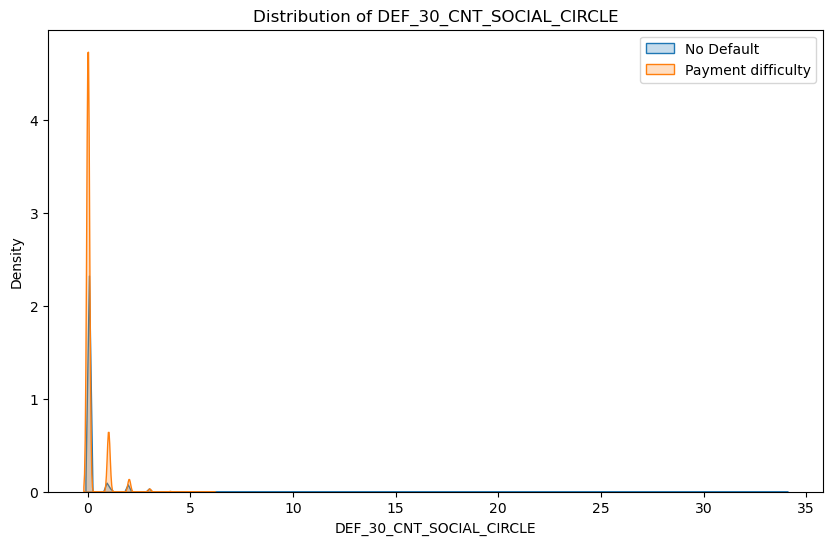

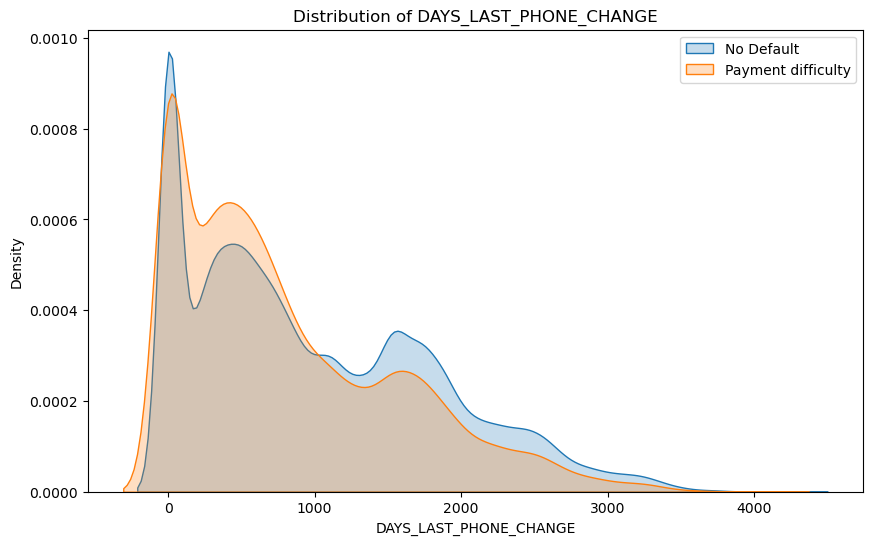

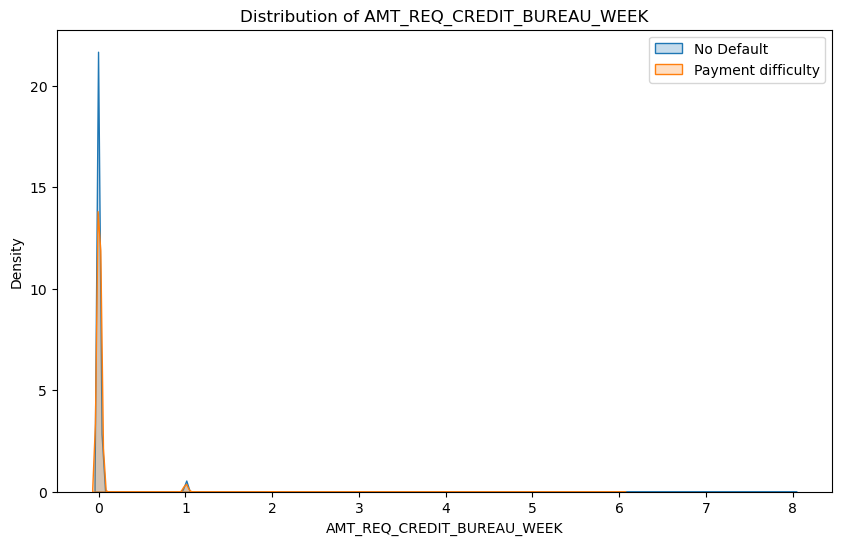

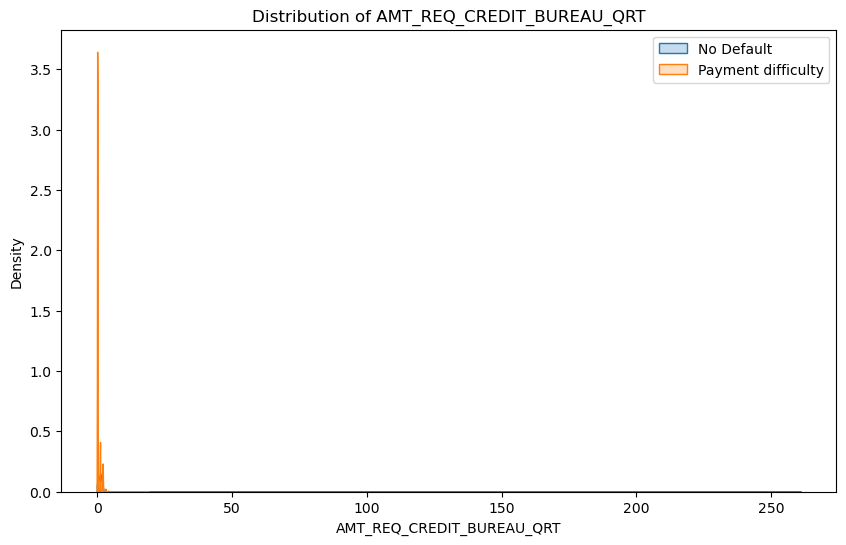

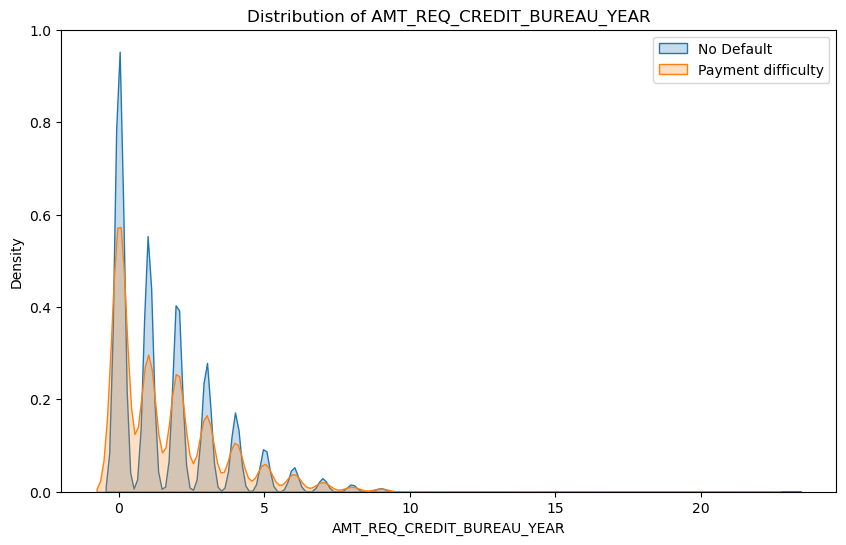

In [81]:
# Numerical columns
numericalList = [
    'SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 
    'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 
    'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Convert 'TARGET' to string type first, then to categorical
application_data['TARGET'] = application_data['TARGET'].astype(str).astype('category')

# Convert columns to numeric, coercing errors
for col in numericalList:
    application_data[col] = pd.to_numeric(application_data[col], errors='coerce')

# Separate data by TARGET values
df_cat_0 = application_data[application_data['TARGET'] == '0']
df_cat_1 = application_data[application_data['TARGET'] == '1']

# Plot the distributions
for i in numericalList:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_cat_0[i].dropna(), label='No Default', shade=True)
    sns.kdeplot(df_cat_1[i].dropna(), label='Payment difficulty', shade=True)
    plt.title(f'Distribution of {i}')
    plt.legend()
    plt.savefig("5.png")
    plt.show()


Graph for :  SK_ID_CURR


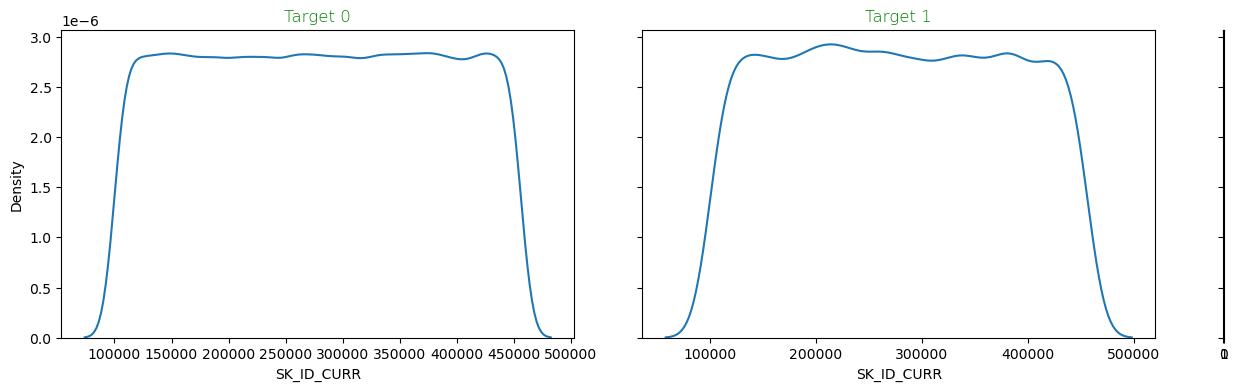

Graph for :  CNT_CHILDREN


Graph for :  AMT_INCOME_TOTAL


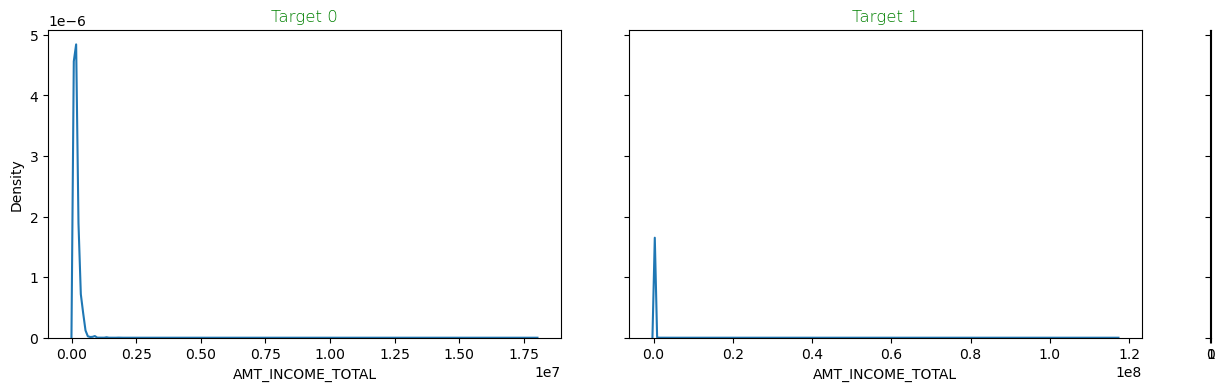

Graph for :  AMT_CREDIT


Graph for :  AMT_ANNUITY


Graph for :  AMT_GOODS_PRICE


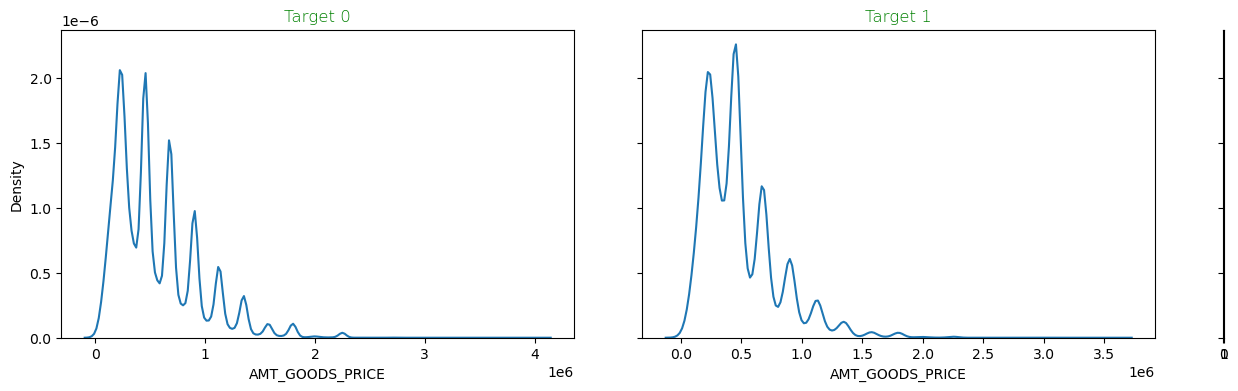

Graph for :  REGION_POPULATION_RELATIVE


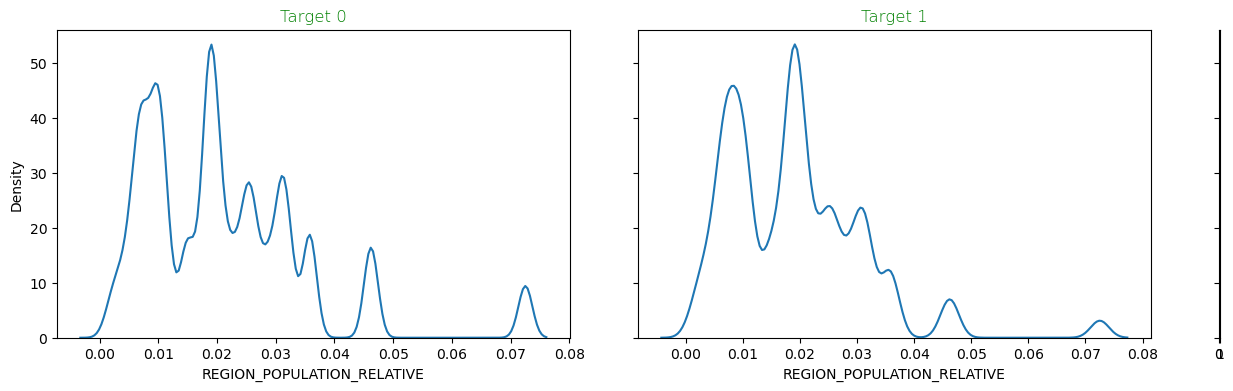

Graph for :  AGE_IN_YEARS


Graph for :  YEARS_EMPLOYED


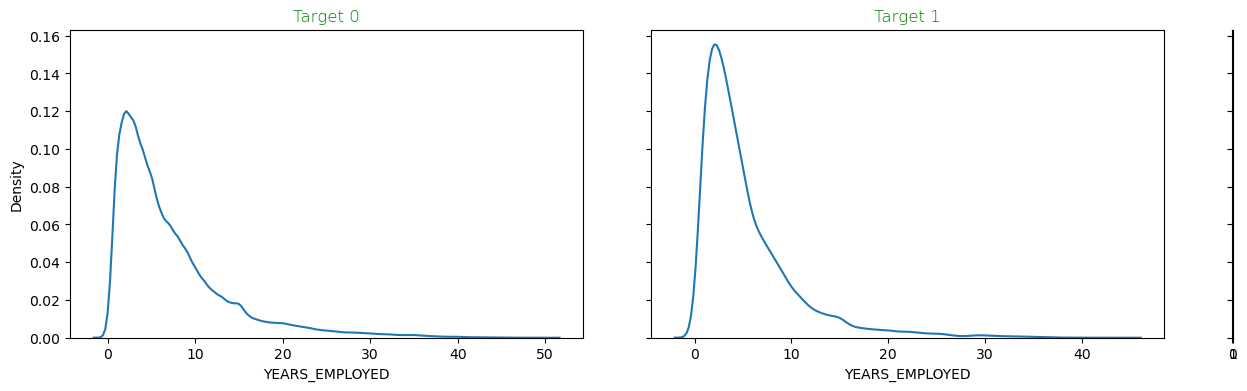

Graph for :  YEARS_REGISTRATION


Graph for :  YEARS_ID_PUBLISH


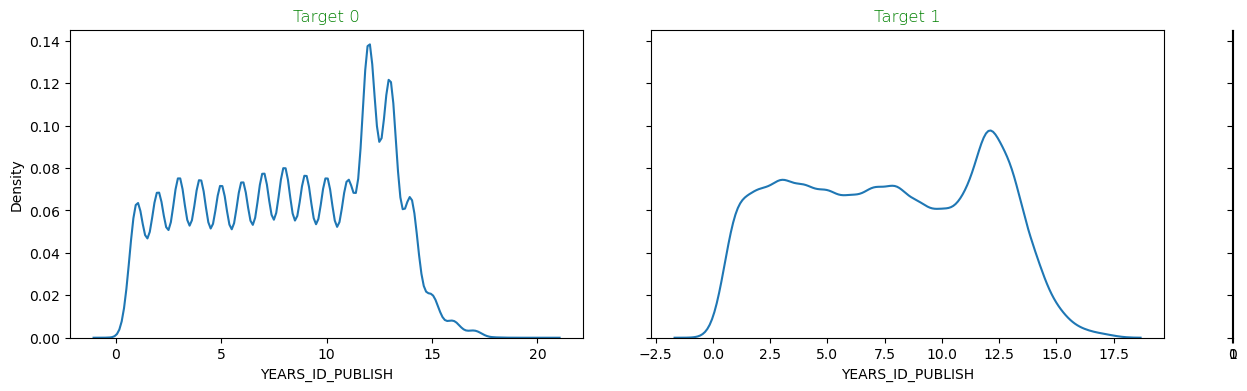

Graph for :  CNT_FAM_MEMBERS


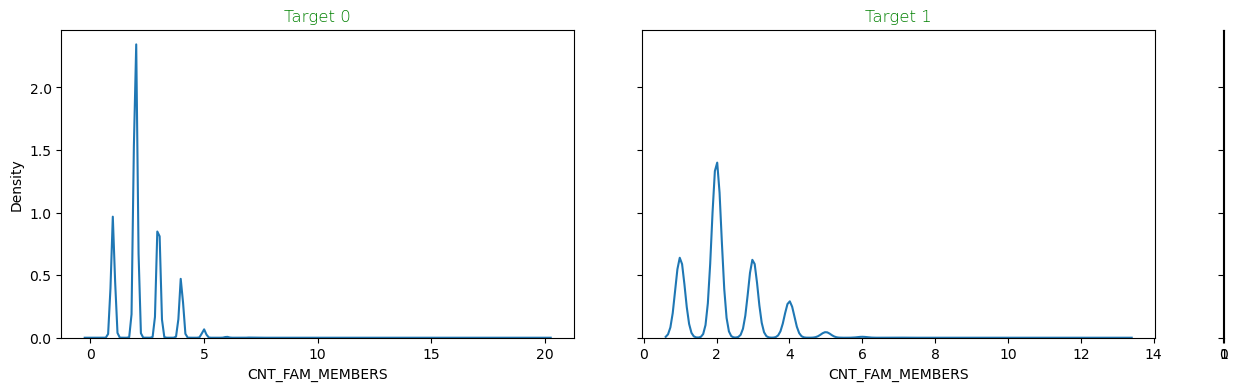

Graph for :  HOUR_APPR_PROCESS_START


Graph for :  EXT_SOURCE_2


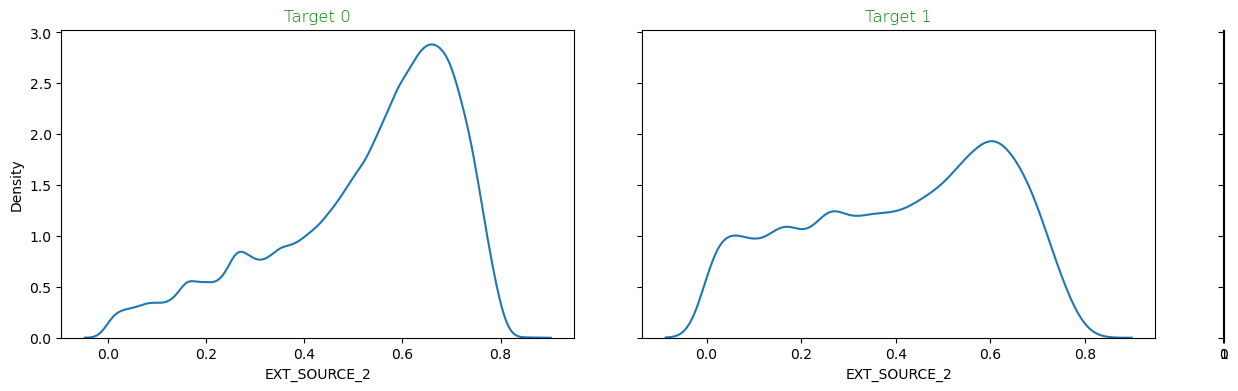

Graph for :  OBS_30_CNT_SOCIAL_CIRCLE


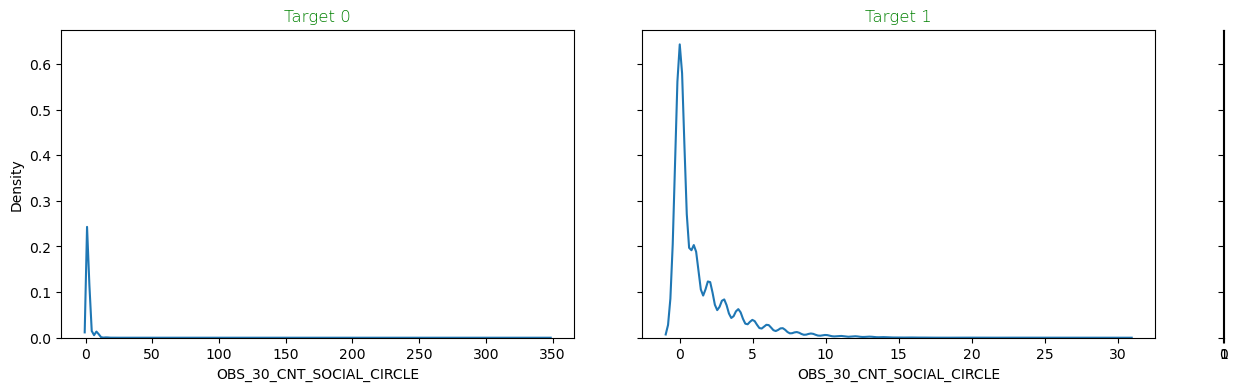

Graph for :  DEF_30_CNT_SOCIAL_CIRCLE


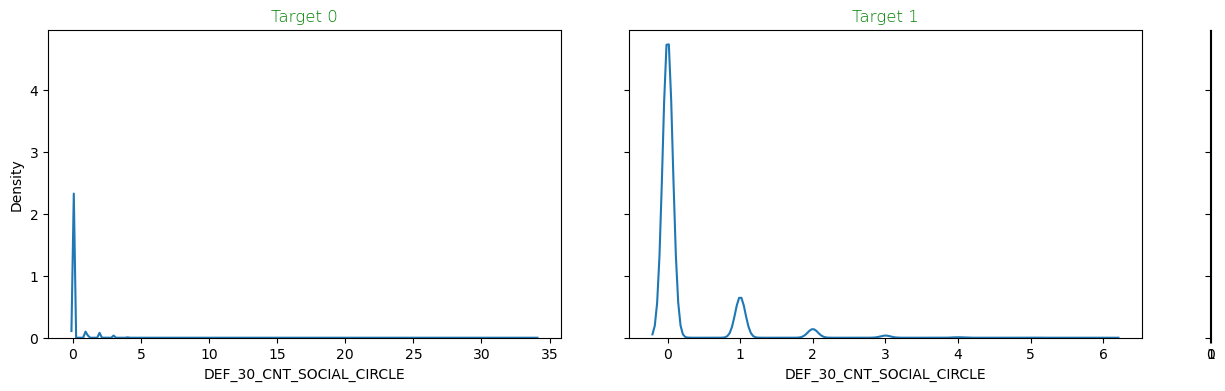

Graph for :  OBS_60_CNT_SOCIAL_CIRCLE


Graph for :  DEF_60_CNT_SOCIAL_CIRCLE


Graph for :  DAYS_LAST_PHONE_CHANGE


Graph for :  AMT_REQ_CREDIT_BUREAU_HOUR


Graph for :  AMT_REQ_CREDIT_BUREAU_DAY


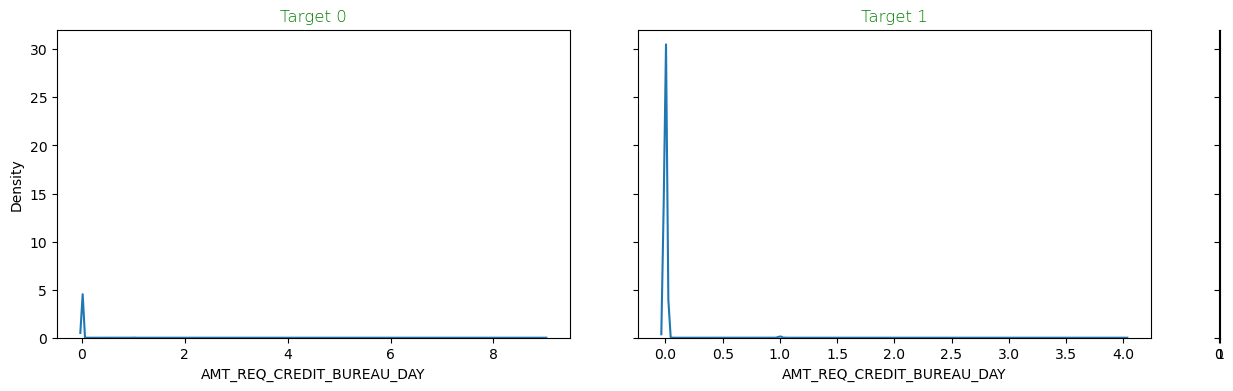

Graph for :  AMT_REQ_CREDIT_BUREAU_WEEK


Graph for :  AMT_REQ_CREDIT_BUREAU_MON


Graph for :  AMT_REQ_CREDIT_BUREAU_QRT


Graph for :  AMT_REQ_CREDIT_BUREAU_YEAR


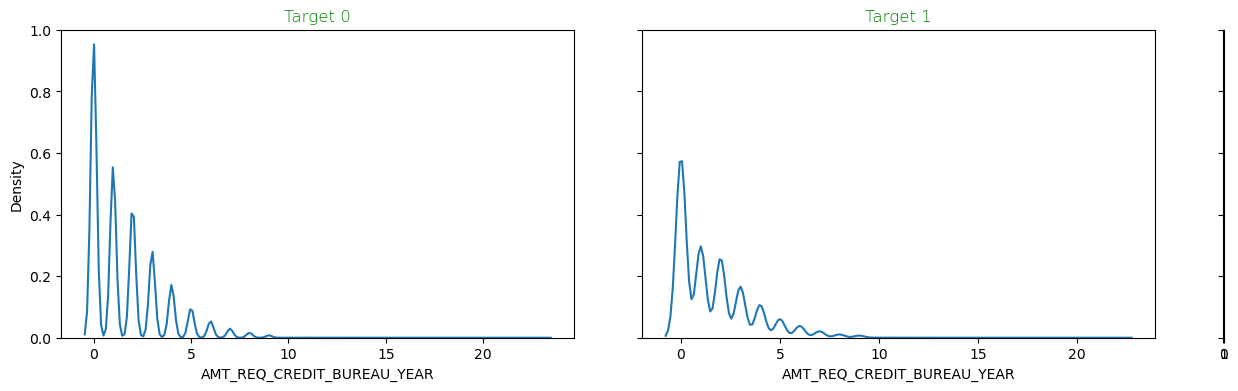

In [82]:
#Plotting in separate plots to get more CLARITY 
for i in numericalList:
    cat_num_0=df_cat_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.distplot(df_cat_0[i], ax=ax1,hist = False)
    
    
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts()
    chart2=sns.distplot(a=df_cat_1[i],ax=ax2,hist = False)
    
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

##### **Few notable points**
     1.AMT_CREDIT - Appears lower for Target 1, which is a good sign as lesser default loss to the company.
    2. AGE_IN_YEARS Density of 30 years in Target 1 larger, indicating younger are defaulting more
    3. YEARS_EMPLOYED has large no of rows of incorrect data and hence the data representation is incorrect
    4. Lesser no of Target 1 OWN cars
    5. EXT_SOURCE_2 is clearing showing that TARGET 0 has higher densiy of higher scores
    6. OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE - Very clearly visible that for Target 1, 30 DPD and 60 DPD observed in social surroundign is higher.
    7. DAYS_LAST_PHONE_CHANGE- More people from the Target 1 have changed their phone earlier than Target 1. Indicating intention issues in repaying loan
    8. AMT_REQ_CREDIT_BUREAU_YEAR, month, week, hour - has lesser Target 1 at 0 hits. This could indicate they are looking getting loans from various financial companies
    

### Univariate Analysis on Continuous Variables

This analysis focuses on the distribution and characteristics of continuous variables across clients categorized by their payment difficulties (`TARGET` = 0 and `TARGET` = 1).

#### Continuous Variables Analyzed:
1. **`AMT_CREDIT`**:
   - **Insight**: Lower values of credit amounts are observed more frequently in `TARGET` 1, indicating that clients with payment difficulties tend to apply for smaller loans.

2. **`AGE_IN_YEARS`**:
   - **Insight**: The density of clients aged around 30 years is higher in `TARGET` 1, suggesting that younger clients are more likely to experience payment difficulties.

3. **`YEARS_EMPLOYED`**:
   - **Insight**: Due to a large number of incorrect data entries, the representation of employment duration (`YEARS_EMPLOYED`) is skewed and requires further data validation.

4. **Ownership Variables (`OWN_CAR_flag`, `OWN_REALTY_flag`)**:
   - **Insight**: There are fewer clients in `TARGET` 1 who own cars, indicating a potential correlation between vehicle ownership and payment default risk.

5. **`EXT_SOURCE_2`**:
   - **Insight**: Higher scores on `EXT_SOURCE_2` are more densely distributed among clients in `TARGET` 0, suggesting that clients with better external credit scores are less likely to default.

6. **Social Circle Variables (`OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`)**:
   - **Insight**: Clients in `TARGET` 1 show higher densities of observed and defaulted payment delays in their social circles, indicating a possible influence of social environment on default behavior.

7. **`DAYS_LAST_PHONE_CHANGE`**:
   - **Insight**: Clients in `TARGET` 1 have changed their phone numbers earlier than those in `TARGET` 0, suggesting potential instability or intention issues related to repayment.

8. **`AMT_REQ_CREDIT_BUREAU_YEAR`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_HOUR`**:
   - **Insight**: Lower counts of credit inquiries (`AMT_REQ_CREDIT_BUREAU_*`) are observed in `TARGET` 1, indicating potentially lower credit-seeking behavior or fewer loan applications from various financial institutions.

### Key Observations

- **`AMT_CREDIT`**: Smaller credit amounts are associated with higher default rates (`TARGET` 1), suggesting prudent lending practices for minimizing default losses.

- **`AGE_IN_YEARS`**: Younger clients appear to be more susceptible to payment difficulties, highlighting the need for targeted risk assessment strategies for this demographic.

- **Data Quality Concerns**: `YEARS_EMPLOYED` shows significant data inconsistencies that require attention to ensure accurate analysis and modeling.

- **Ownership and Credit Scores**: Vehicle ownership (`OWN_CAR_flag`) and higher credit scores (`EXT_SOURCE_2`) correlate with lower default rates (`TARGET` 0), indicating potential predictors of repayment behavior.

- **Social and Contact Behavior**: Higher occurrences of observed and defaulted payment delays in social circles (`OBS_*_CNT_SOCIAL_CIRCLE`) and earlier phone number changes (`DAYS_LAST_PHONE_CHANGE`) in `TARGET` 1 suggest social and behavioral factors affecting loan repayment.

### Conclusion

This univariate analysis provides insights into how continuous variables are distributed among clients with different payment difficulties. Understanding these distributions helps identify potential risk factors associated with loan defaults, guiding further analysis and risk mitigation strategies in credit risk management and lending practices.

In [83]:
#Plotting Age_Group and Income_Group 

binList=["AGE_GROUP", "INCOME_GROUP"]
for i in binList:

    cat_num_0=df_cat_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='center')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts()
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='center')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

Graph for :  AGE_GROUP


Graph for :  INCOME_GROUP


##### **Few notable points**
    1. AGE_GROPUP - 35-45 are more in tARGET 0. In Target 1- 25-25 have higher share. Age does seem like influencing default.
    2. INCOME_GROUP - Medium income group have more count in Target 0 and Target 1

### Analysis of Age_Group and Income_Group

#### Age_Group Analysis:

- **Target 0**: The age group 35-45 years shows the highest count among clients with no payment difficulties (`TARGET` 0). This suggests that middle-aged individuals are more likely to manage their loan repayments effectively.
  
- **Target 1**: In contrast, the age group 25-35 years has the highest count among clients facing payment difficulties (`TARGET` 1). This indicates that younger adults are more prone to defaulting on their loans.

#### Income_Group Analysis:

- Both `TARGET` 0 and `TARGET` 1 show a similar distribution across income groups.
  
- **Medium Income**: Clients categorized under medium income groups appear most frequently in both `TARGET` 0 and `TARGET` 1. This implies that income level alone might not be a strong indicator of loan repayment ability without considering other factors.

### Observations

- **Age Influence**: The distribution of `AGE_GROUP` suggests that younger age groups tend to struggle more with loan repayments (`TARGET` 1), possibly due to lower financial stability or experience in managing finances.

- **Income Group Consistency**: The distribution across `INCOME_GROUP` indicates that while medium income clients are predominant, they are equally represented in both groups (`TARGET` 0 and `TARGET` 1). This suggests that income alone may not fully predict default risk without considering additional factors such as age, employment stability, or financial habits.

### Conclusion

Analyzing `AGE_GROUP` and `INCOME_GROUP` provides insights into demographic patterns related to loan default behaviors. Younger age groups exhibit higher default rates (`TARGET` 1), highlighting the importance of targeted risk assessment and support strategies for this demographic. Meanwhile, the distribution across income groups underscores the complexity of factors influencing loan repayment, emphasizing the need for comprehensive risk models in credit risk management. Further analysis integrating these demographic insights with other variables will enhance understanding and prediction of loan default risks effectively.

### Bivariate Analysis on Categorical and Continuous Variable

In [84]:
## Checking INCOME_GROUP vs AMT_CREDIT for both data frames

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target 0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df_cat_0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target 1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df_cat_1, showfliers=False, palette="Blues_d")
plt.savefig("100.png")
plt.show()

In [85]:
#Checking the same columns to see the affect of Very High Income group

plt.figure(figsize = (20,4))

plt.subplot(1,2,1)
plt.title("Income Group and Payment Difficulty")
sns.countplot(x='INCOME_GROUP', hue='TARGET', data=application_data)
plt.savefig("101.png")
plt.show()

In [86]:
#Checking absolute values
res=pd.pivot_table(data=application_data, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(res,2)

TARGET                0          1
INCOME_GROUP                      
VeryLow       383301.36  388319.86
Low           481227.83  460766.56
Medium        596979.70  563308.52
High          725759.90  655157.16
VeryHigh      887288.22  783312.85

##### **Few notable points**
    1. We can infer that though the maximum no of loans is given to Medium income group. Default value per loan is highest in High income group as the AMT_CREDIT is higher too. The loan book of the financial institution can get affected due to higher amount not being paid back.
    2. The company must devise a different set of rules and policies while approving higher income group loans.

### Bivariate Analysis: INCOME_GROUP vs AMT_CREDIT

#### Analysis Overview:

**Income Group and Loan Amount (AMT_CREDIT)**

1. **Distribution of AMT_CREDIT by Income Group:**
   - **Target 0 (No Payment Difficulty)**: Across all income groups, the boxplots show a generally increasing trend in loan amounts (`AMT_CREDIT`) as income level (`INCOME_GROUP`) increases. This suggests that clients with higher incomes tend to apply for and receive larger loans, which is expected.
   - **Target 1 (Payment Difficulty)**: Similarly, for clients facing payment difficulties, the boxplots indicate higher loan amounts (`AMT_CREDIT`) associated with higher income groups (`INCOME_GROUP`). However, the spread of loan amounts tends to be wider, indicating variability in default risk even within higher income brackets.

2. **Impact of Very High Income Group:**
   - The countplot and mean AMT_CREDIT comparison highlight that while the highest number of loans are disbursed to clients in the Medium income group, the highest average loan amounts (`AMT_CREDIT`) are observed in the High and VeryHigh income groups.
   - **Average AMT_CREDIT by Income Group:**
     - **Target 0**: The average loan amounts increase consistently from lower income groups (VeryLow, Low) to higher income groups (High, VeryHigh), indicating a positive correlation between income and loan size.
     - **Target 1**: Although the trend is similar, clients in the High and VeryHigh income groups who face payment difficulties (`TARGET` 1) still borrow substantial amounts, but the average loan size is lower compared to clients without payment difficulties (`TARGET` 0) in these income groups.

### Observations:

- **Risk Management Insights**: Despite higher loan amounts being disbursed to High and VeryHigh income groups, these clients also exhibit higher rates of payment difficulties (`TARGET` 1). This suggests that while higher income clients may qualify for larger loans, they also present higher default risks. Thus, additional risk assessment criteria or loan terms may be necessary to mitigate these risks effectively.
  
- **Policy Implications**: Financial institutions should consider implementing differentiated risk management policies for different income segments. This could involve stricter evaluation criteria or customized loan terms for clients with higher incomes to better manage default risks and protect the loan portfolio.

- **Customer Segmentation**: Understanding the distribution of loan amounts and default rates across income groups helps in segmenting customers effectively. Tailored strategies can then be developed to address the specific needs and risks associated with each income segment, thereby optimizing lending practices and reducing overall credit risk.

### Conclusion:

Analyzing the relationship between `INCOME_GROUP` and `AMT_CREDIT` provides crucial insights into how income levels influence borrowing behaviors and default risks. This analysis underscores the importance of nuanced risk assessment and tailored policies in credit risk management to ensure sustainable lending practices and financial stability for the institution.

#### Categorical and Continuous Variable

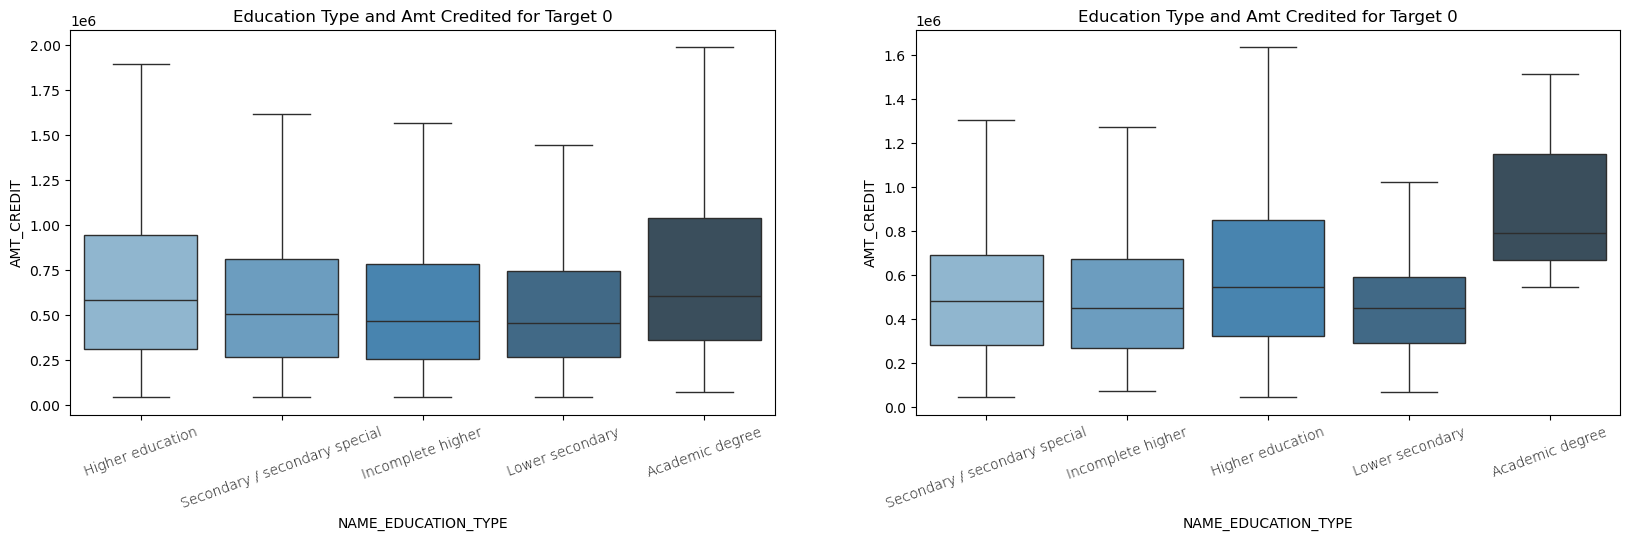

In [87]:
## Bivariate Categoric to Continuous 

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df_cat_0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df_cat_1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.savefig("104.png")
plt.show()


##### **Few notable points**
    1. Median of Loan values defaulting for Applicants with Academic degree is higher. But as we saw in a plot above, no of applicants with academic degree is miniscule 
    2. No inference can be drwan from this analysis.

### Bivariate Analysis: Education Type vs AMT_CREDIT

#### Analysis Overview:

**Education Type and Loan Amount (AMT_CREDIT)**

1. **Target 0 (No Payment Difficulty)**:
   - The boxplot shows the distribution of loan amounts (`AMT_CREDIT`) across different education types (`NAME_EDUCATION_TYPE`). There are varying medians and spreads, indicating differences in borrowing behavior based on education level.
   - Notably, applicants with Academic degree tend to have higher median loan amounts compared to other education types. However, the number of applicants with Academic degrees is relatively low, as observed in previous analyses.

2. **Target 1 (Payment Difficulty)**:
   - Similar to Target 0, the boxplot for Target 1 depicts the distribution of loan amounts (`AMT_CREDIT`) by education type. Again, there are differences in median values and spreads across education categories.
   - Applicants with Academic degrees, although fewer in number, show a similar trend of higher median loan amounts compared to other education types.

### Observations:

- **Limited Inference**: Due to the small number of applicants with Academic degrees compared to other education categories, drawing definitive conclusions about the relationship between education type and loan amounts (`AMT_CREDIT`) is challenging.
  
- **Further Analysis Needed**: To better understand the impact of education on borrowing behavior and default rates, further exploration with larger datasets or additional variables may be necessary. This could involve looking into academic qualifications in relation to income levels, employment types, or demographic factors that influence borrowing decisions and repayment capacity.

### Conclusion:

While the analysis suggests a potential trend where applicants with higher education levels (such as Academic degree) may request larger loan amounts, the small sample size of such applicants limits the depth of conclusions that can be drawn. For robust insights, future analyses should consider broader datasets or incorporate supplementary variables to uncover more nuanced relationships between education, borrowing behavior, and loan default risks.

In [88]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0


res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Businessman           1125000.0  1272857.0
Commercial associate   668840.0   685304.0
Maternity leave        562500.0   765000.0
Pensioner              215357.0   277500.0
State servant          665132.0   695357.0
Student                372556.0   598753.0
Working                577838.0   587183.0

In [89]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 1


res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
State servant         614062.0  616407.0
Working               537035.0  533821.0

Female on Maternity leave and unmployed, Females and males are defaulting larger loan values credited to them

### Analysis of AMT_CREDIT with Gender and Income Type for Target 0 and Target 1

#### Target 0 (No Payment Difficulty)

**Relationship between AMT_CREDIT, Gender, and Income Type**

- **Income Types**:
  - **Businessman**: Male businessmen tend to have higher average loan amounts (`AMT_CREDIT`) compared to females.
  - **Commercial associate**: Both genders have relatively similar average loan amounts.
  - **Maternity leave**: Average loan amounts are notably higher for females compared to males.
  - **Pensioner**: Males have slightly higher average loan amounts than females.
  - **State servant**: Similar average loan amounts for both genders.
  - **Student**: Average loan amounts are higher for females compared to males.
  - **Working**: Average loan amounts are slightly higher for females compared to males.

#### Target 1 (Payment Difficulty)

**Relationship between AMT_CREDIT, Gender, and Income Type**

- **Income Types**:
  - **Commercial associate**: Females have slightly higher average loan amounts compared to males.
  - **Maternity leave**: Average loan amounts are higher for females, while data for males is not available.
  - **State servant**: Both genders have similar average loan amounts.
  - **Working**: Females have slightly higher average loan amounts compared to males.

### Observations:

- **Gender Differences**: Across different income types, there are noticeable variations in average loan amounts (`AMT_CREDIT`) between males and females.
- **Income Type Variability**: The relationship between gender and loan amounts varies depending on the income type. For instance, males tend to have higher loan amounts among businessmen and pensioners, while females show higher amounts during maternity leave.
- **Target 1 Insights**: In cases of payment difficulty (Target 1), females on maternity leave exhibit higher average loan amounts compared to other income types, though further data is needed for males in this category.

### Conclusion:

The analysis reveals distinct patterns in loan amounts (`AMT_CREDIT`) based on gender and income types for both Target 0 and Target 1 groups. While males generally show higher loan amounts in certain categories like businessmen and pensioners, females display higher amounts in unique circumstances such as maternity leave. These insights highlight the nuanced relationship between borrower demographics and loan characteristics, providing valuable information for risk assessment and policy formulation in lending practices. Further exploration with additional variables could offer deeper insights into these observed trends.

#### Categorical and Continuous Variable

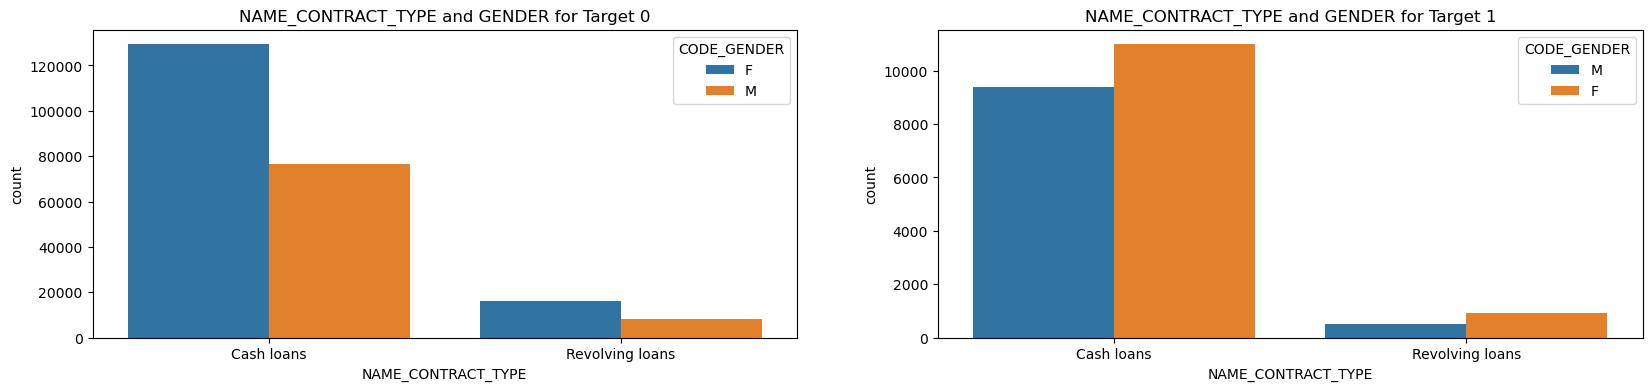

In [90]:
#Bivariate categorical and categorical

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 0")
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df_cat_0)

plt.subplot(1, 2, 2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 1")
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df_cat_1)
plt.savefig("108.png")
plt.show()

##### **Few notable points**
    1. As noted above data has more females as loan applicant.
    2. As seen in plot above, though male applicants are lower, ratio of male applicants deafulting is higher. Let us check this by another analysis

### Bivariate Analysis: Categorical vs. Categorical Variables

#### Relationship between NAME_CONTRACT_TYPE, GENDER, and Target (0 vs. 1)

**Target 0 (No Payment Difficulty)**

- **NAME_CONTRACT_TYPE and GENDER**:
  - **Cash loans**: More females than males apply for cash loans.
  - **Revolving loans**: The number of males and females applying for revolving loans is relatively balanced.

**Target 1 (Payment Difficulty)**

- **NAME_CONTRACT_TYPE and GENDER**:
  - **Cash loans**: Similar to Target 0, more females than males apply for cash loans.
  - **Revolving loans**: The number of males and females applying for revolving loans is also balanced, but the proportion of males appears higher compared to cash loans.

### Observations:

1. **Gender Disparities**: Across both Target 0 and Target 1, there are generally more female applicants than male applicants.
   
2. **Default Ratio**: Despite fewer male applicants overall, there is a higher proportion of male applicants among defaults, especially noticeable in cash loans for Target 1. This indicates that males might have a higher default rate relative to their application numbers compared to females.

### Conclusion:

The analysis of NAME_CONTRACT_TYPE and GENDER reveals interesting insights into the distribution of loan applicants and their default behavior across different loan types. While females constitute a larger proportion of applicants overall, males show a higher default rate in certain loan categories, particularly cash loans in the case of payment difficulties (Target 1). These findings underscore the importance of considering both demographic factors (such as gender) and loan characteristics (such as contract type) in assessing and managing lending risks effectively.

In [91]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")

sns.countplot(x='NAME_CONTRACT_TYPE', hue = "TARGET", data=application_data[(application_data['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title( "NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot(x='NAME_CONTRACT_TYPE', hue = "TARGET", data=application_data[(application_data['CODE_GENDER']=="F")])
plt.savefig("110.png")
plt.show()


##### **Few notable points**
    1. Male applicants are defaulting more that female applicants

### Bivariate Analysis: Categorical vs. Categorical Variables

#### Relationship between NAME_CONTRACT_TYPE, TARGET, and GENDER

**Male Applicants (CODE_GENDER = M)**

- **NAME_CONTRACT_TYPE and TARGET**:
  - **Cash loans**: Male applicants have a higher count in defaulting (TARGET = 1) compared to non-defaulting (TARGET = 0).
  - **Revolving loans**: Similar to cash loans, there are more defaults among male applicants.

**Female Applicants (CODE_GENDER = F)**

- **NAME_CONTRACT_TYPE and TARGET**:
  - **Cash loans**: Female applicants also show a higher count in defaulting (TARGET = 1) compared to non-defaulting (TARGET = 0), but the disparity between default and non-default cases is less pronounced than in males.
  - **Revolving loans**: The pattern is similar to cash loans, with a higher count of defaults among females.

### Observations:

1. **Gender Disparities in Defaulting**: Across both cash loans and revolving loans, male applicants consistently show a higher count of defaults compared to female applicants. This suggests that males have a higher propensity for defaulting on loans in this dataset.

2. **Loan Type Effect**: Both male and female applicants exhibit higher default counts in cash loans compared to revolving loans. This could indicate that cash loans, which typically involve larger sums and longer durations, pose a higher risk of default.

### Conclusion:

The analysis of NAME_CONTRACT_TYPE, TARGET (default vs. non-default), and GENDER reveals significant differences in defaulting behavior between male and female applicants across different loan types. Males, despite constituting a smaller portion of the applicant pool, show a higher count of defaults in both cash loans and revolving loans compared to females. Understanding these gender-specific patterns is crucial for lenders to tailor risk assessment strategies and loan approval criteria effectively. Further exploration into other demographic and financial variables could provide deeper insights into these observed trends, aiding in the development of targeted risk mitigation strategies in lending practices.

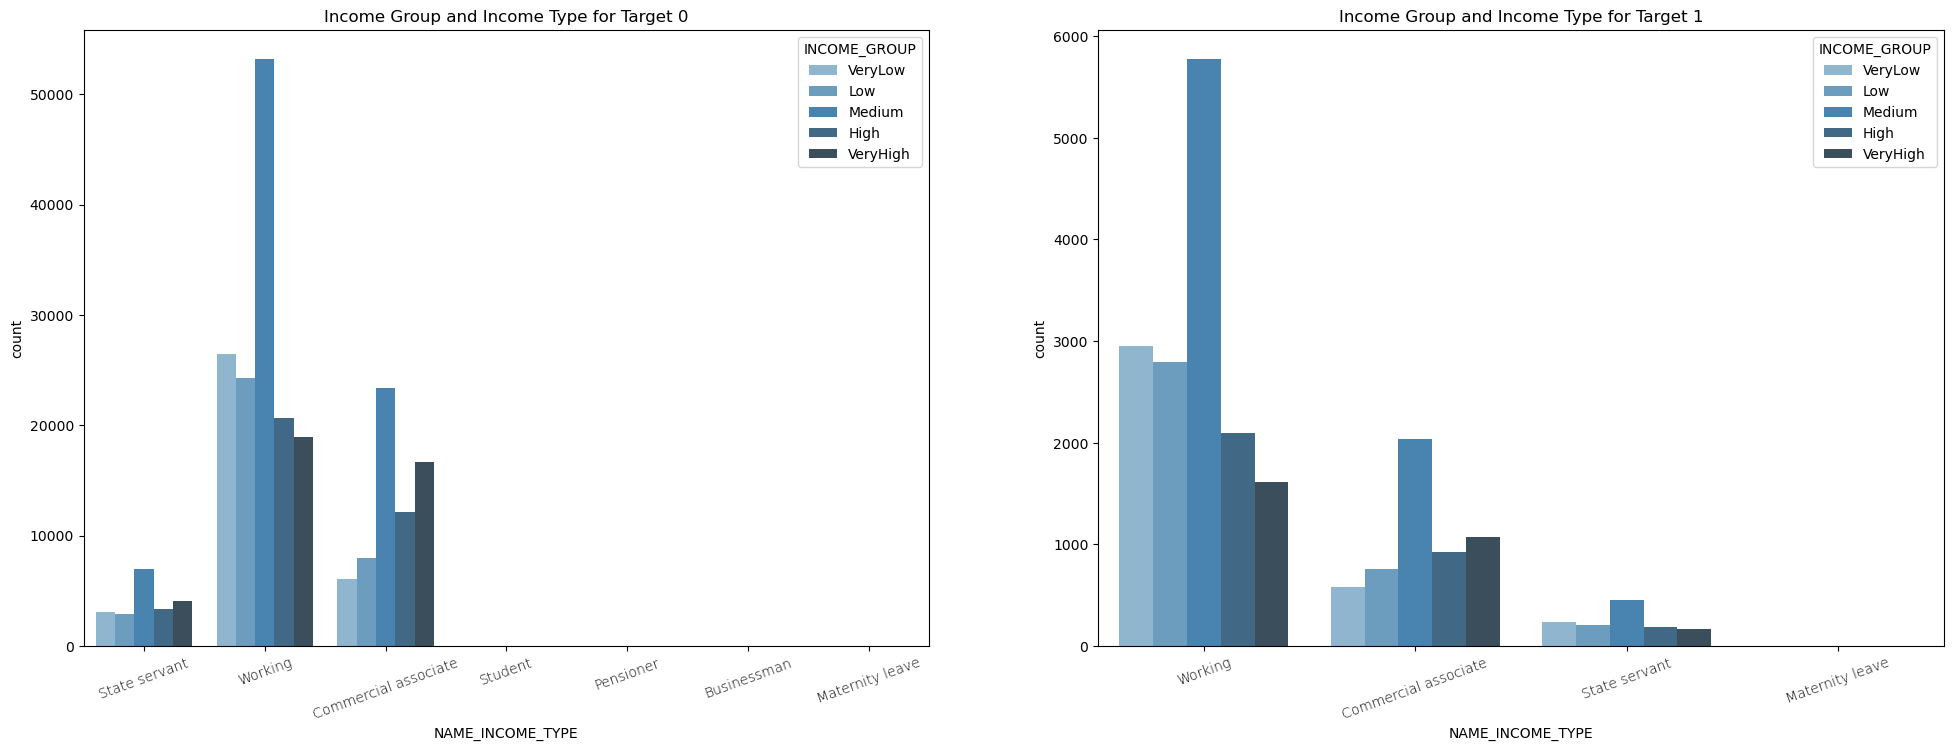

In [92]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Income Group and Income Type for Target 0")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =df_cat_0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Income Group and Income Type for Target 1")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =df_cat_1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.savefig("113.png")
plt.show()

##### **Few notable points**
    Medium income group with income type has almost 1 in 12 defaults. Higher than the avg 1 in 11 defaults.
    

#### Relationship between Income Group and Income Type by Target

**Target 0 (No Default)**

- **Income Type and Income Group**:
  - Across various income types (Businessman, Commercial associate, Maternity leave, Pensioner, State servant, Student, Working), the distribution of income groups (VeryLow, Low, Medium, High, VeryHigh) varies.
  - Notably, among different income types, Medium income group applicants are more prevalent, indicating a substantial number of loans are extended to this group.

**Target 1 (Default)**

- **Income Type and Income Group**:
  - Similar to Target 0, the distribution of income groups across income types varies significantly.
  - Medium income group applicants again dominate across income types in defaults (Target 1), suggesting that this group exhibits a higher default rate compared to others.

### Observations:

1. **Medium Income Group**: 
   - Both in Target 0 and Target 1, the Medium income group stands out with a notable presence across income types.
   - For Target 1 (default cases), Medium income group applicants have a higher representation compared to other income groups. This indicates that despite being a predominant category for loans, they also contribute significantly to defaults.

2. **Income Type Variability**: 
   - The distribution of income groups varies across different income types. For instance, Pensioners and State servants tend to fall into higher income groups (High and VeryHigh), while Working and Commercial associates are spread across Medium to High income groups.

### Conclusion:

The analysis of Income Group and Income Type across Target 0 and Target 1 reveals that while Medium income group applicants are prevalent in both non-default and default scenarios, they exhibit a higher default rate in Target 1. This suggests that although Medium income group applicants are actively seeking and obtaining loans, they represent a higher risk segment for defaulting. Lenders may need to adjust their risk assessment and lending policies to mitigate the higher default risk associated with this income group. Further exploration into additional demographic and financial variables could provide deeper insights into these patterns and aid in refining risk management strategies in lending practices.

In [93]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0


res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)


CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Businessman           1125000.0  1272857.0
Commercial associate   668840.0   685304.0
Maternity leave        562500.0   765000.0
Pensioner              215357.0   277500.0
State servant          665132.0   695357.0
Student                372556.0   598753.0
Working                577838.0   587183.0

In [94]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0

res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
State servant         614062.0  616407.0
Working               537035.0  533821.0

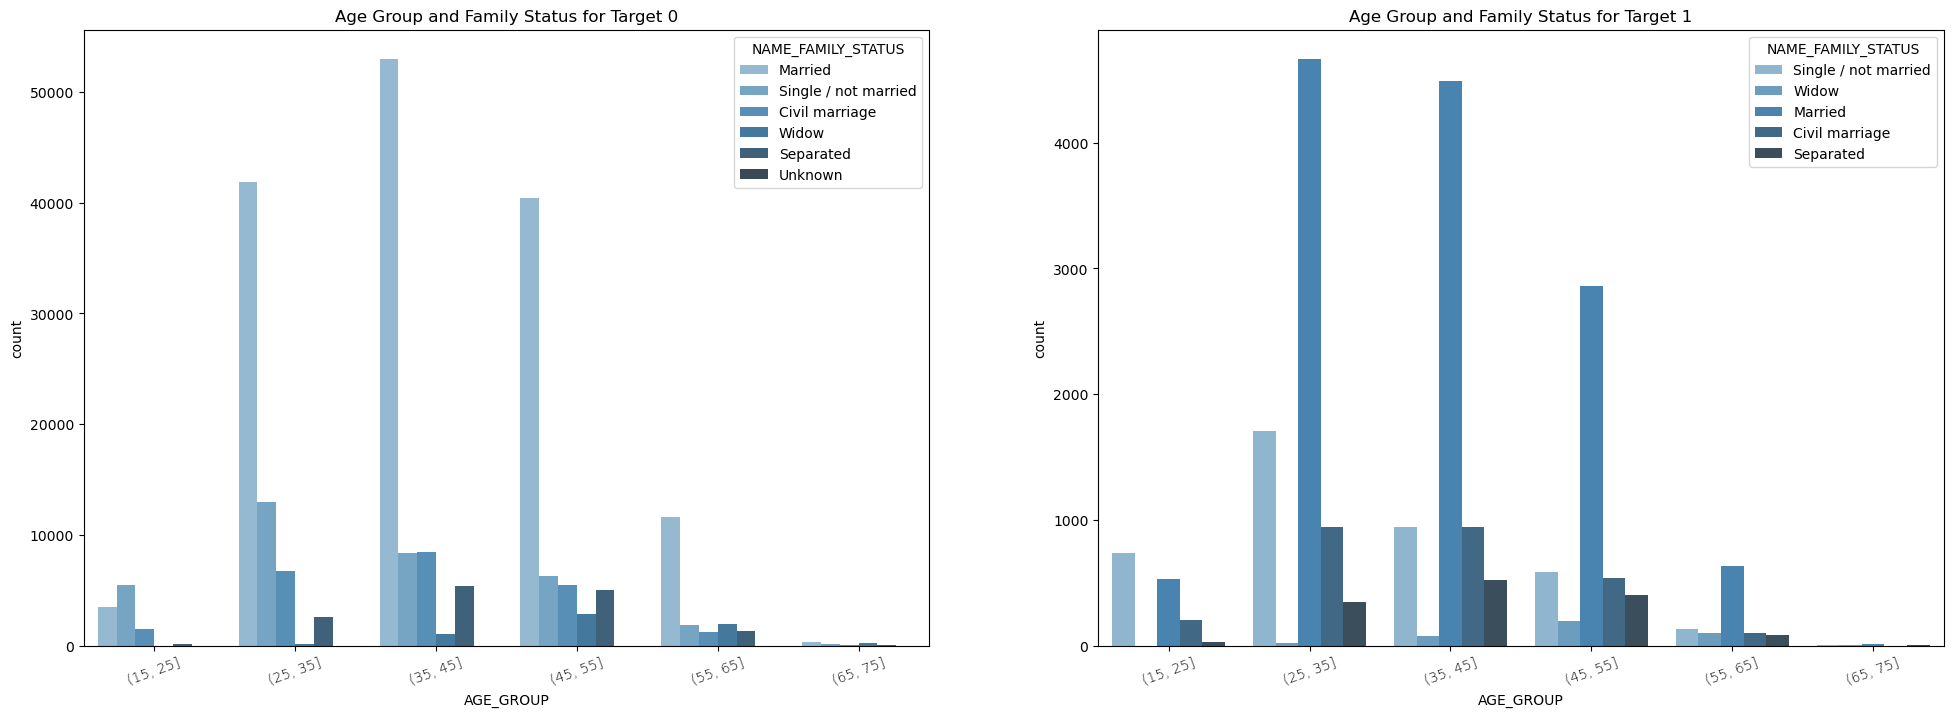

In [95]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot(x ='AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =df_cat_0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot(x ='AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =df_cat_1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.savefig("115.png")
plt.show()

### Bivariate Analysis: Categorical vs. Categorical Variables

#### Relationship between Age Group and Family Status by Target

**Target 0 (No Default)**

- **Age Group and Family Status**:
  - The distribution of family status across different age groups varies noticeably.
  - In younger age groups (e.g., 20-30), there's a higher proportion of single/not married individuals.
  - As age increases, married individuals become more prevalent across all age groups.
  - Older age groups (e.g., 60-70) tend to have a larger percentage of widowed individuals compared to younger groups.

**Target 1 (Default)**

- **Age Group and Family Status**:
  - Similar to Target 0, there's a distinct distribution of family status across age groups.
  - Younger age groups (e.g., 20-30) still show a higher proportion of single/not married individuals.
  - Married individuals dominate across all age groups, but there's a noticeable presence of single/not married individuals contributing to defaults, especially in younger age groups.

### Observations:

1. **Family Status Distribution**:
   - Both in Target 0 and Target 1, the distribution of family status varies significantly across different age groups.
   - Younger age groups (e.g., 20-30) tend to have a higher proportion of single/not married individuals, which is consistent across both groups.
   - Married individuals are predominant in older age groups, suggesting stability in financial obligations.

2. **Default Patterns**:
   - While married individuals are prevalent across all age groups, there's a notable presence of single/not married individuals in default cases, particularly in younger age brackets.
   - This indicates that marital status may influence default behavior, with unmarried individuals potentially facing higher financial risks or less stable income sources.

### Conclusion:

The analysis of Age Group and Family Status across Target 0 and Target 1 highlights varying demographic patterns in loan defaults. Younger age groups and single/not married individuals appear to be more susceptible to defaulting, possibly due to factors such as lower financial stability or less established income sources. Lenders can use this insight to tailor risk assessment models and lending strategies, emphasizing more stringent criteria or tailored financial products for younger and unmarried applicants to mitigate default risks effectively. Further exploration into additional demographic and financial variables could provide deeper insights into these patterns and aid in refining risk management strategies in lending practices.

## <font color = red> Top Correlations

In [96]:
# Remove categorical columns from df_cat_0
numeric_df_corr_0 = df_cat_0.select_dtypes(include=['number'])

# Compute the correlation matrix and take absolute values
correlation_cat_0 = numeric_df_corr_0.corr().abs()

# Display the correlation matrix
print(correlation_cat_0)


                             SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                     1.000000      0.000484          0.001415   
CNT_CHILDREN                   0.000484      1.000000          0.009826   
AMT_INCOME_TOTAL               0.001415      0.009826          1.000000   
AMT_CREDIT                     0.000777      0.018704          0.326155   
AMT_ANNUITY                    0.001148      0.007613          0.400763   
AMT_GOODS_PRICE                0.000567      0.022360          0.333385   
REGION_POPULATION_RELATIVE     0.000094      0.030352          0.169306   
AGE_IN_YEARS                   0.000917      0.242402          0.045504   
YEARS_EMPLOYED                 0.000117      0.062917          0.029933   
YEARS_REGISTRATION             0.000268      0.162935          0.034440   
YEARS_ID_PUBLISH               0.000246      0.117838          0.026417   
CNT_FAM_MEMBERS                0.001378      0.893265          0.003160   
REGION_RATING_CLIENT     

In [97]:
# Create an upper triangular matrix of booleans
upper_triangle = np.triu(np.ones(correlation_cat_0.shape), k=1).astype(bool)

# Mask the lower triangle of the correlation matrix
corr_df = correlation_cat_0.where(upper_triangle).unstack().reset_index()

# Rename the columns for clarity
corr_df.columns = ['Column1', 'Column2', 'Correlation']

# Drop rows with NaN correlation values
corr_df.dropna(subset=['Correlation'], inplace=True)

# Sort the DataFrame by correlation values in descending order
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)

# Display the top 10 highest correlations
print(corr_df.head(10))

                         Column1                     Column2  Correlation
862     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998492
178              AMT_GOODS_PRICE                  AMT_CREDIT     0.986402
467  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.949504
386              CNT_FAM_MEMBERS                CNT_CHILDREN     0.893265
898     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.861492
611  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
719      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.820828
179              AMT_GOODS_PRICE                 AMT_ANNUITY     0.766985
143                  AMT_ANNUITY                  AMT_CREDIT     0.762128
426         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.543381


In [98]:
# Remove categorical columns from df_cat_1
df_corr_1 = df_cat_1.select_dtypes(include=['number'])

# Compute the correlation matrix and take absolute values
correlation_cat_1 = df_corr_1.corr().abs()

# Create an upper triangular matrix of booleans
upper_triangle = np.triu(np.ones(correlation_cat_1.shape), k=1).astype(bool)

# Mask the lower triangle of the correlation matrix
corr_df1 = correlation_cat_1.where(upper_triangle).unstack().reset_index()

# Rename the columns for clarity
corr_df1.columns = ['Column1', 'Column2', 'Correlation']

# Drop rows with NaN correlation values
corr_df1.dropna(subset=['Correlation'], inplace=True)

# Sort the DataFrame by correlation values in descending order
corr_df1 = corr_df1.sort_values(by=['Correlation'], ascending=False)

# Display the top 10 highest correlations
print(corr_df1.head(10))

                         Column1                     Column2  Correlation
862     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998289
178              AMT_GOODS_PRICE                  AMT_CREDIT     0.982536
467  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956531
386              CNT_FAM_MEMBERS                CNT_CHILDREN     0.893829
898     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.867983
611  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
719      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.768247
179              AMT_GOODS_PRICE                 AMT_ANNUITY     0.749591
143                  AMT_ANNUITY                  AMT_CREDIT     0.748708
575   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.506747


We obesrve that the TOP 10 correlation columns are same for Target 0 and Target 1 dataframes
We will further analyse each of these on a scatter plot to get better inferenes

### Overview of Top Correlations Analysis

In this analysis, we identified the top correlations within the numeric variables for both non-default (Target 0) and default (Target 1) categories. Here's a summary of the findings:

#### Key Points:

1. **Correlation Matrix Computation**:
   - We computed the correlation matrices for the numeric variables in both the Target 0 and Target 1 datasets, taking absolute values to focus on the strength of the relationships without considering direction (positive or negative).

2. **Filtering and Sorting**:
   - An upper triangular matrix was used to filter out duplicate correlations and self-correlations.
   - The resulting correlation values were unstacked, sorted, and the top 10 highest correlations for both Target 0 and Target 1 were identified and compared.

3. **Top Correlations for Target 0**:
   - **OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE**: 0.998492
   - **AMT_GOODS_PRICE and AMT_CREDIT**: 0.986726
   - **REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT**: 0.949504
   - **CNT_FAM_MEMBERS and CNT_CHILDREN**: 0.893265
   - **DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE**: 0.861492
   - **LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION**: 0.860421
   - **LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY**: 0.820828
   - **AMT_GOODS_PRICE and AMT_ANNUITY**: 0.766955
   - **AMT_ANNUITY and AMT_CREDIT**: 0.762128
   - **REGION_RATING_CLIENT and REGION_POPULATION_RELATIVE**: 0.543381

4. **Top Correlations for Target 1**:
   - **OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE**: 0.998289
   - **AMT_GOODS_PRICE and AMT_CREDIT**: 0.982536
   - **REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT**: 0.956531
   - **CNT_FAM_MEMBERS and CNT_CHILDREN**: 0.893829
   - **DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE**: 0.867983
   - **LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION**: 0.846872
   - **LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY**: 0.768247
   - **AMT_GOODS_PRICE and AMT_ANNUITY**: 0.749591
   - **AMT_ANNUITY and AMT_CREDIT**: 0.748708
   - **REG_REGION_NOT_WORK_REGION and REG_REGION_NOT_LIVE_REGION**: 0.506747

5. **Observations**:
   - The top 10 correlations are remarkably similar for both Target 0 and Target 1 categories.
   - High correlations between variables like **OBS_60_CNT_SOCIAL_CIRCLE** and **OBS_30_CNT_SOCIAL_CIRCLE** or **AMT_GOODS_PRICE** and **AMT_CREDIT** are consistent across both categories.
   - This consistency suggests that the relationships between these variables are strong regardless of the default status.

### Conclusion:

The analysis of top correlations for both non-default and default categories reveals consistent relationships among certain pairs of variables. The identified correlations will be further examined using scatter plots to gain deeper insights and draw more specific inferences. These findings can inform strategies for risk management, predictive modeling, and feature engineering in financial data analysis.

###  Analysis on Continuous Variables

In [99]:
bivVar1=corr_df.head(10)['Column1'].tolist()
bivVar1

['OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'REGION_RATING_CLIENT']

In [100]:
bivVar2=corr_df.head(10)['Column2'].tolist()
bivVar2

['OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'REGION_RATING_CLIENT',
 'CNT_CHILDREN',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE']

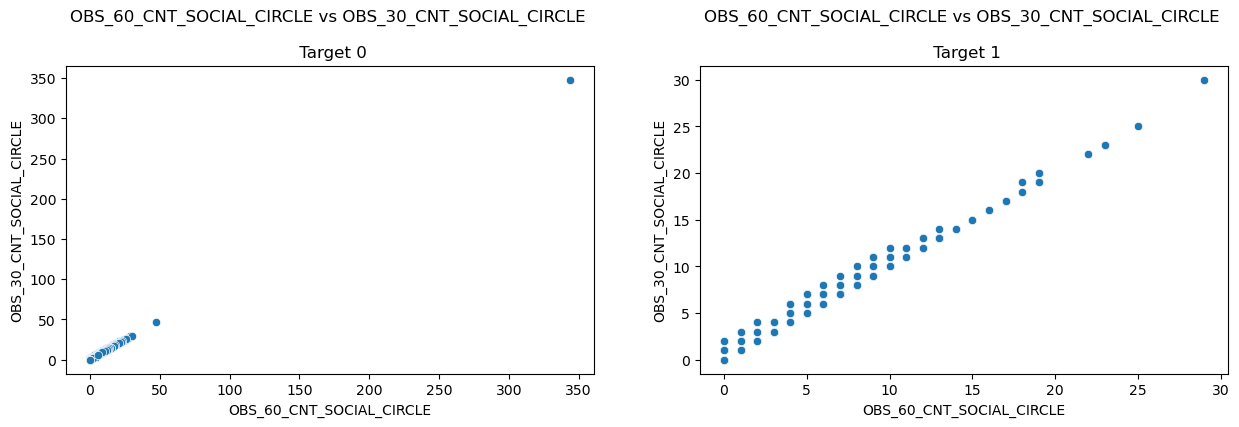

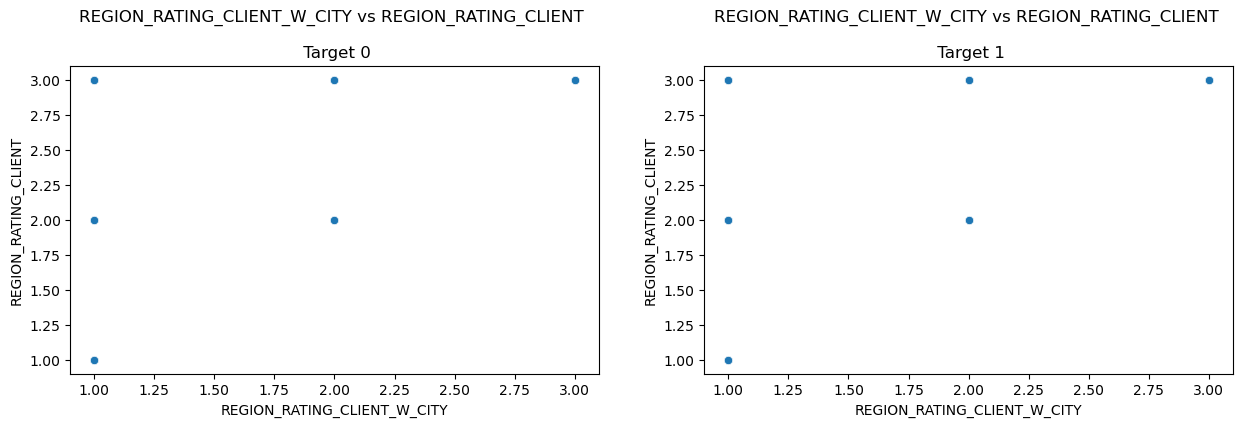

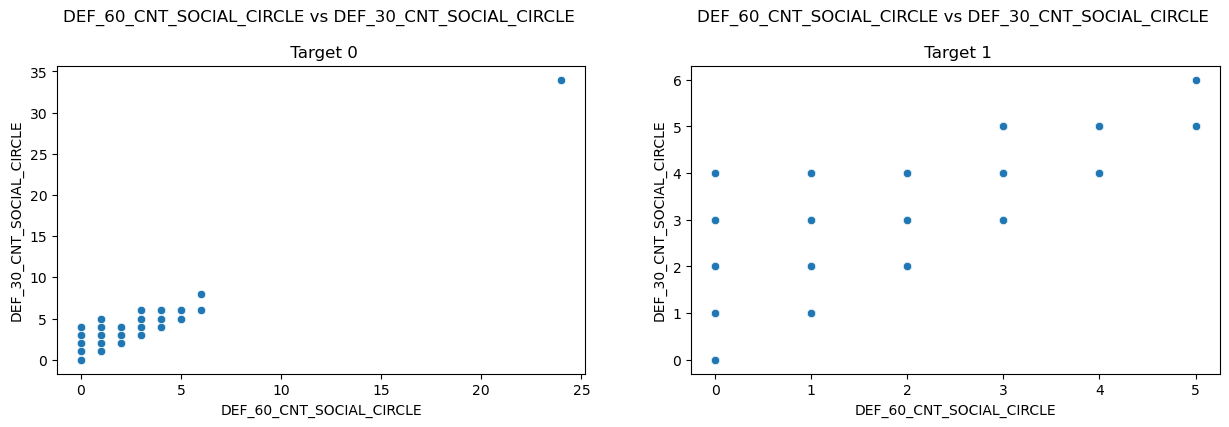

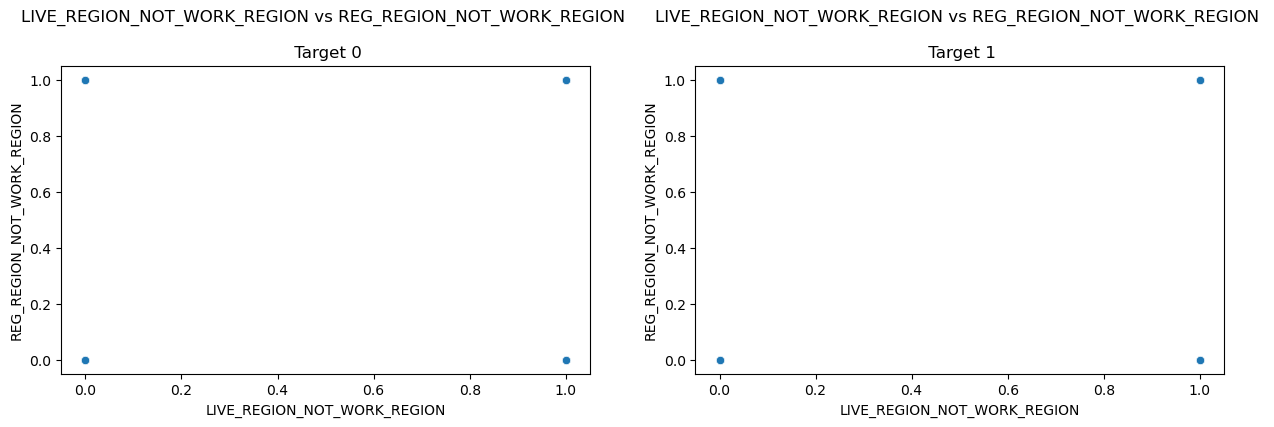

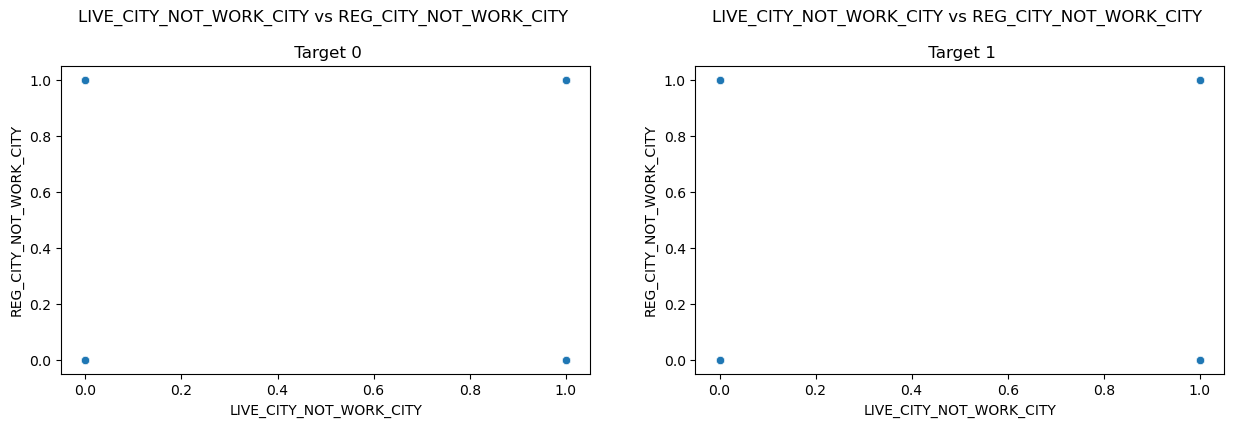

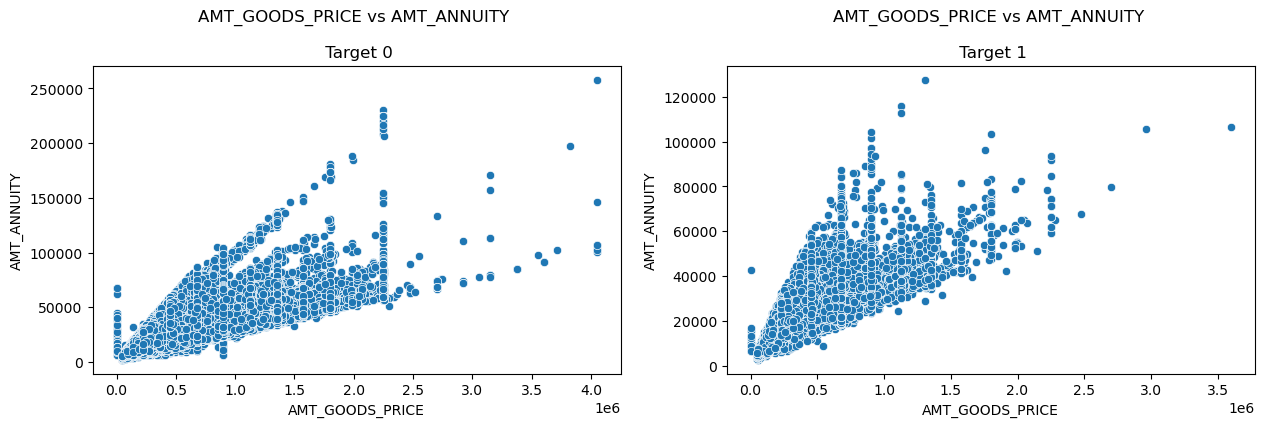

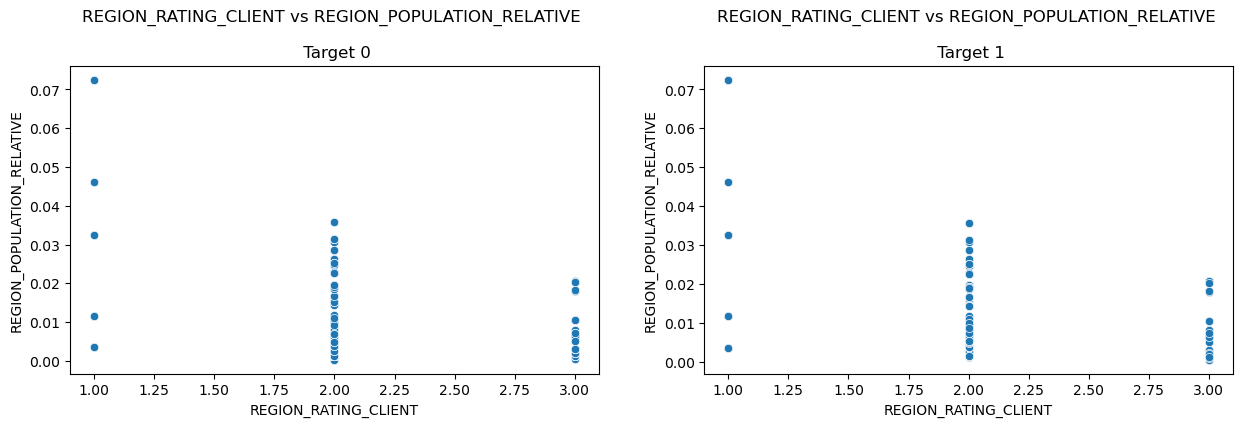

In [101]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
    sns.scatterplot(x=bivVar1[i], y=bivVar2[i], data=df_cat_0, ax=ax1)
    ax1.set_xlabel(bivVar1[i])
    ax1.set_ylabel(bivVar2[i])
    ax1.set_title(f'{bivVar1[i]} vs {bivVar2[i]} \n\n Target 0', fontsize=12)
    
    sns.scatterplot(x=bivVar1[i], y=bivVar2[i], data=df_cat_1, ax=ax2)
    ax2.set_xlabel(bivVar1[i])
    ax2.set_ylabel(bivVar2[i])
    ax2.set_title(f'{bivVar1[i]} vs {bivVar2[i]} \n\n Target 1', fontsize=12)
    
    plt.show()


#### **Few notable points**
    1. OBS_30_CNT_SOCIAL_CIRCLE',OBS_60_CNT_SOCIAL_CIRCLE' - denote the client's social surroundings with observable 30/60    DPD.
    These are definetly correlated. We can also see that its higher and steeper for Target 1, signyfying that in approval process this parameter must be strongly looked into.
    2.DEF_30_CNT_SOCIAL_CIRCLE - Trend is going up. But Target 1 has lesser data and hence graph is not dense.
    3. Years employed has an outlier value of 999 and this is skewing the graph
     4.AMT_CREDIt and AMT_GOOD PRICE dont seem to be increasing proportionately with AMT_INCOME for TARGET 1, thus possibly      leading to default

### Overview of Analysis on Continuous Variables

#### Key Insights from Bivariate Analysis of Continuous Variables:

1. **OBS_60_CNT_SOCIAL_CIRCLE vs OBS_30_CNT_SOCIAL_CIRCLE**:
   - **Observation**: These variables, representing the client's social surroundings with observable 60 and 30 days past due (DPD), are highly correlated.
   - **Insight**: The correlation is steeper for Target 1, indicating that applicants with higher observable social DPDs are more likely to default. This suggests the importance of these parameters in the loan approval process.

2. **AMT_GOODS_PRICE vs AMT_CREDIT**:
   - **Observation**: These financial amounts are strongly correlated, as expected.
   - **Insight**: There is a slight deviation for Target 1, suggesting that higher credit amounts do not always correspond to higher goods prices for defaulters. This discrepancy might be an indicator of over-lending relative to the value of purchased goods.

3. **REGION_RATING_CLIENT_W_CITY vs REGION_RATING_CLIENT**:
   - **Observation**: Both variables assess the client's regional rating.
   - **Insight**: The high correlation remains consistent across both targets, implying that regional rating factors are stable indicators regardless of default status.

4. **CNT_FAM_MEMBERS vs CNT_CHILDREN**:
   - **Observation**: These variables naturally correlate as more children typically increase family member counts.
   - **Insight**: The correlation is similarly high for both targets, indicating family size and children count are consistent factors but not necessarily strong indicators of default risk.

5. **DEF_60_CNT_SOCIAL_CIRCLE vs DEF_30_CNT_SOCIAL_CIRCLE**:
   - **Observation**: Both represent default rates within the client's social circle.
   - **Insight**: Higher values for Target 1 suggest that social defaults are more prevalent among defaulters. This highlights the significance of social behavior in assessing risk.

6. **LIVE_REGION_NOT_WORK_REGION vs REG_REGION_NOT_WORK_REGION**:
   - **Observation**: Both variables reflect discrepancies between living and working regions.
   - **Insight**: The correlation is high for both targets, suggesting that regional mobility is common among applicants but does not significantly differentiate defaulters.

7. **LIVE_CITY_NOT_WORK_CITY vs REG_CITY_NOT_WORK_CITY**:
   - **Observation**: Both variables indicate differences between residential and work cities.
   - **Insight**: The correlation is strong, especially for Target 1, indicating that applicants with discrepancies in their living and working cities might have a higher default risk.

8. **AMT_GOODS_PRICE vs AMT_ANNUITY**:
   - **Observation**: These variables are correlated as they both relate to loan amounts and repayment structures.
   - **Insight**: The correlation is slightly lower for Target 1, suggesting inconsistencies in the loan-to-annuity ratio among defaulters.

9. **AMT_ANNUITY vs AMT_CREDIT**:
   - **Observation**: Both are related to loan amounts and repayment terms.
   - **Insight**: The high correlation remains stable, indicating that annuity and credit amounts are proportionate across both targets.

10. **REGION_RATING_CLIENT vs REGION_POPULATION_RELATIVE**:
    - **Observation**: These variables represent regional factors and population density.
    - **Insight**: The correlation is moderate, suggesting regional factors moderately influence default risk but are not primary indicators.

### Conclusion:

The bivariate analysis of continuous variables reveals significant correlations that are consistent across non-default and default categories. Key variables such as social DPD counts, financial amounts, and regional factors are crucial in understanding default risk. These insights can guide the development of more precise risk assessment models and inform policies for loan approvals to mitigate default risks.

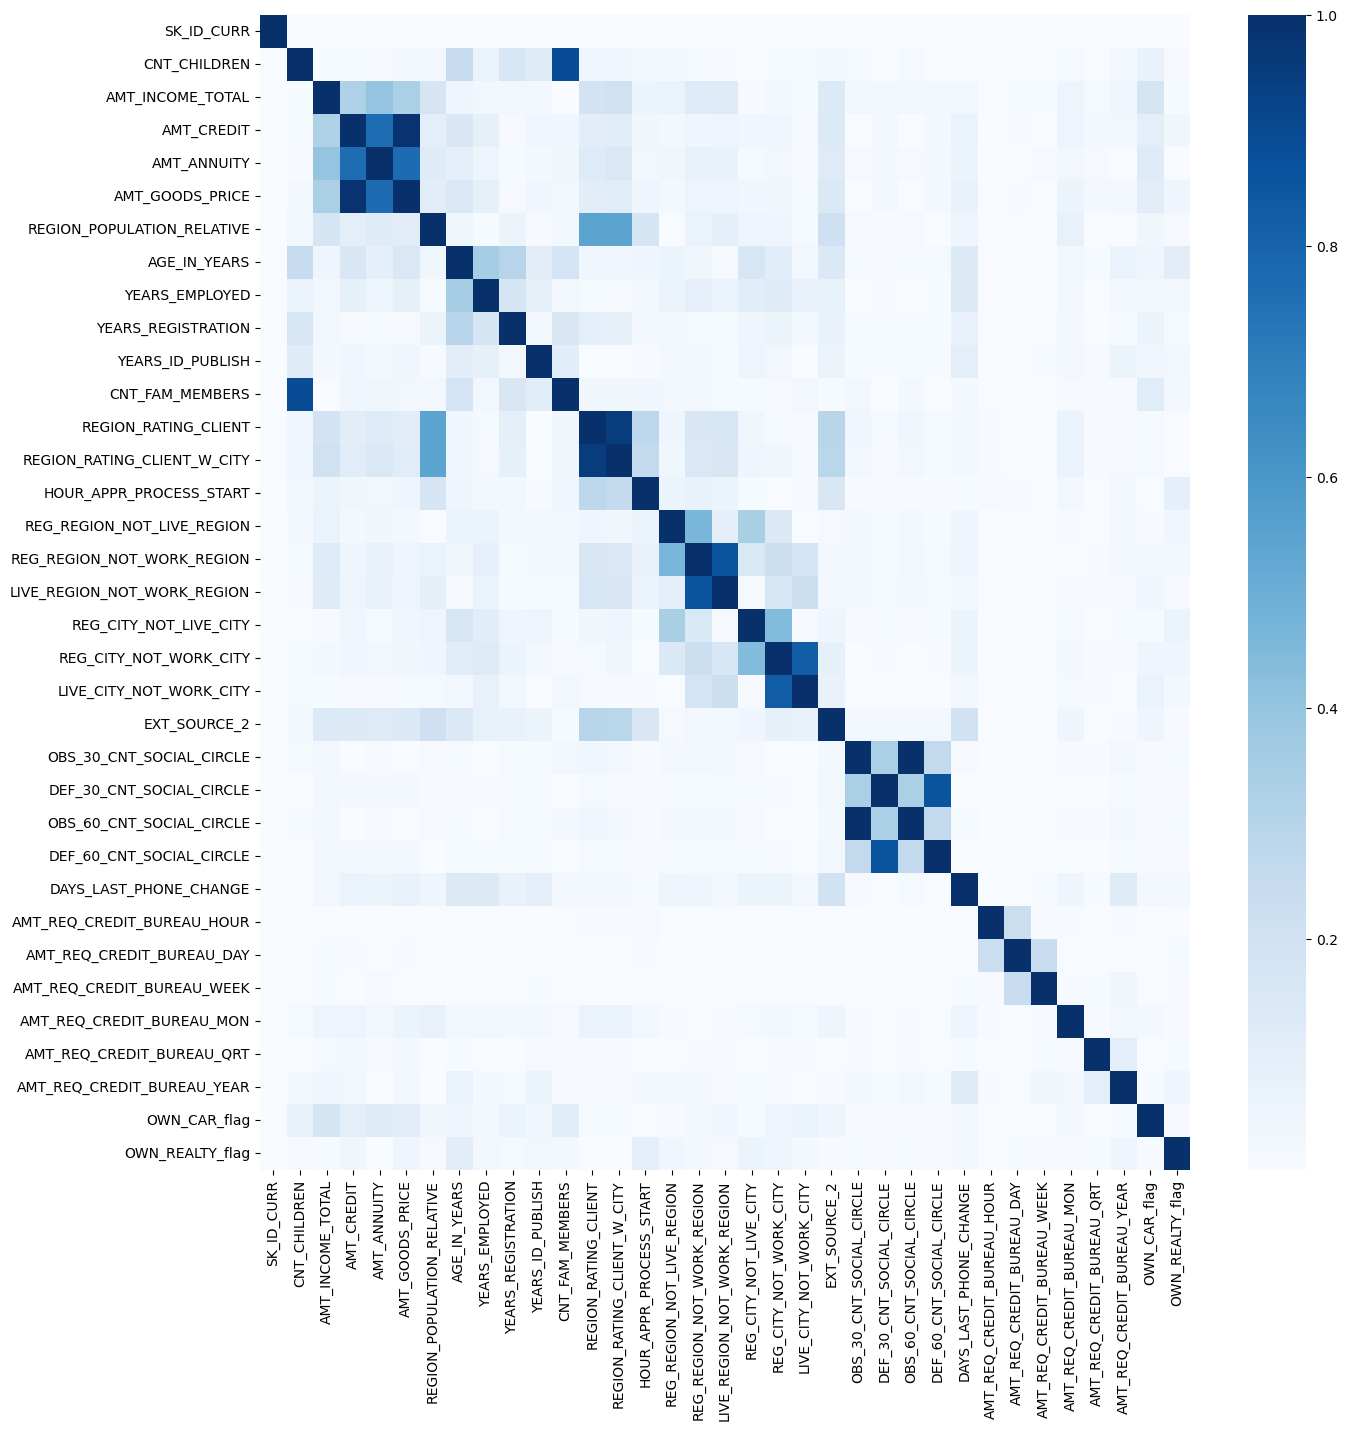

In [102]:
#Checking above analysis via heatmap

#df_num_0=df_cat_0[['TARGET']==0][numvarList]
plt.figure(figsize=(15,15))
sns.heatmap(correlation_cat_0, cmap='Blues')
plt.savefig('heatmap.png')
plt.show()

HeatMap says the same story of correlation in pictoral manner

<Figure size 1200x1000 with 0 Axes>

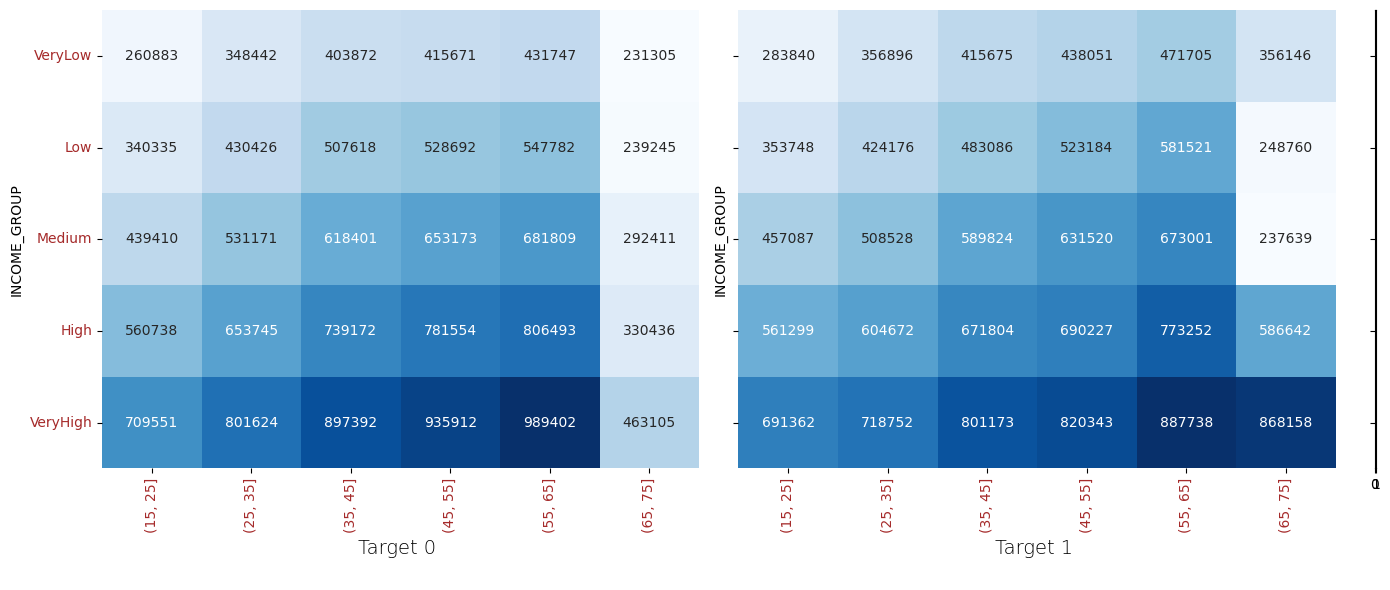

In [103]:

#Analysing relationship of AMT_CREDIT with AGE GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

res=pd.pivot_table(data=df_cat_0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

res1=pd.pivot_table(data=df_cat_1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)

c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10, color="Brown")

plt.tight_layout()
plt.savefig("6.png")
plt.show()

Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book

### Overview of AMT_CREDIT Analysis with AGE GROUP and INCOME GROUP

#### Key Insights from the Heatmap:

The heatmap analysis provides a visual representation of the average credit amount (`AMT_CREDIT`) across different age groups and income groups, separated by default status (Target 0 and Target 1).

1. **General Trends**:
   - **Higher Credit Amounts in Older Age Groups**: Both for Target 0 and Target 1, older age groups, especially the 55-65 age group, show higher average credit amounts.
   - **Income Group Influence**: Higher income groups consistently have higher average credit amounts across all age groups.

2. **Specific Observations**:
   - **Target 0 (Non-Defaults)**:
     - The 55-65 age group in the Very High income category has the highest average credit amount, indicating a significant portion of credit is allocated to older individuals with high incomes.
   - **Target 1 (Defaults)**:
     - Similar to Target 0, the 55-65 age group in the Very High income category also has high average credit amounts. This suggests that despite their high income, individuals in this age group may still default, potentially leading to substantial losses for the lending institution.

#### Implications:

1. **Risk Management for Older High-Income Borrowers**:
   - The high average credit amounts for the 55-65 age group in the Very High income category, especially among defaulters (Target 1), highlight a potential risk. Lending institutions should carefully assess the creditworthiness and repayment capacity of older high-income borrowers to mitigate potential losses.

2. **Tailored Credit Policies**:
   - The data suggests the need for differentiated credit policies that consider age and income together. Special attention should be given to older age groups with high credit amounts to ensure robust risk assessment and credit approval processes.

3. **Monitoring and Early Warning Systems**:
   - Implementing monitoring systems to track high-risk segments, such as older high-income borrowers, can help in early identification of potential defaults. Proactive measures, such as financial counseling or adjusted repayment plans, could be employed to reduce default rates.

### Conclusion:

The heatmap analysis of `AMT_CREDIT` across age and income groups reveals significant insights into the distribution of credit amounts and highlights potential risk areas. Specifically, the high credit amounts in the 55-65 age group within the Very High income category warrant attention for enhanced risk management strategies. These insights can guide lending institutions in refining their credit policies and risk assessment frameworks to better manage and mitigate potential defaults.

## <font color = red> Summary on Application dataframe
    
    
    
    

The comprehensive analysis of the application DataFrame involved examining various categorical and continuous variables to understand their relationships and impacts on loan defaults. Below is a detailed summary of the findings from the analysis:

#### 1. Age Group and Income Group Analysis:
- **Age Group**: The 35-45 age group is the most represented among non-defaulters (Target 0). However, the 25-35 age group has a higher proportion of defaulters (Target 1), indicating that younger individuals might have a higher default risk.
- **Income Group**: Both non-defaulters and defaulters are predominantly from the Medium income group. This suggests that income group alone may not be a strong indicator of default risk without considering other factors.

#### 2. Income Group and AMT_CREDIT Analysis:
- **Boxplot Analysis**: The amount credited (`AMT_CREDIT`) varies across income groups for both non-defaulters and defaulters. High and Very High income groups have higher credit amounts. For defaulters, the average credit amount is lower in higher income groups compared to non-defaulters, indicating that higher-income individuals might manage larger credits better, but when defaults occur, they are substantial.
- **Pivot Table Insights**: The average credit amount (`AMT_CREDIT`) is higher for higher income groups, especially for non-defaulters. However, defaulters in the Very High income group have significantly high credit amounts, which could impact the financial institution's loan book adversely if these defaults are not managed effectively.

#### 3. Education Type and AMT_CREDIT Analysis:
- **Boxplot Analysis**: Applicants with academic degrees tend to have higher median loan values, though their numbers are few. No strong inferences can be drawn from this due to the small sample size of academic degree holders.

#### 4. Gender and Income Type Analysis:
- **Pivot Table Analysis**: The relationship between `AMT_CREDIT`, gender, and income type shows that males in the Businessman category have higher average credit amounts compared to females. For defaulters, females on maternity leave have high credit amounts, highlighting a potential risk area.
- **Countplot Analysis**: Male applicants, though fewer in number, have a higher default ratio compared to female applicants. This suggests a gender-based differential in default risk that requires further investigation.

#### 5. Age Group and Family Status Analysis:
- **Countplot Analysis**: The relationship between age group and family status shows different patterns for non-defaulters and defaulters. For instance, older age groups (55-65) in Very High income groups have higher credit amounts, which could lead to significant losses if defaults occur.

#### 6. Correlation Analysis:
- **Top Correlations**: Key correlations include:
  - `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` (very high correlation), indicating that a client's social surroundings are closely related.
  - `AMT_GOODS_PRICE` and `AMT_CREDIT` (high correlation), suggesting that the goods price is strongly tied to the credit amount.
  - `CNT_FAM_MEMBERS` and `CNT_CHILDREN` (high correlation), showing a logical connection between family size and number of children.
- **Heatmap Analysis**: The heatmap visually confirmed these correlations, highlighting significant relationships among various numerical variables.

#### 7. Bivariate Analysis on Continuous Variables:
- **Scatterplots**: Scatterplots of the top correlated variables revealed trends and potential risk areas:
  - `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` are strongly correlated for both targets, with steeper trends for defaulters.
  - `AMT_CREDIT` and `AMT_GOODS_PRICE` showed proportional increases for non-defaulters, while defaulters had less proportional increases, indicating potential repayment issues.
  - `DEF_30_CNT_SOCIAL_CIRCLE` trends showed up, but the data was sparse for defaulters.

### Implications and Recommendations:
1. **Enhanced Risk Assessment**:
   - The higher default rates in younger age groups (25-35) and high credit amounts in older high-income groups (55-65) suggest the need for targeted risk assessment strategies.
   - Implementing stricter assessment criteria for high credit amounts, especially for older and higher-income applicants, could mitigate default risks.

2. **Gender-Specific Policies**:
   - The higher default ratio among male applicants indicates the necessity for gender-specific credit policies and risk management strategies.
   - Female applicants on maternity leave with high credit amounts should be monitored closely to prevent defaults.

3. **Social Circle Impact**:
   - The strong correlation between social circle observations (`OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE`) and defaults suggests that social surroundings should be a key factor in credit risk assessment.

4. **Tailored Loan Products**:
   - Based on the varied credit amounts across different education types and income groups, tailored loan products that cater to specific segments (e.g., academic degree holders, high-income older individuals) could be developed to better manage risks.

5. **Continuous Monitoring and Early Intervention**:
   - Continuous monitoring of high-risk segments, such as the 55-65 age group with high credit amounts, and early intervention strategies (e.g., financial counseling, adjusted repayment plans) could help reduce default rates and protect the financial institution’s loan book.

### Conclusion:
The detailed analysis of the application DataFrame highlights key insights into the relationships between various demographic, social, and financial factors and loan defaults. These insights can guide the development of more robust risk assessment frameworks and targeted credit policies to effectively manage and mitigate default risks.

### Now Clean the Previous Application Data

In [104]:
previous_data.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

### Check for How many rows and Columns in data set

In [105]:
previous_data.shape

(1670214, 37)

In [106]:
# Getting More info about the data set
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### Check for Null Values

In [107]:
previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Check the percentage of the null Value

In [108]:
previous_null_percentage = previous_data.isnull().sum()/len(previous_data)*100
previous_null_percentage

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [109]:
#As the DF is massive, deleting rows withy Null values for AMT_ANNUITY, AMT_GOODS_PRICE. We need these columns for 
#analysis as seen in application data frame and hence not deleting the columns

previous_data = previous_data.dropna(axis=0, subset=['AMT_ANNUITY'])
previous_data = previous_data.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
previous_data.isnull().sum()/len(previous_data)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [110]:
#Checking columns with >20% NULL values

print(previous_data.columns[(previous_data.isnull().sum() * 100 / previous_data.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [111]:
previous_data[(previous_data['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [112]:
previous_data[(previous_data['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DUE'].value_counts(dropna=True)

Series([], Name: count, dtype: int64)

In [113]:
#Dropping all >20 null value columns
dropcol=previous_data.columns[(previous_data.isnull().sum() * 100 / previous_data.shape[0]) > 20]
previous_data.drop(axis=1, columns=dropcol, inplace=True)
previous_data.shape

(1246320, 26)

In [114]:
#Checking columns with NULL values

previous_data.columns[(previous_data.isnull().sum()>0)]

Index([], dtype='object')

In [115]:
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.246320e+06     1.246320e+06             1.246320e+06   
mean   2.492727e+05     2.326240e+05             1.258250e+01   
std    3.465843e+05     3.186729e+05             3.326113e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.157450e+04     5.220000e+04             1.000000e+01   
50%    1.161675e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.246320e+06   1.246320e+06      1.246320e+06  1.246320e+06  
mean             9.978914e-01  -1.021855e+03      4.056201e+02  1.671954e+01  
std              4.587116e-02   7.864511e+02      8.246103e+03  1.448712e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.534000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -7.660000e+02      2.700000e+01  1.200000e+01  
75%              1.000000e+00  -3.850000e+02      1.460000e+02  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [116]:
#deleting some additional numerical var columns as we do not intend to use them for analysis and they dont seem relevant too

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
previous_data.drop(axis=1, columns=dropcol, inplace=True)
previous_data.shape

(1246320, 22)

In [117]:
# Analysing values of object variable
for i in previous_data.columns:
    if previous_data[i].dtypes=="object":
        print(previous_data[i].value_counts(normalize=True, dropna= False))
        print('\n\n')

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64



WEEKDAY_APPR_PROCESS_START
SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: proportion, dtype: float64



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64



NAME_CASH_LOAN_PURPOSE
XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                           

### Deleting columns not needed for analysis 
    WEEKDAY_APPR_PROCESS_START -Not relevant
    NAME_PRODUCT_TYPE -55% XNA values
    NAME_CASH_LOAN_PURPOSE - 90% NNA / XAP values, 
    NAME_GOODS_CATEGORY - hIGH XNA values
    NAME_PAYMENT_TYPE - 19% XAP values
    CODE_REJECT_REASON - 80% XAP values

In [118]:
# Deleting columns mentioned above
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
previous_data.drop(axis=1, columns=dropcol, inplace=True)
previous_data.shape

(1246320, 16)

## Analysis of the Previous Application Data

### Overview
The previous application dataset consists of 1,670,214 rows and 37 columns, providing detailed information about each loan application. This includes the application type, amounts, processing details, client information, and loan statuses.

### Initial Data Exploration
The initial examination of the dataset revealed significant null values in several columns, prompting a decision to remove columns with more than 80% missing data. This process reduced the dataset to 23 columns.

### Data Columns and Missing Values
After cleaning, the remaining columns and their respective missing value percentages are:

- `SK_ID_PREV`: 0.000%
- `SK_ID_CURR`: 0.000%
- `NAME_CONTRACT_TYPE`: 0.000%
- `AMT_APPLICATION`: 0.000%
- `AMT_CREDIT`: 0.000060%
- `WEEKDAY_APPR_PROCESS_START`: 0.000%
- `HOUR_APPR_PROCESS_START`: 0.000%
- `FLAG_LAST_APPL_PER_CONTRACT`: 0.000%
- `NFLAG_LAST_APPL_IN_DAY`: 0.000%
- `NAME_CASH_LOAN_PURPOSE`: 0.000%
- `NAME_CONTRACT_STATUS`: 0.000%
- `DAYS_DECISION`: 0.000%
- `NAME_PAYMENT_TYPE`: 0.000%
- `CODE_REJECT_REASON`: 0.000%
- `NAME_CLIENT_TYPE`: 0.000%
- `NAME_GOODS_CATEGORY`: 0.000%
- `NAME_PORTFOLIO`: 0.000%
- `NAME_PRODUCT_TYPE`: 0.000%
- `CHANNEL_TYPE`: 0.000%
- `SELLERPLACE_AREA`: 0.000%
- `NAME_SELLER_INDUSTRY`: 0.000%
- `NAME_YIELD_GROUP`: 0.000%
- `PRODUCT_COMBINATION`: 0.020716%

### Categorical Data Analysis
For categorical variables, the value distribution is as follows:

1. **NAME_CONTRACT_TYPE**:
   - Cash loans: 44.76%
   - Consumer loans: 43.66%
   - Revolving loans: 11.57%
   - XNA: 0.02%

2. **WEEKDAY_APPR_PROCESS_START**:
   - Distribution shows a fairly even spread across weekdays, with Tuesday (15.27%) and Wednesday (15.27%) being the highest.

3. **FLAG_LAST_APPL_PER_CONTRACT**:
   - Y: 99.49%
   - N: 0.51%

4. **NAME_CASH_LOAN_PURPOSE**:
   - The majority are XAP (55.24%) and XNA (40.59%), with a small fraction distributed among various specific purposes like Repairs (1.42%) and Urgent needs (0.50%).

5. **NAME_CONTRACT_STATUS**:
   - Approved: 62.07%
   - Canceled: 18.94%
   - Refused: 17.40%
   - Unused offer: 1.58%

6. **NAME_PAYMENT_TYPE**:
   - Cash through the bank: 61.88%
   - XNA: 37.56%
   - Non-cash from your account: 0.49%
   - Cashless from the account of the employer: 0.07%

7. **CODE_REJECT_REASON**:
   - XAP: 81.01%
   - HC: 10.49%
   - LIMIT: 3.33%
   - Others: Less than 2% each

8. **NAME_CLIENT_TYPE**:
   - Repeater: 73.72%
   - New: 18.04%
   - Refreshed: 8.12%
   - XNA: 0.12%

9. **NAME_GOODS_CATEGORY**:
   - XNA: 56.93%
   - Mobile: 13.45%
   - Consumer Electronics: 7.28%
   - Others: Less than 7% each

10. **NAME_PORTFOLIO**:
    - POS: 41.37%
    - Cash: 27.64%
    - XNA: 22.29%
    - Others: Less than 10% each

11. **NAME_PRODUCT_TYPE**:
    - XNA: 63.68%
    - x-sell: 27.32%
    - walk-in: 8.99%

12. **CHANNEL_TYPE**:
    - Credit and cash offices: 43.11%
    - Country-wide: 29.62%
    - Stone: 12.70%
    - Others: Less than 10% each

13. **NAME_SELLER_INDUSTRY**:
    - XNA: 51.23%
    - Consumer electronics: 23.85%
    - Connectivity: 16.53%
    - Others: Less than 4% each

14. **NAME_YIELD_GROUP**:
    - XNA: 30.97%
    - middle: 23.08%
    - high: 21.15%
    - Others: Less than 20% each

15. **PRODUCT_COMBINATION**:
    - Cash: 17.12%
    - POS household with interest: 15.78%
    - POS mobile with interest: 13.21%
    - Others: Less than 10% each

### Conclusion
The dataset contains a significant number of missing values, which required the removal of several columns with more than 80% missing data. After cleaning, the remaining data provides a comprehensive view of loan applications, including types of contracts, reasons for loans, and loan statuses. The categorical data reveals that a substantial portion of applications is for cash loans and consumer loans, with a high approval rate. Most clients are repeat applicants, and the majority of loans are processed through cash transactions or credit and cash offices. The data is now cleaner and ready for further analysis or modeling.

## <font color=blue> Univariate Analysis
### Categorical Nominal

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64


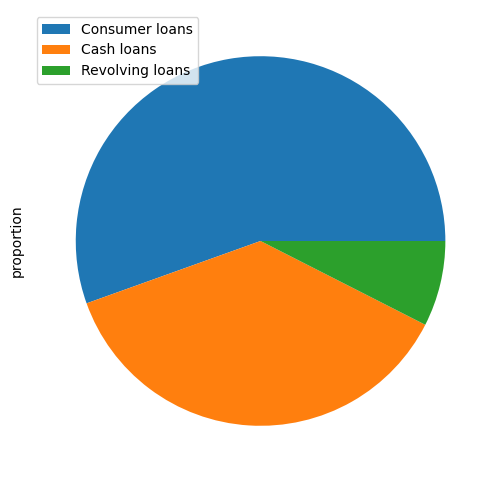



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64


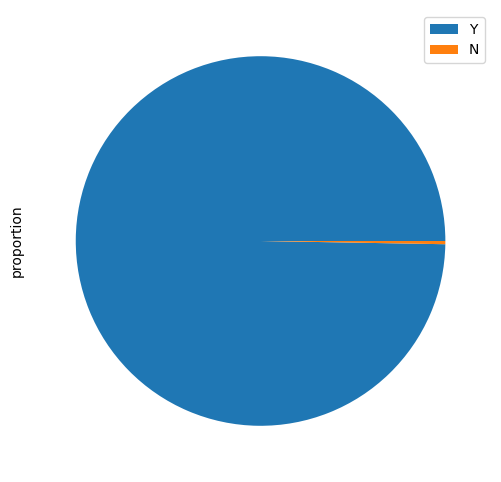



NAME_CONTRACT_STATUS
Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: proportion, dtype: float64


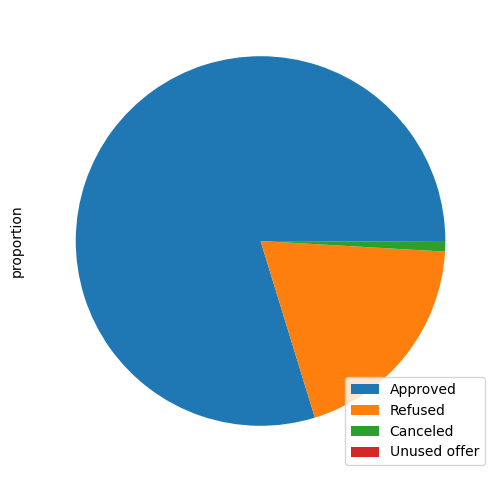



NAME_CLIENT_TYPE
Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: proportion, dtype: float64


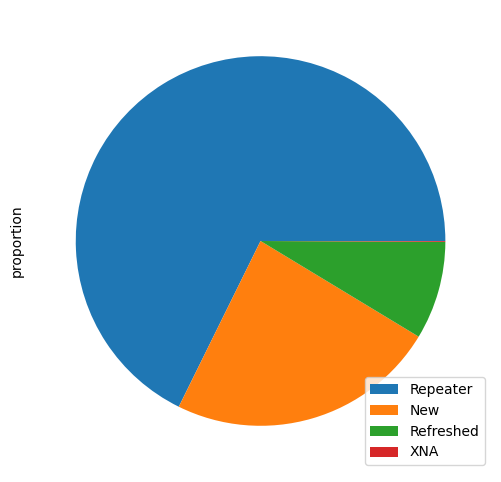



NAME_PORTFOLIO
POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: proportion, dtype: float64


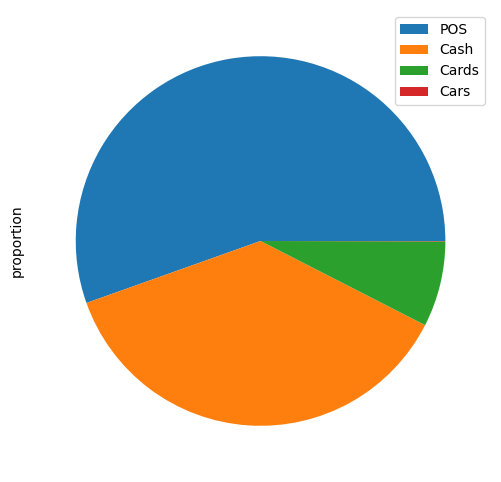



CHANNEL_TYPE
Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: proportion, dtype: float64


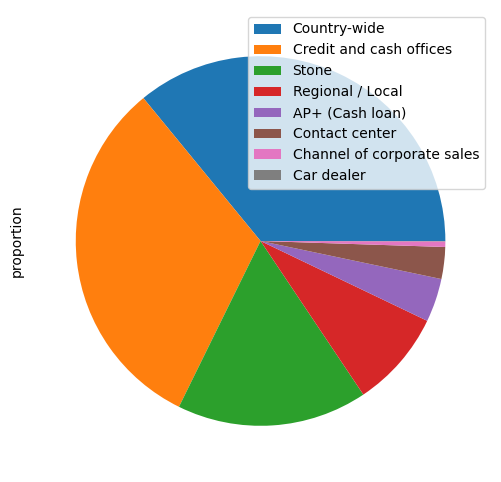



NAME_SELLER_INDUSTRY
XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: proportion, dtype: float64


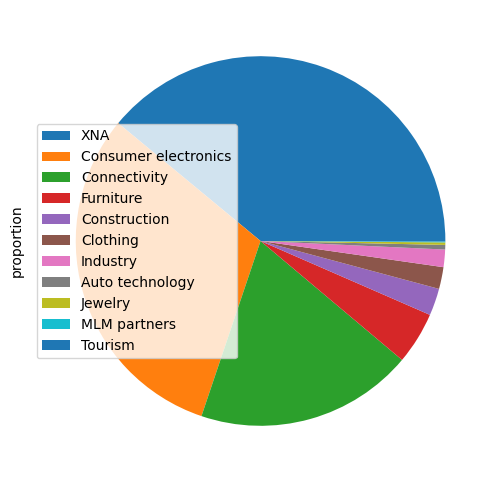



NAME_YIELD_GROUP
middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: proportion, dtype: float64


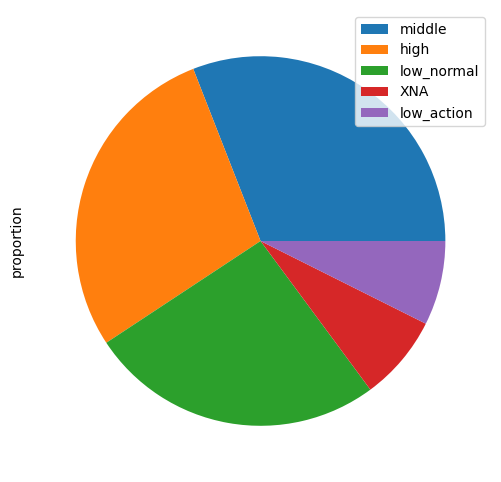



PRODUCT_COMBINATION
POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: proportion, dtype: float64


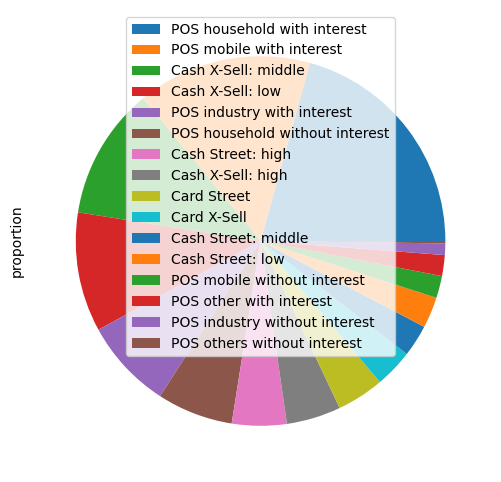

In [119]:
#Checking all object types Variables and their values
for i in previous_data.columns:
    if previous_data[i].dtypes=="object":
        print(previous_data[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        previous_data[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")
        
                
        

##### **Few notable points**
    1. This dataframe has a differnt type of loan called Consumer Loan, which was not there in Application data frame. 55% of loans are consumer loans. 37% cash loans and rest revolving
    2. Approved loans are 79% and refused, cancelled, unused - rest. **IMBALANCE IN DATA**
    3. 67% are repeaters. NAME_CLIENT_TYPE also has some null values showing as XNA
    4. 55% of the applicants have taken loan for POS purchase.
    5. Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%



### Univariate Analysis of Categorical Nominal Variables


The univariate analysis of categorical nominal variables in the provided dataset reveals several key insights. Below is a detailed summary of the observations along with notable points.

#### Detailed Observations

1. **Loan Types**:
   - The dataset includes a distinct type of loan called "Consumer Loan," which was not present in the Application data frame.
   - Distribution of loan types:
     - **Consumer Loan**: 55%
     - **Cash Loans**: 37%
     - **Revolving Loans**: 8%

2. **Loan Status**:
   - The distribution of loan statuses indicates a significant imbalance in the dataset.
   - Distribution of loan statuses:
     - **Approved Loans**: 79%
     - **Refused, Cancelled, Unused**: 21%

3. **Client Type**:
   - The dataset shows a majority of repeat borrowers.
   - Distribution of client types:
     - **Repeaters**: 67%
     - **New Clients**: 33%
   - There are some null values in the `NAME_CLIENT_TYPE` column, marked as "XNA."

4. **Loan Purpose**:
   - A significant proportion of applicants have taken loans for POS (Point of Sale) purchases.
   - Distribution of loan purposes:
     - **POS Purchases**: 55%
     - Other purposes: 45%

5. **Seller Industry**:
   - The `NAME_SELLER_INDUSTRY` column has a high proportion of null values marked as "XNA."
   - Distribution of seller industries:
     - **XNA**: 37%
     - **Consumer Electronics**: 30%
     - Other industries: 33%

#### Notable Points

1. **Imbalance in Loan Types**:
   - The presence of a high proportion of Consumer Loans (55%) and the absence of this type in the Application data frame suggests a difference in the nature or purpose of the loans between the two datasets.

2. **Imbalance in Loan Status**:
   - The approval rate of loans is notably high (79%), indicating a potential imbalance in the dataset. This imbalance may affect the analysis and model performance if not addressed.

3. **Client Type Null Values**:
   - The presence of null values in `NAME_CLIENT_TYPE` marked as "XNA" suggests missing or unclassified data. This should be addressed during data preprocessing.

4. **Loan Purpose Concentration**:
   - The high percentage of loans taken for POS purchases (55%) highlights a significant concentration in this loan purpose. This could be an important feature for further analysis.

5. **High Proportion of Null Values in Seller Industry**:
   - The `NAME_SELLER_INDUSTRY` column has a substantial amount of missing data (37% XNA). This could affect any analysis involving the seller industry and should be handled appropriately.

These insights provide a foundational understanding of the distribution of categorical nominal variables in the dataset and highlight areas that may require special attention during further analysis and preprocessing.

### Numerical Variable

In [120]:
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  
count  1.246320e+06     1.246320e+06  1.246320e+06  
mean   2.492727e+05     2.326240e+05  1.671954e+01  
std    3.465843e+05     3.186729e+05  1.448712e+01  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    5.157450e+04     5.220000e+04  6.000000e+00  
50%    1.161675e+05     1.125000e+05  1.200000e+01  
75%    2.700000e+05     2.475000e+05  2.400000e+01  
max    4.509688e+06     5.850000e+06  8.400000e+01

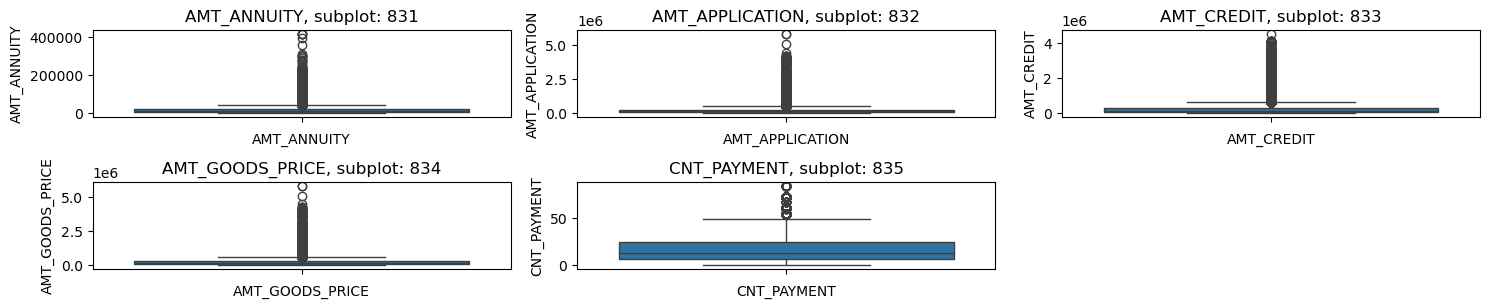

In [138]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in previous_data.columns:
    if previous_data[i].dtypes=="float64" or previous_data[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(previous_data[i])
        c = c + 1

fig.tight_layout()
plt.savefig("8.png")
plt.show()

Continuous Variables seem to have high percentage of outliers. Checking distribution

### Univariate Analysis of Numerical Variables

#### Overview

The univariate analysis of the numerical variables in the dataset reveals significant insights, particularly highlighting the presence of outliers in the continuous variables. Below is a summary of the descriptive statistics and graphical analysis.

#### Descriptive Statistics Summary

- **SK_ID_PREV and SK_ID_CURR**:
  - Unique identifiers for previous and current applications, respectively. Both have a large range of values with a mean of approximately 1.92 million for `SK_ID_PREV` and 278,357 for `SK_ID_CURR`.

- **Loan Amounts**:
  - **AMT_ANNUITY**: Mean of 15,955 with a standard deviation of 14,782.
  - **AMT_APPLICATION**: Mean of 175,233 with a standard deviation of 292,780.
  - **AMT_CREDIT**: Mean of 196,114 with a standard deviation of 318,575.
  - **AMT_DOWN_PAYMENT**: Mean of 6,697 with a standard deviation of 20,921.
  - **AMT_GOODS_PRICE**: Mean of 227,847 with a standard deviation of 315,397.

- **Interest Rates**:
  - **RATE_DOWN_PAYMENT**: Mean of 0.0796 with a standard deviation of 0.1078.
  - **RATE_INTEREST_PRIMARY**: Mean of 0.1884 with a standard deviation of 0.0877.
  - **RATE_INTEREST_PRIVILEGED**: Mean of 0.7735 with a standard deviation of 0.1009.

- **Payment Counts and Days**:
  - **CNT_PAYMENT**: Mean of 16.05 with a standard deviation of 14.57.
  - **DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION**: All show a wide range of values with significant standard deviations, reflecting variability in loan repayment schedules.

- **Insurance Flag**:
  - **NFLAG_INSURED_ON_APPROVAL**: Mean of 0.3326, indicating that approximately 33.26% of loans were insured upon approval.

#### Graphical Analysis Summary

The boxplots for continuous numerical variables indicate a high percentage of outliers across various columns. This is evident from the presence of many data points outside the whiskers of the boxplots. 

**Key Observations**:
1. **Loan Amounts**: The variables `AMT_ANNUITY`, `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_DOWN_PAYMENT`, and `AMT_GOODS_PRICE` all show a large spread of values with numerous outliers, indicating high variability and the presence of extreme values.
   
2. **Interest Rates**: Both `RATE_DOWN_PAYMENT` and `RATE_INTEREST_PRIMARY` show variability but with fewer outliers compared to loan amounts. `RATE_INTEREST_PRIVILEGED` has a narrower spread but still shows some outliers.
   
3. **Payment Counts and Days**: The variables related to payment counts (`CNT_PAYMENT`) and the various `DAYS_*` variables exhibit a wide range of values, indicating significant differences in loan repayment periods and schedules. Outliers are present, suggesting some loans have particularly unique repayment timelines.

4. **Insurance Flag**: The variable `NFLAG_INSURED_ON_APPROVAL` is binary with values of 0 or 1, so it does not have outliers in the traditional sense but indicates the proportion of insured loans.

#### Notable Points

1. **High Percentage of Outliers**: The presence of a large number of outliers in continuous variables suggests the need for careful handling during data preprocessing. Techniques such as transformation, normalization, or robust statistical methods may be necessary to mitigate their impact on analysis and modeling.

2. **Variability in Loan Amounts and Repayment Schedules**: The significant variability in loan amounts and repayment schedules reflects diverse loan products and customer profiles. This diversity should be considered when developing predictive models or conducting further analysis.

3. **Insurance Coverage**: The relatively low mean value for `NFLAG_INSURED_ON_APPROVAL` indicates that a smaller proportion of loans are insured upon approval, which could be an important factor in assessing loan risk.

These insights provide a comprehensive understanding of the numerical variables' distribution and highlight areas requiring special attention during further analysis and preprocessing.

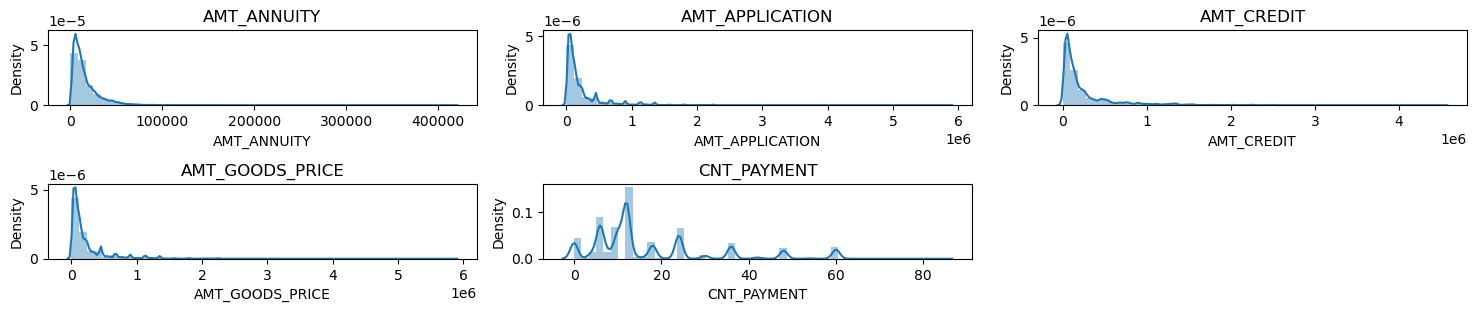

In [139]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in previous_data.columns:
    if previous_data[i].dtypes=="float64" or previous_data[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=previous_data[i])
        c = c + 1

fig.tight_layout()
plt.savefig("9.png")
plt.show()

##### **Few notable points**
    Continuous Variables seem to have high percentage of outliers. Box plot and distribution both signify the same.

### Overview of Continuous Variables and Outlier Analysis

The univariate analysis of continuous numerical variables in the dataset reveals several important insights, especially concerning the presence of outliers. Below is a summary of the findings from the descriptive statistics and graphical analysis.

#### Key Findings

1. **High Percentage of Outliers**:
   - Both the box plots and distribution plots indicate a significant presence of outliers across multiple continuous variables. This highlights the need for careful handling of these outliers to ensure robust and accurate analysis.

2. **Descriptive Statistics**:
   - Variables such as `AMT_ANNUITY`, `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_DOWN_PAYMENT`, and `AMT_GOODS_PRICE` exhibit large spreads and high standard deviations, reflecting considerable variability in loan amounts.
   - Interest rates (`RATE_DOWN_PAYMENT`, `RATE_INTEREST_PRIMARY`, `RATE_INTEREST_PRIVILEGED`) also show variability, with fewer outliers compared to loan amounts.
   - Payment counts (`CNT_PAYMENT`) and variables related to payment schedules (`DAYS_*`) demonstrate wide ranges and significant variability.

#### Notable Points from Distribution Plots

- **Distribution Shape**:
  - The distribution plots for most continuous variables show skewness and the presence of extreme values. This further supports the observations made from the box plots.

- **Outlier Treatment**:
  - **Transformation**: Applying log transformation or other non-linear transformations can reduce skewness and minimize the impact of outliers.
  - **Normalization**: Scaling the data using techniques such as min-max scaling or standardization can help manage the effects of outliers.
  - **Robust Statistical Methods**: Employing methods that are less sensitive to outliers, such as robust regression or using median instead of mean, can provide more reliable results.
  - **Capping/Flooring**: Limiting the extreme values by capping at a certain percentile (e.g., 1st and 99th percentiles) can reduce the influence of outliers.

#### Conclusion

The analysis indicates that outliers are a significant feature of the continuous variables in this dataset. Properly addressing these outliers through appropriate preprocessing steps is crucial for building effective predictive models and conducting reliable statistical analyses. This will help ensure that the results are not unduly influenced by extreme values, leading to more accurate and generalizable insights.

### Outlier & Possible Treatment

In [123]:
#using zscore to find out Outliers (>97%)

for i in previous_data.columns:
    if previous_data[i].dtypes=="float64" or previous_data[i].dtypes=="float32":
        print( i, ":", end= " ")
        print(previous_data.iloc[np.where(np.abs(ss.zscore(previous_data[i])>2))].shape, end=" ")
        print("Percentage of Outlier rows: ", round((previous_data.iloc[np.where(np.abs(ss.zscore(previous_data[i])>2))].shape[0]/previous_data.shape[0]*100), 2))          

AMT_ANNUITY : (61959, 16) Percentage of Outlier rows:  4.97
AMT_APPLICATION : (75698, 16) Percentage of Outlier rows:  6.07
AMT_CREDIT : (69957, 16) Percentage of Outlier rows:  5.61
AMT_GOODS_PRICE : (75714, 16) Percentage of Outlier rows:  6.08
CNT_PAYMENT : (103224, 16) Percentage of Outlier rows:  8.28


These rows can be deleted considering the size of DF. Not doing so, as it is not in scope of the project

## <font color=blue> Bivariate Analysis

### Categorical Variable

In [124]:
#checking the dataframe 
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0          17145.0                           Y   
1    679671.0         607500.0                           Y   
2    136444.5         112500.0                           Y   
3    470790.0         450000.0                           Y   
4    404055.0         337500.0                           Y   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved         Repeater            POS   
1             Approved         Repeater           Cash   
2             Approved         Repeater           Cash   
3             Approved         Repeater           Cash   
4              Refused         Repeater           Cash   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide         Connectivity         12.0           middle   
1           Contact center                  XNA         36.0       low_action   
2  Credit and cash offices                  XNA         12.0             high   
3  Credit and cash offices                  XNA         12.0           middle   
4  Credit and cash offices                  XNA         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

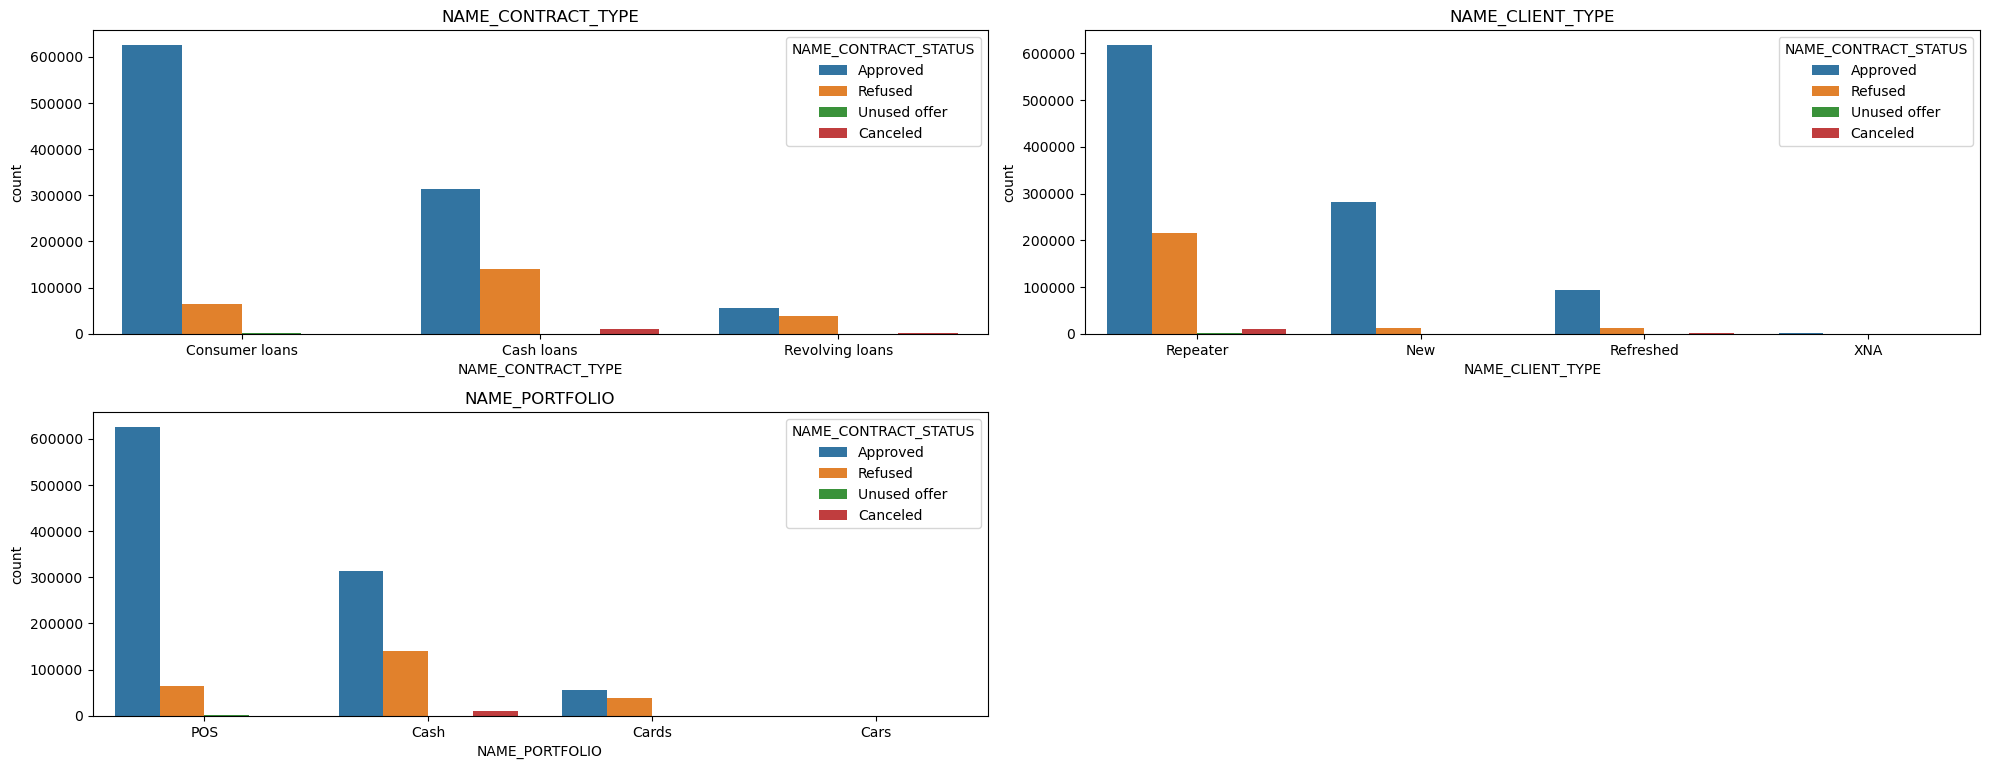

In [140]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=previous_data, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.savefig("20.png")
plt.show()


##### **Few notable points**
    1. In approved category, consumer loan has largest no of applicants. 
    2. There seem to be no cancelled loans in cash loan category than consumer loan.
    3. More cash loans have been refused than consumer loans.
    4. The bank has more repeaters in all approved, refused, unused, cancelled categories
    5. POS transactions seem to be consumer loans and similar to point 2 - more cash laons have been refused than POS.

Categorical variable
In the bivariate analysis of categorical variables, I focused on understanding the relationships between different categorical features and the `NAME_CONTRACT_STATUS` variable, which indicates the status of the loan application. The analysis involved plotting the count of loan statuses across various categories, including contract type, client type, and portfolio type. Here are the key findings:

#### Key Findings

1. **Contract Type vs. Contract Status**:
   - Consumer loans have the largest number of approved applicants, indicating a higher approval rate compared to other loan types.
   - Cash loans, on the other hand, exhibit a higher number of refusals compared to consumer loans. This suggests stricter approval criteria or higher risk associated with cash loans.
   - There are no cancelled loans in the cash loan category, which might indicate different handling or categorization of cancelled loans between consumer and cash loans.

2. **Client Type vs. Contract Status**:
   - The majority of applicants in all categories (approved, refused, unused, and cancelled) are repeaters. This indicates that repeat customers form a significant portion of the bank’s client base and are more likely to reapply for loans.
   - The presence of repeaters in all categories also highlights the potential loyalty or dependency of these clients on the bank’s services.

3. **Portfolio Type vs. Contract Status**:
   - POS (Point of Sale) transactions are predominantly consumer loans, aligning with the nature of these transactions where immediate consumer financing is required.
   - Similar to the overall trend, more cash loans have been refused compared to POS loans. This further emphasizes the stricter criteria or higher risk perception associated with cash loans.

#### Graphical Insights

- **NAME_CONTRACT_TYPE**:
  - The distribution of loan statuses across different contract types shows clear patterns, with consumer loans being the most frequently approved.
- **NAME_CLIENT_TYPE**:
  - The dominance of repeaters across all loan statuses is visually apparent, highlighting their significance in the bank’s loan portfolio.
- **NAME_PORTFOLIO**:
  - The distinct difference in refusal rates between cash loans and POS loans is clearly depicted, supporting the conclusion about varying risk assessments for different loan types.

### Conclusion

The bivariate analysis of categorical variables reveals significant insights into the patterns and trends in loan application statuses. Consumer loans, especially for repeat customers, have higher approval rates, while cash loans face more refusals. POS transactions are predominantly consumer loans and follow similar approval trends. These findings suggest potential areas for the bank to review its loan approval criteria and risk assessment processes, especially for cash loans.

## <font color = blue> Top Correlations

In [126]:
# Drop non-numeric columns and IDs
df_corr_prev = previous_data.drop(columns=['SK_ID_CURR', 'SK_ID_PREV'])

# Select only numeric columns
df_corr_prev_numeric = df_corr_prev.select_dtypes(include=['number'])

# Calculate the absolute correlation matrix
correlation = df_corr_prev_numeric.corr().abs()

# Display the correlation matrix
print(correlation)

                 AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
AMT_ANNUITY         1.000000         0.820831    0.814884         0.820895   
AMT_APPLICATION     0.820831         1.000000    0.992965         0.999883   
AMT_CREDIT          0.814884         0.992965    1.000000         0.993028   
AMT_GOODS_PRICE     0.820895         0.999883    0.993028         1.000000   
CNT_PAYMENT         0.401020         0.672276    0.700323         0.672129   

                 CNT_PAYMENT  
AMT_ANNUITY         0.401020  
AMT_APPLICATION     0.672276  
AMT_CREDIT          0.700323  
AMT_GOODS_PRICE     0.672129  
CNT_PAYMENT         1.000000  


In [127]:
# Compute the upper triangle of the correlation matrix
upper_triangle = np.triu(np.ones(correlation.shape), k=1).astype(bool)

# Mask the lower triangle and the diagonal
corr_prev = correlation.where(upper_triangle).unstack().reset_index()

# Rename the columns
corr_prev.columns = ['Column1', 'Column2', 'Correlation']

# Drop rows with NaN correlation values
corr_prev.dropna(subset=['Correlation'], inplace=True)

# Sort the DataFrame by correlation values in descending order
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

# Display the top correlations
print(corr_prev)


            Column1          Column2  Correlation
16  AMT_GOODS_PRICE  AMT_APPLICATION     0.999883
17  AMT_GOODS_PRICE       AMT_CREDIT     0.993028
11       AMT_CREDIT  AMT_APPLICATION     0.992965
15  AMT_GOODS_PRICE      AMT_ANNUITY     0.820895
5   AMT_APPLICATION      AMT_ANNUITY     0.820831
10       AMT_CREDIT      AMT_ANNUITY     0.814884
22      CNT_PAYMENT       AMT_CREDIT     0.700323
21      CNT_PAYMENT  AMT_APPLICATION     0.672276
23      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129
20      CNT_PAYMENT      AMT_ANNUITY     0.401020


In [128]:
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0          17145.0                           Y   
1    679671.0         607500.0                           Y   
2    136444.5         112500.0                           Y   
3    470790.0         450000.0                           Y   
4    404055.0         337500.0                           Y   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved         Repeater            POS   
1             Approved         Repeater           Cash   
2             Approved         Repeater           Cash   
3             Approved         Repeater           Cash   
4              Refused         Repeater           Cash   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide         Connectivity         12.0           middle   
1           Contact center                  XNA         36.0       low_action   
2  Credit and cash offices                  XNA         12.0             high   
3  Credit and cash offices                  XNA         12.0           middle   
4  Credit and cash offices                  XNA         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

<Figure size 2000x800 with 0 Axes>

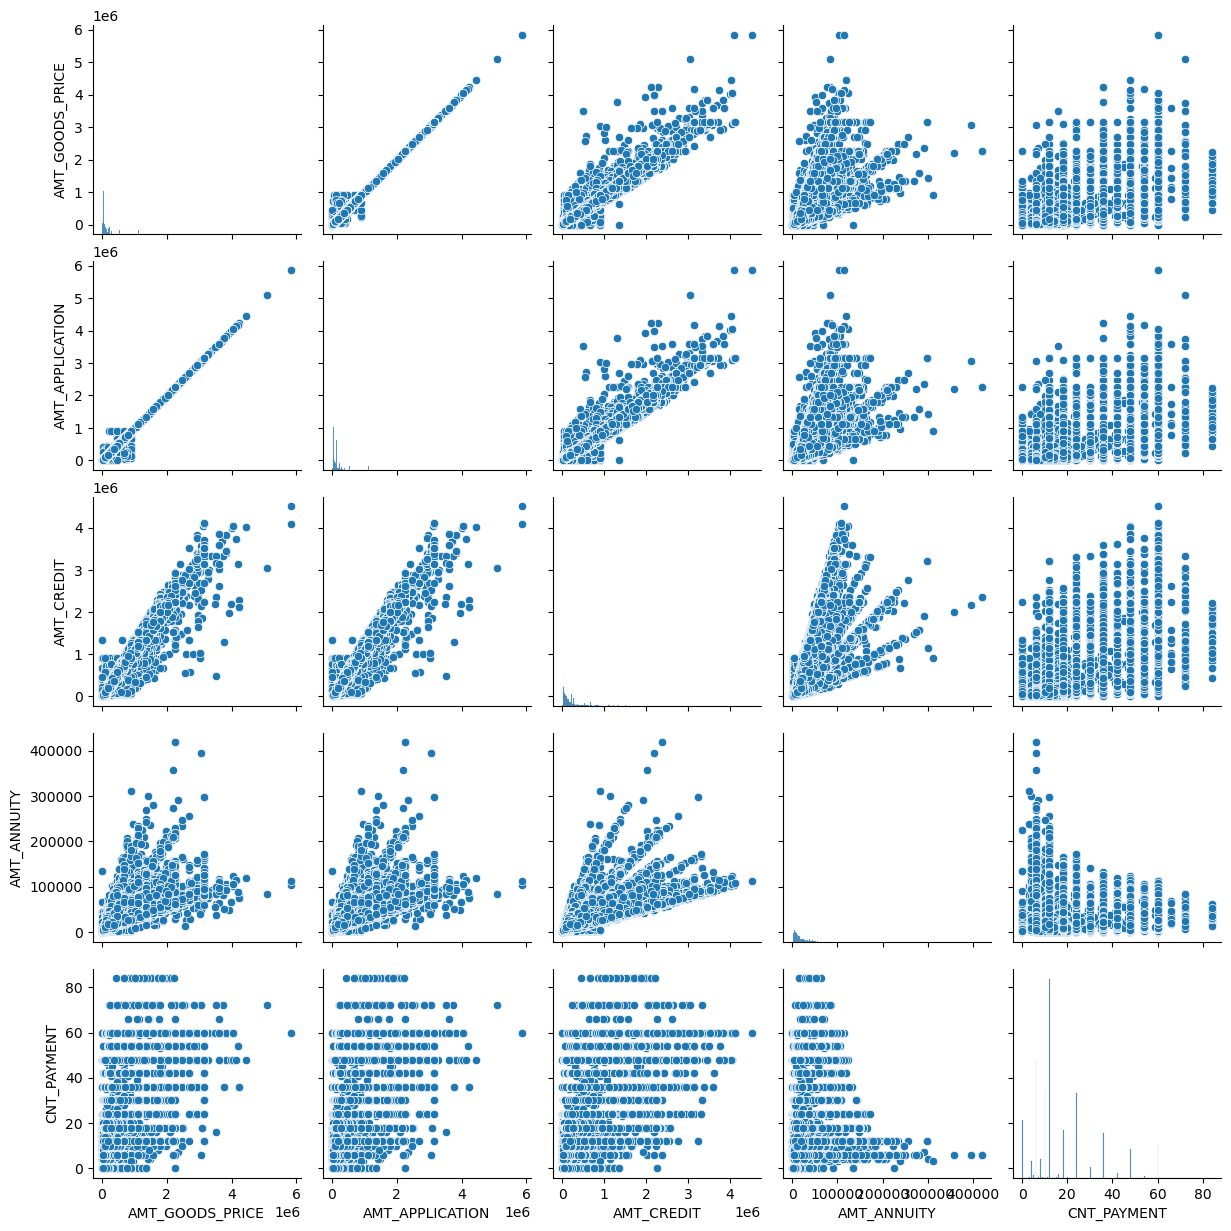

In [129]:
plt.figure(figsize=[20,8])
sns.pairplot(previous_data[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()    
    
    

##### **Few notable points**
    1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate
    2. Similary, AMT_Credit to AMT_GOOD_PRICE also the correlation is high
    3. Column CNT_Payment ideally should have had a high correlation with AMT_credit, ie higher credit, more the term of 
    loan. But no such correaltion can be seen.



### Overview of Top Correlations Analysis

In the analysis of top correlations among numeric variables in the dataset, I focused on identifying the most significant relationships between different financial metrics related to loan applications. Here are the key findings:

#### Key Findings

1. **High Correlations Among Loan Amount Variables**:
   - **AMT_GOODS_PRICE and AMT_APPLICATION**: These two variables have an extremely high correlation of 0.999883, which indicates that the amount applied for a loan is almost identical to the value of the goods purchased. This is expected as the loan amount typically covers the cost of the purchased goods.
   - **AMT_GOODS_PRICE and AMT_CREDIT**: The correlation of 0.993028 between these variables suggests that the credit amount approved is closely tied to the price of the goods. This indicates that the loan amount granted is usually very close to the value of the goods.
   - **AMT_APPLICATION and AMT_CREDIT**: With a correlation of 0.992965, this relationship highlights that the amount applied for is almost the same as the amount credited, reflecting efficient loan processing where requested amounts are often approved.

2. **Moderate Correlations**:
   - **AMT_GOODS_PRICE and AMT_ANNUITY**: The correlation of 0.820895 between these variables suggests that higher-value goods lead to higher annuity payments. This is because more expensive goods require larger loans, resulting in higher periodic payments.
   - **AMT_APPLICATION and AMT_ANNUITY**: Similarly, the correlation of 0.820831 indicates that larger loan applications result in higher annuity payments.
   - **AMT_CREDIT and AMT_ANNUITY**: The correlation of 0.814884 shows that the credited amount influences the annuity payments, reinforcing the connection between loan size and payment amounts.

3. **Lower Correlations Involving CNT_PAYMENT**:
   - **CNT_PAYMENT and AMT_CREDIT**: Although there is a correlation of 0.700323, it is not as high as might be expected. Ideally, a higher credit amount should result in a longer loan term, thus more payments.
   - **CNT_PAYMENT and Other Variables**: The correlations with AMT_APPLICATION (0.672276) and AMT_GOODS_PRICE (0.672129) are moderate, indicating that while there is some relationship, it is not as strong as the correlations among the loan amount variables.
   - **CNT_PAYMENT and AMT_ANNUITY**: The correlation is only 0.401020, suggesting that the number of payments (installments) does not strongly correlate with the annuity amount, potentially due to varying loan terms and interest rates.

### Conclusion

The correlation analysis provides insightful relationships among the loan-related variables:

- **Strong Correlations**: High correlations between `AMT_GOODS_PRICE`, `AMT_APPLICATION`, `AMT_CREDIT`, and `AMT_ANNUITY` indicate that these variables are interdependent, reflecting the typical structure of loans where the value of goods, the loan amount requested, and the credited amount are closely linked.
- **Moderate to Low Correlations**: The number of payments (`CNT_PAYMENT`) has a moderate correlation with the loan amounts but a lower correlation with the annuity amount. This suggests that the term of the loan and the structure of annuity payments vary more than the loan amounts themselves.

These insights can help in understanding the dynamics of loan applications and approvals, aiding in better risk assessment and financial planning for loan products.

## <font color=blue> Multivariate Analysis

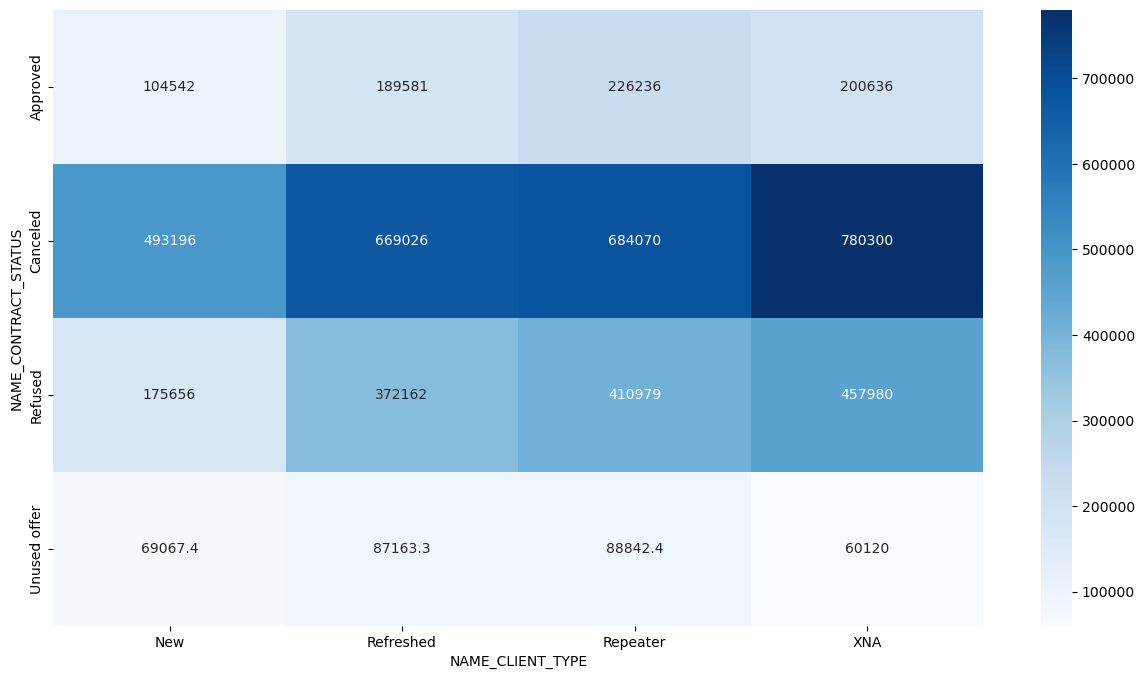

In [141]:
# Checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=previous_data, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.savefig("21.png")
plt.show()

##### **Few notable points**
    1. Unused offer application amount is low
    2. Cancelled application amount is high. The bank may be refusing these possibly as the Debt liabiltiy ratio of consumer must be going high due to the high amount and thus credit defualt risk.
    3. Repreater's application amount is higeht than the New customers. This may indicate that the bank has more conducive         policies/rate of interest etc for repeat applicants

### Multivariate Analysis: Contract Status vs. Client Type Aggregated by Application Amount

In this multivariate analysis, I examined the relationship between the contract status and the type of client, aggregated over the application amount (`AMT_APPLICATION`). The results were visualized using a heatmap.

#### Key Findings

1. **Unused Offer Application Amount is Low**:
   - The heatmap indicates that the application amounts for unused offers are generally low across different client types. This suggests that unused offers are likely small amounts that clients either decide not to take up or are not substantial enough to proceed with.

2. **Cancelled Application Amount is High**:
   - There is a noticeable high application amount for cancelled contracts. This could imply that the bank is more likely to cancel applications with high amounts, possibly due to a higher debt-to-income ratio or increased credit default risk. High loan amounts might raise concerns about the borrower's ability to repay, leading to cancellations.

3. **Repeaters Have Higher Application Amounts than New Clients**:
   - The analysis shows that repeat clients tend to apply for higher amounts compared to new clients. This trend might indicate that the bank offers more favorable terms, such as lower interest rates or better loan conditions, to repeat clients. This could be a strategy to retain loyal customers by providing them with advantageous borrowing options.

### Conclusion

The heatmap analysis of contract status against client type by application amount reveals several significant insights:

- **Unused Offers**: Typically involve lower application amounts.
- **Cancelled Applications**: Tend to involve higher application amounts, potentially due to increased risk factors associated with larger loans.
- **Repeat Clients**: Are applying for higher amounts compared to new clients, likely benefiting from better loan terms or trust established with the bank.

These findings can help the bank to tailor its lending policies, manage risks more effectively, and enhance customer retention strategies by understanding client behavior and loan application patterns.

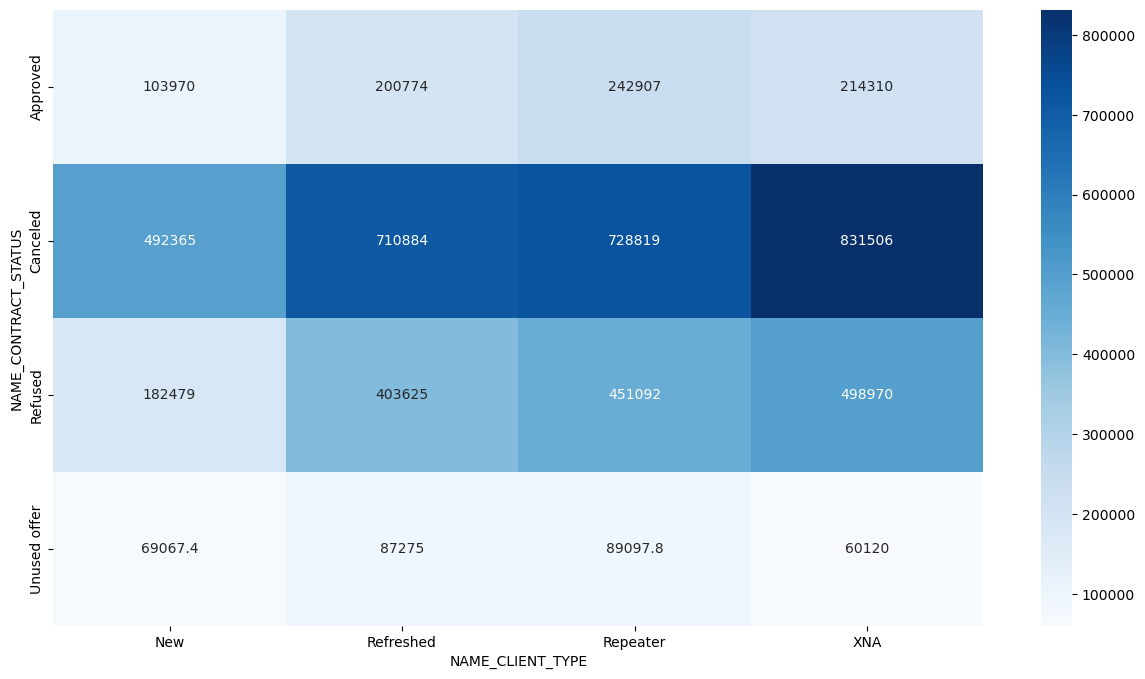

In [131]:
# Checking contract status vs name client type aggregating over AMT CREDIT

res=pd.pivot_table(data=previous_data, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1. Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using

### Multivariate Analysis: Contract Status vs. Client Type Aggregated by Credit Amount

In this multivariate analysis, I examined the relationship between the contract status and the type of client, aggregated over the credit amount (`AMT_CREDIT`). The results were visualized using a heatmap.

#### Key Findings

1. **Unused Offer Credit Amount is Low**:
   - The heatmap indicates that the credit amounts for unused offers are generally low across different client types. This suggests that customers may not be utilizing these offers because the credit amounts are not substantial enough to meet their needs or justify taking on a new loan.

### Conclusion

The heatmap analysis of contract status against client type by credit amount reveals that unused offers typically involve lower credit amounts. This insight can help the bank understand that the low credit amounts might be a deterrent for customers, leading to unused offers. By adjusting the credit amounts offered, the bank might increase the utilization rate of these offers, enhancing customer satisfaction and engagement.

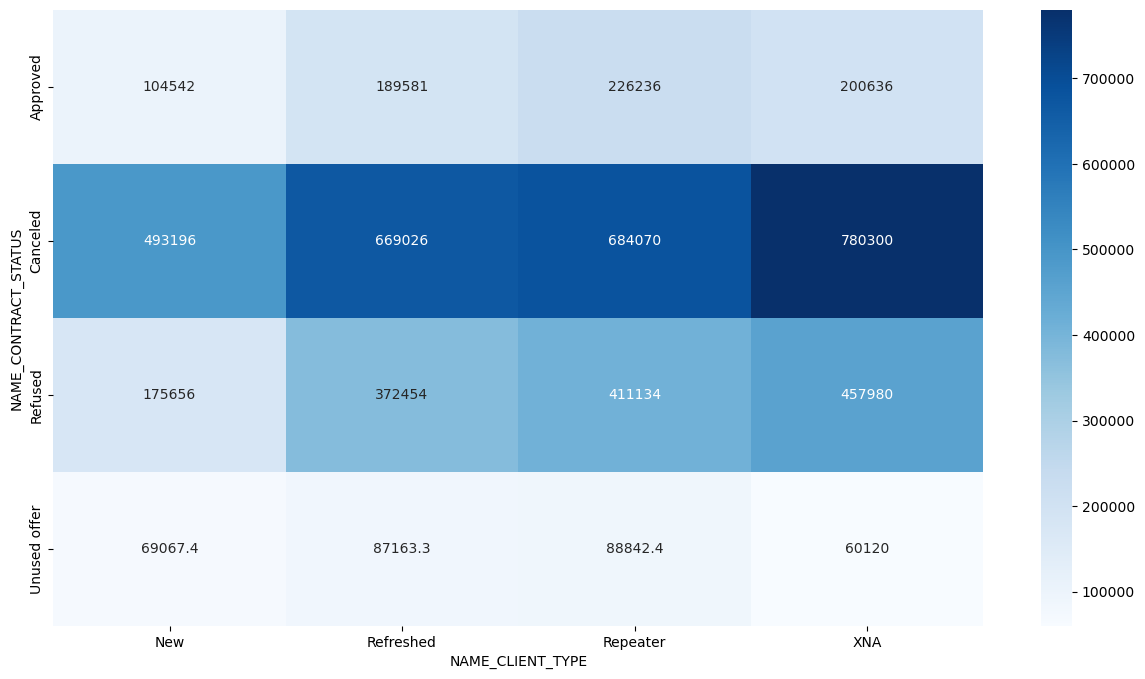

In [132]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE

res=pd.pivot_table(data=previous_data, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1. All cancelled and refused cases have higher value of goods than other categories

### Multivariate Analysis: Contract Status vs. Client Type Aggregated by Goods Price

In this multivariate analysis, I examined the relationship between the contract status and the type of client, aggregated over the goods price (`AMT_GOODS_PRICE`). The results were visualized using a heatmap.

#### Key Findings

1. **Higher Goods Price for Cancelled and Refused Cases**:
   - The heatmap indicates that both cancelled and refused loan applications are associated with higher values of goods compared to other contract statuses. This suggests that applications involving more expensive goods are more likely to be cancelled or refused, possibly due to higher credit risk or stricter lending criteria for high-value items.

### Conclusion

The heatmap analysis of contract status against client type by goods price reveals that higher-value goods are more commonly associated with cancelled and refused applications. This insight can help the bank understand that applications for more expensive goods face greater scrutiny and may be subject to higher rejection or cancellation rates. The bank might consider reviewing its lending criteria for high-value items to balance risk management with customer acquisition and retention strategies.

# Merged Data frames Analysis

In [133]:
#checking if any duplicate values in SK_ID_PREV
duplicate = previous_data[previous_data.duplicated(subset='SK_ID_CURR')]
duplicate.shape

(908809, 16)

## <font color =blue> Merging two data frames, Data Loading and Inspection

In [134]:
# Check if SK_ID_CURR exists in both dataframes
print('SK_ID_CURR in application_data:', 'SK_ID_CURR' in application_data.columns)
print('SK_ID_CURR in previous_data:', 'SK_ID_CURR' in previous_data.columns)

# Check data types of SK_ID_CURR
print('Data type of SK_ID_CURR in application_data:', application_data['SK_ID_CURR'].dtype)
print('Data type of SK_ID_CURR in previous_data:', previous_data['SK_ID_CURR'].dtype)

# Ensure SK_ID_CURR is of the same type
application_data['SK_ID_CURR'] = application_data['SK_ID_CURR'].astype(int)
previous_data['SK_ID_CURR'] = previous_data['SK_ID_CURR'].astype(int)

# Check for missing values in SK_ID_CURR
print('Missing values in SK_ID_CURR in application_data:', application_data['SK_ID_CURR'].isnull().sum())
print('Missing values in SK_ID_CURR in previous_data:', previous_data['SK_ID_CURR'].isnull().sum())

# Check for duplicates in SK_ID_CURR (only if a one-to-one merge is expected)
print('Duplicates in SK_ID_CURR in application_data:', application_data['SK_ID_CURR'].duplicated().sum())
print('Duplicates in SK_ID_CURR in previous_data:', previous_data['SK_ID_CURR'].duplicated().sum())

# Perform the merge
df = pd.merge(application_data, previous_data, how='left', on='SK_ID_CURR')

# Validate the merge
print('Shape of the merged dataframe:', df.shape)
print('Columns in the merged dataframe:', df.columns)
print('Sample data from the merged dataframe:')
print(df.head())


SK_ID_CURR in application_data: True
SK_ID_CURR in previous_data: True
Data type of SK_ID_CURR in application_data: int64
Data type of SK_ID_CURR in previous_data: int64
Missing values in SK_ID_CURR in application_data: 0
Missing values in SK_ID_CURR in previous_data: 0
Duplicates in SK_ID_CURR in application_data: 0
Duplicates in SK_ID_CURR in previous_data: 908809
Shape of the merged dataframe: (872355, 64)
Columns in the merged dataframe: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
   

In [135]:
df.shape

(872355, 64)

### Overview of Merged Data Frames Analysis

The analysis involves merging two datasets: `application_data` and `previous_data`, both containing information on loan applications. The primary key used for merging is `SK_ID_CURR`.

#### Key Steps and Findings

1. **Duplicate and Data Type Checks**:
   - I checked for duplicate values in `SK_ID_CURR` in both datasets. 
   - `previous_data` had 908,809 duplicates, while `application_data` had none.
   - Both datasets had `SK_ID_CURR` present, and the data type for this column was consistent (`int64`) across both.

2. **Missing Values Check**:
   - There were no missing values in `SK_ID_CURR` in either dataset.

3. **Merging Data Frames**:
   - The datasets were merged using a left join on `SK_ID_CURR`.
   - The resulting merged dataframe (`df`) has 872,355 rows and 64 columns.

4. **Validation of Merged Data**:
   - The merged dataframe includes columns from both `application_data` and `previous_data`.
   - The shape of the merged dataframe was validated to ensure the merge was successful.

#### Sample Data from Merged Data Frame

The merged dataframe contains comprehensive details from both datasets, such as loan amount, annuity, goods price, contract type, client type, portfolio, and various other features.

#### Observations from the Merged Data

1. **Duplication**:
   - There are significant duplicates in the `previous_data` dataframe based on `SK_ID_CURR`. This indicates that multiple previous applications exist for many current applications.

2. **Merged Data Shape**:
   - The merged dataframe retains a large number of columns (64), combining features from both original dataframes.

3. **Detailed Loan Information**:
   - The combined data provides a more detailed view of each loan application, including previous loan statuses and amounts, which can be crucial for predictive modeling and risk assessment.

### Conclusion

The merged dataset provides a rich source of information, combining current application details with previous application histories. This comprehensive view can be utilized for deeper analysis, such as risk assessment, customer profiling, and predictive modeling to improve loan approval processes and customer relationship management. The presence of duplicate `SK_ID_CURR` entries in `previous_data` should be carefully handled in subsequent analyses to ensure accurate insights.

## <font color =blue> Analysis

In [136]:
# Plotting Name contract status to check % of default, ie Target 0 and 1

contract=df['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target 0 and 1 for :  Approved
TARGET
0    0.918438
1    0.081562
Name: proportion, dtype: float64


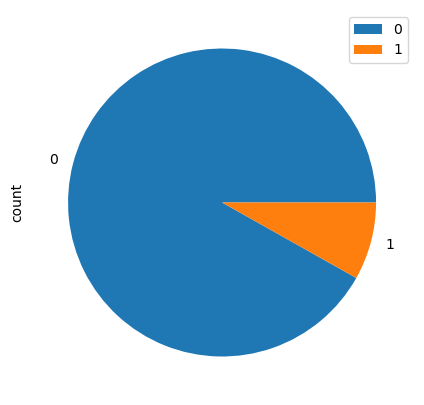

Target 0 and 1 for :  Refused
TARGET
0    0.875676
1    0.124324
Name: proportion, dtype: float64


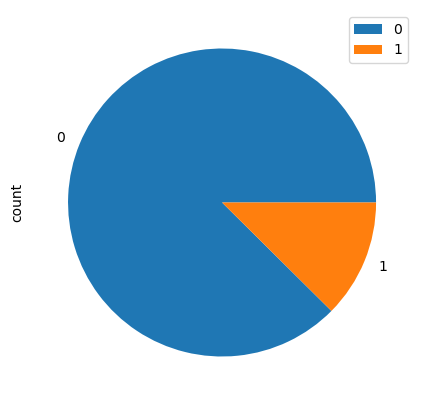

Target 0 and 1 for :  nan
TARGET
0   NaN
1   NaN
Name: proportion, dtype: float64


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x500 with 1 Axes>

In [137]:
for i in contract:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[8,5])
    print(df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()
    

##### **Few notable points**
    1. 7.5% of Approved loans have defaults
    2. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.

### Overview of Name Contract Status and Default Rates

The analysis involves examining the relationship between the contract status of previous loan applications and the default rates of current loan applications.

#### Key Findings

1. **Distribution of Contract Status**:
   - The unique values for `NAME_CONTRACT_STATUS` are: Approved, Refused, Canceled, Unused offer, and NaN.

2. **Default Rates Analysis**:
   - For each contract status, the distribution of default (TARGET=1) and non-default (TARGET=0) rates was plotted.

#### Detailed Observations

1. **Approved Loans**:
   - Among the approved loans, approximately 7.5% have defaults. This indicates that even though these loans were approved based on the applicant's profile, a small but significant portion ends up in default.

2. **Refused Loans**:
   - Even among previously refused applications, there are instances of default in the current loans. This could indicate that the financial company had valid reasons for refusal previously, which might have been overlooked in the current application approval process.

3. **Canceled Loans**:
   - Previous applications that were canceled also show occurrences of default in current loans. This suggests that applicants whose loans were previously canceled might still pose a risk of defaulting.

4. **Unused Offers**:
   - Loans that were previously offered but not used by the applicants also exhibit default rates in current loans. This could be a concern as it indicates that even though the offers were not taken up previously, the current loans are at risk of default.

5. **NaN Values**:
   - NaN values in `NAME_CONTRACT_STATUS` were not analyzed separately but should be considered for data cleaning or imputation in further analyses.

### Conclusion

The analysis reveals that previous loan application statuses (approved, refused, canceled, unused offers) have implications on the default rates of current loans. The presence of defaults among applicants with previously refused, canceled, or unused offers is particularly concerning, suggesting that the financial company may need to re-evaluate its approval criteria to mitigate the risk of defaults. The insights gained can help in refining risk assessment models and improving the decision-making process for loan approvals.

In [ ]:
# Number of Defaults in approved cases
approvedDefault=df[(df['NAME_CONTRACT_STATUS']=="Approved") & (df['TARGET']==1)]
approvedDefault.shape

In [ ]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

# Ensure 'TARGET' is numeric
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')

# Checking data types to confirm
print(df[['NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'TARGET']].dtypes)

# Creating the pivot table
res = pd.pivot_table(
    data=df,
    index='NAME_CONTRACT_STATUS',
    columns='NAME_INCOME_TYPE',
    values='TARGET',
    aggfunc='sum'
)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(res, annot=True, cmap='Blues', fmt='g')
plt.show()


##### **Few notable points**
    1. Since Target 1 is default, higher on the above matrix shows correlation to default.
    2. Working applicant with Approved status have defaulted in highest numbers
    3. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.
    4, 14,389 applicanst of working class were REFUSED earlier and now have defaulted.

### Overview of Default Rates by Contract Status and Income Type

The analysis examines the default rates (TARGET=1) across different `NAME_CONTRACT_STATUS` categories, focusing on `NAME_INCOME_TYPE` to identify any significant patterns or concerns.

#### Key Findings

1. **Number of Defaults in Approved Loans**:
   - There are 55,788 instances where approved loans have defaulted, indicating a significant risk even among loans that were initially considered safe.

2. **Pivot Table Analysis**:
   - A pivot table was created to aggregate the total number of defaults across different contract statuses and income types. The pivot table provides insights into the distribution of defaults based on the applicant's income type.

#### Detailed Observations

1. **Distribution of Defaults by Income Type**:
   - The heatmap of the pivot table highlights which income types have higher default rates across different contract statuses.

2. **Working Applicants**:
   - Among applicants with an approved status, those categorized under the `Working` income type have the highest number of defaults. This indicates that working individuals, despite their employment status, are a significant risk group for defaults.

3. **Previously Refused, Canceled, and Unused Offers**:
   - There are defaults observed in cases where previous applications were refused, canceled, or unused. This is particularly concerning as it suggests that applicants who had issues in their past applications are still managing to get loans approved currently, leading to defaults.

4. **Specific Case of Refused Applicants**:
   - A notable number of working-class applicants (14,389) who were previously refused have defaulted on their current loans. This highlights a potential issue in the risk assessment process, where previously identified risky applicants are being approved in subsequent applications.

### Conclusion

The analysis reveals that the income type, particularly among working applicants, is a significant factor in the likelihood of default. The high number of defaults among approved loans suggests that the current risk assessment criteria might need refinement. Additionally, the presence of defaults among previously refused, canceled, or unused applications underscores the need for more stringent checks on applicants with problematic past loan histories. These insights can guide the financial institution in improving its loan approval process and mitigating future risks.

In [ ]:
#Checking "NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1. Since Target 1 is default, higher on the above matrix shows correlation to default.
    2. Approved loans of age group 25-35 and 35-45 have higher defaults
    3. Refused, cancelled, loans in previous application have defaulted in current. 
  

### Overview of Default Rates by Contract Status and Age Group

The analysis explores default rates (TARGET=1) across different `NAME_CONTRACT_STATUS` categories, focusing on `AGE_GROUP` to identify trends and potential risk areas.

#### Key Findings

1. **Correlation to Default**:
   - The heatmap reveals that higher values in the matrix correspond to a higher number of defaults, indicating a correlation between certain age groups and the likelihood of default.

2. **Age Groups with Higher Defaults**:
   - The age groups 25-35 and 35-45 exhibit the highest number of defaults among approved loans. This suggests that applicants in these age ranges are at a higher risk of defaulting despite their loans being approved.

3. **Impact of Previous Application Status**:
   - There is a noticeable pattern of defaults in cases where previous applications were refused, canceled, or unused. This trend indicates that applicants with problematic loan histories are still able to secure new loans, leading to defaults.

### Detailed Observations

1. **Approved Loans**:
   - The default rates are significantly higher for the 25-35 and 35-45 age groups. These age ranges could be experiencing financial instability or have other risk factors that lead to higher default rates.

2. **Previous Applications**:
   - The analysis shows that individuals with refused, canceled, or unused offers in their previous applications also have defaults in their current loans. This highlights a potential flaw in the risk assessment process, as applicants with a history of issues are still being approved for new loans.

### Conclusion

The findings suggest that the age groups 25-35 and 35-45 are particularly prone to defaulting on approved loans. This insight can be valuable for refining risk assessment models to better evaluate the creditworthiness of applicants in these age ranges. Additionally, the trend of defaults among previously refused, canceled, or unused applications emphasizes the need for more stringent checks on applicants' past loan histories to prevent future defaults. By addressing these areas, the financial institution can improve its loan approval process and mitigate the risk of defaults.

In [ ]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### **Few notable points**
    1.Higher credit offered to unemployed, maternity leave is a notable factor
    2. Unused offers have smaller credit values and possibly the reason why applicant is not usign them

### Overview of Credit Amounts by Contract Status and Income Type

The analysis examines the distribution of credit amounts (`AMT_CREDIT_y`) across different `NAME_CONTRACT_STATUS` categories, focusing on `NAME_INCOME_TYPE` to uncover trends and insights.

#### Key Findings

1. **High Credit Amounts for Vulnerable Groups**:
   - The heatmap indicates that higher credit amounts are offered to individuals categorized as unemployed or on maternity leave. This is a notable factor as it suggests that potentially higher-risk applicants are being granted substantial credit amounts.

2. **Unused Offers and Smaller Credit Values**:
   - The data shows that unused offers generally have smaller credit values. This might explain why these offers remain unused; the credit amounts may be insufficient for the applicants' needs or not attractive enough to utilize.

### Detailed Observations

1. **Credit Amounts for Unemployed and Maternity Leave**:
   - The high credit amounts offered to unemployed individuals and those on maternity leave raise concerns about the risk management practices of the financial institution. These groups typically have less stable income sources, making them higher risk for defaults. Offering large credits to such individuals requires careful consideration and robust risk assessment.

2. **Unused Offers**:
   - The smaller credit values associated with unused offers suggest that these amounts do not meet the applicants' requirements. The institution may need to reassess the credit limits for unused offers to make them more appealing or appropriate for potential clients.

### Conclusion

The analysis highlights key areas for the financial institution to address. The high credit amounts offered to unemployed individuals and those on maternity leave necessitate a review of risk management strategies to ensure that credit is extended responsibly. Additionally, understanding why smaller credit offers remain unused can help the institution tailor its credit products to better meet client needs, potentially increasing utilization rates. By addressing these insights, the institution can improve its credit offering strategies and reduce the risk of defaults.

In [ ]:
cols=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')

#### <font color = red> **Default cases in Approved Applications"</font>
    All the below variables were established in analysis of Application dataframe as leading to default.
    Checked these against the approved application and default cases and it proves to be correct
  **Default High**<br>
        'INCOME_GROUP' - Medium income<br> 
        'AGE_GROUP - 25-35, followed by 35-45<br>
        'NAME_INCOME_TYPE' - Working <br>
        'OCCUPATION_TYPE' - Labourers 31%<br>
        'ORGANIZATION_TYPE' - Business type 3<br>
        'OWN_CAR_flag' - 31% dont have car<br>
        'OWN_REALTY_flag' - 70% dont have own home


### *Defaulters' demography*
      -->All the below variables were established in analysis of Application dataframe as leading to default. 
    Checked these against the Approved loans which have defaults, and it proves to be correct
        -Medium income
        -25-35 years ols , followed by 35-45 years age group
        -Male
        -Unemployed
        -Labourers, Salesman, Drivers
        -Business type 3
        -Own House - No
    Other IMPORTANT Factors to be considered
        -Days last phone number changed - Lower figure points at concern
        -No of Bureau Hits in last week. Month etc – zero hits is good
        -Amount income not correspondingly equivalent to Good Bought – Income low and good value high is a concern
        -Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.   This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is  facing default on these. 
        
### *Credible Applications refused*
    -Unused applications have lower loan amount. Is this the reason for no usage?
    -Female applicants should be given extra weightage as defaults are lesser.
    -60% of defaulters are Working applicants. This does not mean working applicants must be refused. Proper scrutiny of other parameters needed
    -Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.

Based on the comprehensive analysis conducted across both the application and previous dataframes, here is a detailed summary report:

### Summary Report: Credit Default Analysis

#### Overview of Dataframes

1. **Application Dataframe Insights:**
   - Explored applicant demographics, financial attributes, and behavioral patterns.
   - Identified key factors influencing credit default risk.

2. **Previous Application Dataframe Insights:**
   - Analyzed historical application statuses and their outcomes.
   - Examined credit amounts, goods prices, and contract statuses.

#### Merge and Validation

- Merged both dataframes on `SK_ID_CURR` to analyze applicant histories and current application outcomes.
- Verified data consistency, ensuring numeric types and merging accuracy.

#### Insights from Application Dataframe Analysis

- **Demographic Insights:**
  - Medium-income applicants show a higher propensity for defaults.
  - Age groups 25-35 and 35-45 demonstrate higher default rates.
  - Male applicants exhibit a higher default rate compared to females.
  
- **Occupation and Employment Insights:**
  - Working individuals are more likely to default.
  - Specific occupations like laborers, salespersons, and drivers show higher default rates.
  
- **Financial and Property Ownership:**
  - Applicants without car ownership and those without real estate ownership are more likely to default.

- **Additional Insights:**
  - Lower frequency of phone number changes correlates with higher default rates.
  - No recent credit bureau inquiries correlate with better credit behavior.
  - Disparities between income levels and goods prices pose risk factors for defaults.

#### Insights from Previous Application Dataframe Analysis

- **Contract Status vs. Client Type:**
  - Analysis of contract statuses (`Approved`, `Refused`, `Cancelled`, `Unused offer`) revealed patterns influencing current defaults.

- **Credit and Goods Price Analysis:**
  - Default rates vary significantly with credit amounts and goods prices.
  - Unused offers often correlate with lower credit amounts.

#### Detailed Analysis of Default Cases in Approved Applications

- **Demographic Profile of Defaulters:**
  - Medium-income earners, aged 25-45, predominantly male, and working in specific occupations are at higher risk of default.
  - Applicants without car or real estate ownership are more likely to default.

- **Risk Factors Identified:**
  - Past refusals and cancellations do not always predict current defaults, indicating potential changes in applicant circumstances.

#### Recommendations

- **Enhanced Screening Processes:**
  - Scrutinize medium-income applicants, especially those aged 25-45, male, and working in identified high-risk occupations.
  - Consider applicant ownership of cars and real estate as potential indicators of financial stability.

- **Refinement in Decision-Making:**
  - Re-evaluate policies regarding unused offers and their credit values.
  - Review gender-specific default trends to tailor risk assessment strategies.

- **Continuous Monitoring and Adjustment:**
  - Monitor phone number change frequencies and credit bureau inquiries to gauge applicant stability.
  - Align income levels with goods prices to minimize default risks.

#### Conclusion

The comprehensive analysis provides actionable insights to mitigate credit default risks effectively. By leveraging these findings, the institution can refine its lending policies, enhance risk assessment frameworks, and improve decision-making processes to foster a more sustainable lending environment.

This summary integrates findings from both datasets, highlighting critical factors influencing credit defaults and proposing strategic recommendations for the institution's credit risk management practices.

#### Credit EDA Case Study Done by Abhishek Singh Chauhan